# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2019

Мягкий дедлайн: 23:59MSK 13.10.2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 16.10.2019

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

## Реализация градиентного спуска

Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью:

** Задание 1 (1 балл)** Градиентного спуска;

** Задание 2 (1.5 балла)** Стохастического градиентного спуска;

** Задание 3 (2.5 балла)** Метода Momentum.


Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором. 


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

In [79]:
import numpy as np
import random
from sklearn.base import BaseEstimator

class LinearReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic' or 'momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        if self.w0 is None:
            self.w = np.zeros((X.shape[1], 1))
            self.w0 = np.zeros((X.shape[1], 1))
        else:
            self.w = self.w0

        self.loss_history = []
        
        if self.gd_type == 'full':
            self.loss_history.append(self.calc_loss(X, y))
            for i in tqdm.tqdm(range(self.max_iter)):
                grad = self.calc_gradient(X, y)
                if np.linalg.norm(grad) < self.tolerance:
                    break
                else:
                    self.w -= grad.reshape(-1, 1)
                    self.loss_history.append(self.calc_loss(X, y))

        if self.gd_type == 'stochastic':
            self.loss_history.append(self.calc_loss(X, y))
            
            for i in tqdm.tqdm(range(self.max_iter)):
                stoh_number = random.randint(0, X.shape[0])
                grad = self.calc_gradient(np.array(X.iloc[stoh_number]).reshape(1, -1), y[stoh_number])
                
                if np.linalg.norm(grad) < self.tolerance:
                    break
                else:
                    self.w -= grad.reshape(-1, 1)
                    self.loss_history.append(self.calc_loss(X, y))
                    
        if self.gd_type == 'momentum':
            self.loss_history.append(self.calc_loss(X, y))
            deltaW = np.ones((X.shape[1], 1))
            for i in tqdm.tqdm(range(self.max_iter)):
                
                grad = self.calc_gradient(X, y)
                deltaW = self.alpha * deltaW - grad.reshape(-1, 1)
                
                if np.linalg.norm(grad) < self.tolerance:
                    break
                else:
                    self.w += deltaW.reshape(-1, 1)
                    self.loss_history.append(self.calc_loss(X, y))
                    
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X@self.w
        
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        if self.gd_type == 'full' or self.gd_type == 'momentum':
            errors = np.dot(X, self.w)[:, 0] - y
            grad = (self.eta / X.shape[0]) * np.dot(X.T, errors)

            return grad
        if self.gd_type == 'stochastic':
            errors = np.dot(X, self.w) - y
            grad = (self.eta / X.shape[0]) * X.T * errors

            return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """ 
        J = 0
        sqrErrors = np.dot(X, self.w)        
        sqrErrors = sqrErrors[:, 0] - y
        sumOfsqrErrs = np.sum(sqrErrors ** 2)
        J = sumOfsqrErrs / X.shape[0]
        
        return J

In [84]:
import pandas as pd
df = pd.read_csv('train.csv')
df = df.drop(columns=['dropoff_datetime']).copy()

** Задание 4 (0 баллов)**. 
* Загрузите данные из домашнего задания 2 ([train.csv](https://www.kaggle.com/c/nyc-taxi-trip-duration/data));
* Разбейте выборку на обучающую и тестовую в отношении 7:3 с random_seed=0;
* Преобразуйте целевую переменную `trip_duration` как $\hat{y} = \log{(y + 1)}$.

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tqdm

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df["pickup_datetime"].dt.dayofweek
df['month'] = df["pickup_datetime"].dt.month
df['hour'] = df["pickup_datetime"].dt.hour

X = df[['day_of_week', 'month', 'hour', 'passenger_count']]
y = np.log1p(df["trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# display(y_train)
numeric = ['passenger_count']
categorical = ['day_of_week', 'month', 'hour']

In [86]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

for feature in categorical:
    ohe = OneHotEncoder(drop='first', categories='auto')

    valid_vals = X_train[feature].unique()
    trn_vals = X_train[feature].values
    tst_vals = np.array([value if value in valid_vals else -1 for value in X_test[feature].values])

    fea_train = ohe.fit_transform(train_values.reshape(-1,1)).toarray()        
    ohe_train = pd.DataFrame(fea_train, columns = [feature + str(int(i)) for i in range(fea_train.shape[1])])
    X_train.drop(columns=[feature], inplace=True)
    X_train = pd.concat([X_train, ohe_train], axis=1)
    
    fea_test = ohe.transform(test_values.reshape(-1, 1)).toarray()
    ohe_test = pd.DataFrame(fea_test, columns = [feature + str(int(i)) for i in range(fea_test.shape[1])])
    X_test.drop(columns=[feature], inplace=True)
    X_test = pd.concat([X_test, ohe_test], axis=1)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

X_train[numeric] = scaler1.fit_transform(X_train[numeric])
X_test[numeric] = scaler1.transform(X_test[numeric])
y_train = y_train.values
y_test = y_test.values

** Задание 5 (3 балла)**. Обучите и провалидируйте модели на данных из предыдущего пункта, сравните качество между методами по метрикам MSE и $R^2$. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

**Ответ**: Конечно, согласуется. Ожидания были таковы: 
1. С увеличением макс итер будеть расти точность ( то есть будет понижаться лосс) так как больше шагов делаем в сторону спуска == ближе подходим к оптимуму (если лернинг рейт не завышен)
2. С увеличением лернинг рейта до какого-то момента точность должна повышаться, пока мы не дойдем до того момента, как нас настигнет отрицательный эффект и градиент пойдет "прыгать" в обратную сторону.

На приведенных ниже графиках показано, что всё так, как я описал

In [88]:
def countR2(predictionVec, weights):
    J = 0
    sqrErrors = predictionVec - y_test.reshape(-1, 1)
    sqrErrors = sqrErrors ** 2
    sumErr = sum(sqrErrors)

    yErr = y_test.reshape(-1, 1) - np.mean(y_test.reshape(-1, 1))
    yErr = yErr ** 2
    sumYErr = sum(yErr)

    J = 1 - sumErr / sumYErr
    return J

In [89]:
def countMSE(predictionVec, weights):
    
    sqrErrors = predictionVec - y_test.reshape(-1, 1)
    sqrErrors = sqrErrors ** 2
    sumErr = sum(sqrErrors)

    return sumErr / len(predictionVec)

# Full

In [8]:
lin_reg_full = LinearReg(gd_type='full', tolerance=1e-6, max_iter=1000, w0=None, alpha=1e-3, eta=3e-1)
lin_reg_full.fit(X_train, y_train)
lin_reg_full.loss_history[-1]

100%|██████████| 1000/1000 [00:58<00:00, 17.20it/s]


1.7369501774944345

In [9]:
import matplotlib.pyplot as plt

plt.title("Full gradient descent loss history")
plt.plot(lin_reg_full.loss_history)

plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
predictionVec = lin_reg_full.predict(X_test)
# predictionVec.shape
print("MSE: ", countMSE(np.array(predictionVec), lin_reg_full.w))
print("R2: ", countR2(np.array(predictionVec), lin_reg_full.w))

MSE:  [1.72834527]
R2:  [-1.74493783]


# Stochastic

In [11]:
lin_reg_stoh = LinearReg(gd_type='stochastic', tolerance=1e-6, max_iter=1000, w0=None, alpha=1e-3, eta=1e-1)
lin_reg_stoh.fit(X_train, y_train)
lin_reg_stoh.loss_history[-1]

100%|██████████| 1000/1000 [00:19<00:00, 50.55it/s]


2.4542880614598217

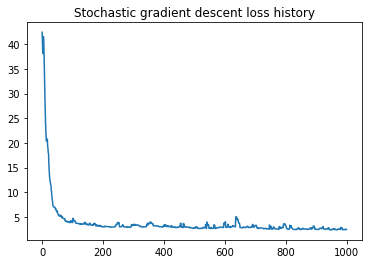

In [12]:
plt.title("Stochastic gradient descent loss history")
plt.plot(lin_reg_stoh.loss_history)

plt.show()

In [13]:
predictionVecStoh = lin_reg_stoh.predict(X_test)
# predictionVec.shape
print("MSE: ", countMSE(np.array(predictionVecStoh), lin_reg_stoh.w))
print("R2: ", countR2(np.array(predictionVecStoh), lin_reg_stoh.w))

MSE:  [2.45164419]
R2:  [-2.89367275]


In [14]:
lin_reg_mom = LinearReg(gd_type='momentum', tolerance=1e-6, max_iter=1000, w0=None, alpha=1e-3, eta=1e-1)
lin_reg_mom.fit(X_train, y_train)
lin_reg_mom.loss_history[-1]

100%|██████████| 1000/1000 [01:01<00:00, 16.37it/s]


2.2039966048086144

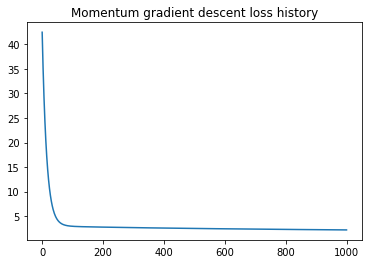

In [15]:
plt.title("Momentum gradient descent loss history")
plt.plot(lin_reg_mom.loss_history)
plt.show()

In [16]:
predictionVecMom = lin_reg_mom.predict(X_test)
# predictionVec.shape
print("MSE: ", countMSE(np.array(predictionVecMom), lin_reg_mom.w))
print("R2: ", countR2(np.array(predictionVecMom), lin_reg_mom.w))

MSE:  [2.19769894]
R2:  [-2.49035986]


** Задание 6 (2 балла)**. Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом Momentum. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны получиться *красивые* графики!

**Ответ**: Я построил хитмапы (или калор мапы) зависимости значений разных (МСЕ и Р2) функций лосса на тестовых данных от макс итера и лернинг рейта.
1. 

In [60]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_color_map(z, alpha_values, tau_values, alpha_freq=1, tau_freq=1, dist_type="", vmax = None, loss_type="MSE", vmin=None):
    z = np.array(z)
    Z = z.reshape((len(tau_values), len(alpha_values)))

    plt.figure(figsize=(5, 5))
    ax = plt.gca()

    plt.title("Color Map of found " + loss_type + " loss in dependancy of max_iter and eta")
    plt.xlabel("Eta", fontsize=12)
    plt.ylabel("Max iter", fontsize=12)
    plt.xticks([alpha_freq*i for i in range(len(alpha_values[::alpha_freq]))], np.round(alpha_values[::alpha_freq], decimals=3))
    plt.yticks([tau_freq*i for i in range(len(tau_values[::tau_freq]))], [np.round(el, decimals=2) for el in tau_values[::tau_freq]])

    im = ax.imshow(Z, cmap='winter', aspect='auto', vmin = vmin, vmax = vmax)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)

    cbar = plt.colorbar(im, cax=cax)
    plt.show()

# Full gradient

**Ответ**: очевидно, что для маленьких макситер и маленьких лернинг рейт (в данном случае) у нас она хуже обучается и ноборот.

In [18]:
max_iter_list = [100, 300, 500, 1000, 1500]
eta_list = [1e-2, 3e-2, 1e-1, 3e-1, 1]

found_MSE_list_full = []
found_R2_list_full = []

i = -1
for max_it in tqdm.tqdm(max_iter_list):
    i += 1
    found_MSE_list_full.append([])
    found_R2_list_full.append([])
    
    for eta in tqdm.tqdm(eta_list):
        lin_reg_full = LinearReg(gd_type='full', tolerance=1e-6, max_iter=max_it, w0=None, alpha=1e-3, eta=eta)
        lin_reg_full.fit(X_train, y_train)
        
        predictionVecFull = lin_reg_full.predict(X_test)
        
        found_MSE_list_full[i].append(countMSE(np.array(predictionVecFull), lin_reg_full.w))
        found_R2_list_full[i].append(countR2(np.array(predictionVecFull), lin_reg_full.w))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:08, 11.27it/s]

  4%|▍         | 4/100 [00:00<00:08, 11.33it/s]

  6%|▌         | 6/100 [00:00<00:08, 11.21it/s]

  7%|▋         | 7/100 [00:00<00:08, 10.71it/s]

  8%|▊         | 8/100 [00:00<00:09, 10.20it/s]

  9%|▉         | 9/100 [00:00<00:09, 10.09it/s]

 11%|█         | 11/100 [00:01<00:08, 10.37it/s]

 13%|█▎        | 13/100 [00:01<00:08, 10.63it/s]

 15%|█▌        | 15/100 [00:01<00:07, 10.91it/s]

 17%|█▋        | 17/100 [00:01<00:07, 11.70it/s]

 19%|█▉        | 19/100 [00:01<00:06, 12.65it/s]

 21%|██        | 21/100 [00:01<00:06, 13.02it/s]

 23%|██▎       | 23/100 [00:01<00:06, 12.14it/s]

 25%|██▌       | 25/100 [00:02<00:06, 11.90it/s]

 27%|██▋       | 27/100 [00:02<00:06, 11.97it/s]

 29%|██▉       | 29/100 [00:02<00:06, 11.51it/s]

 31%|███       | 31/100 [00:02<00:05, 12.26it/s]

 33%|███▎      | 33/100 [00:02<00:05, 13.11it/s]

 35%|███▌      | 35/100 [0

 80%|████████  | 80/100 [00:04<00:01, 16.43it/s]

 82%|████████▏ | 82/100 [00:04<00:01, 16.65it/s]

 84%|████████▍ | 84/100 [00:05<00:00, 16.70it/s]

 86%|████████▌ | 86/100 [00:05<00:00, 16.85it/s]

 88%|████████▊ | 88/100 [00:05<00:00, 16.84it/s]

 90%|█████████ | 90/100 [00:05<00:00, 16.90it/s]

 92%|█████████▏| 92/100 [00:05<00:00, 16.87it/s]

 94%|█████████▍| 94/100 [00:05<00:00, 16.98it/s]

 96%|█████████▌| 96/100 [00:05<00:00, 16.93it/s]

 98%|█████████▊| 98/100 [00:05<00:00, 16.71it/s]

100%|██████████| 100/100 [00:06<00:00, 16.51it/s]

 60%|██████    | 3/5 [00:23<00:16,  8.13s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:05, 17.77it/s]

  4%|▍         | 4/100 [00:00<00:05, 17.55it/s]

  6%|▌         | 6/100 [00:00<00:05, 17.46it/s]

  8%|▊         | 8/100 [00:00<00:05, 17.32it/s]

 10%|█         | 10/100 [00:00<00:05, 17.33it/s]

 12%|█▏        | 12/100 [00:00<00:05, 17.24it/s]

 14%|█▍        | 14/100 [00:00<00:04, 17.25it/s]

 16%|█▌        

 19%|█▉        | 58/300 [00:03<00:14, 16.51it/s]

 20%|██        | 60/300 [00:03<00:14, 16.48it/s]

 21%|██        | 62/300 [00:03<00:14, 16.61it/s]

 21%|██▏       | 64/300 [00:03<00:14, 16.53it/s]

 22%|██▏       | 66/300 [00:03<00:13, 16.73it/s]

 23%|██▎       | 68/300 [00:04<00:14, 16.57it/s]

 23%|██▎       | 70/300 [00:04<00:13, 16.45it/s]

 24%|██▍       | 72/300 [00:04<00:13, 16.54it/s]

 25%|██▍       | 74/300 [00:04<00:13, 16.69it/s]

 25%|██▌       | 76/300 [00:04<00:13, 16.78it/s]

 26%|██▌       | 78/300 [00:04<00:13, 16.90it/s]

 27%|██▋       | 80/300 [00:04<00:12, 16.96it/s]

 27%|██▋       | 82/300 [00:04<00:12, 17.05it/s]

 28%|██▊       | 84/300 [00:04<00:12, 17.04it/s]

 29%|██▊       | 86/300 [00:05<00:12, 17.07it/s]

 29%|██▉       | 88/300 [00:05<00:12, 16.56it/s]

 30%|███       | 90/300 [00:05<00:12, 16.23it/s]

 31%|███       | 92/300 [00:05<00:12, 16.02it/s]

 31%|███▏      | 94/300 [00:05<00:12, 15.99it/s]

 32%|███▏      | 96/300 [00:05<00:12, 16.20it/s]



 14%|█▍        | 42/300 [00:02<00:15, 16.53it/s]

 15%|█▍        | 44/300 [00:02<00:15, 16.64it/s]

 15%|█▌        | 46/300 [00:02<00:15, 16.73it/s]

 16%|█▌        | 48/300 [00:02<00:14, 16.84it/s]

 17%|█▋        | 50/300 [00:02<00:15, 16.48it/s]

 17%|█▋        | 52/300 [00:03<00:15, 16.48it/s]

 18%|█▊        | 54/300 [00:03<00:14, 16.49it/s]

 19%|█▊        | 56/300 [00:03<00:14, 16.65it/s]

 19%|█▉        | 58/300 [00:03<00:14, 16.87it/s]

 20%|██        | 60/300 [00:03<00:13, 17.18it/s]

 21%|██        | 62/300 [00:03<00:13, 17.26it/s]

 21%|██▏       | 64/300 [00:03<00:13, 17.36it/s]

 22%|██▏       | 66/300 [00:03<00:13, 17.42it/s]

 23%|██▎       | 68/300 [00:04<00:13, 17.51it/s]

 23%|██▎       | 70/300 [00:04<00:13, 17.60it/s]

 24%|██▍       | 72/300 [00:04<00:12, 17.64it/s]

 25%|██▍       | 74/300 [00:04<00:12, 17.57it/s]

 25%|██▌       | 76/300 [00:04<00:12, 17.58it/s]

 26%|██▌       | 78/300 [00:04<00:12, 17.70it/s]

 27%|██▋       | 80/300 [00:04<00:12, 17.51it/s]



  9%|▊         | 26/300 [00:01<00:16, 17.09it/s]

  9%|▉         | 28/300 [00:01<00:15, 17.13it/s]

 10%|█         | 30/300 [00:01<00:15, 17.01it/s]

 11%|█         | 32/300 [00:01<00:15, 17.12it/s]

 11%|█▏        | 34/300 [00:02<00:15, 17.08it/s]

 12%|█▏        | 36/300 [00:02<00:15, 17.11it/s]

 13%|█▎        | 38/300 [00:02<00:15, 16.90it/s]

 13%|█▎        | 40/300 [00:02<00:15, 16.90it/s]

 14%|█▍        | 42/300 [00:02<00:15, 16.80it/s]

 15%|█▍        | 44/300 [00:02<00:15, 16.66it/s]

 15%|█▌        | 46/300 [00:02<00:15, 16.67it/s]

 16%|█▌        | 48/300 [00:02<00:14, 16.88it/s]

 17%|█▋        | 50/300 [00:02<00:14, 16.94it/s]

 17%|█▋        | 52/300 [00:03<00:14, 17.07it/s]

 18%|█▊        | 54/300 [00:03<00:14, 17.13it/s]

 19%|█▊        | 56/300 [00:03<00:14, 17.15it/s]

 19%|█▉        | 58/300 [00:03<00:14, 17.16it/s]

 20%|██        | 60/300 [00:03<00:13, 17.17it/s]

 21%|██        | 62/300 [00:03<00:13, 17.23it/s]

 21%|██▏       | 64/300 [00:03<00:13, 17.24it/s]



  3%|▎         | 10/300 [00:00<00:16, 17.70it/s]

  4%|▍         | 12/300 [00:00<00:16, 17.44it/s]

  5%|▍         | 14/300 [00:00<00:16, 17.55it/s]

  5%|▌         | 16/300 [00:00<00:16, 17.56it/s]

  6%|▌         | 18/300 [00:01<00:15, 17.67it/s]

  7%|▋         | 20/300 [00:01<00:15, 17.73it/s]

  7%|▋         | 22/300 [00:01<00:15, 17.80it/s]

  8%|▊         | 24/300 [00:01<00:15, 17.82it/s]

  9%|▊         | 26/300 [00:01<00:16, 16.57it/s]

  9%|▉         | 28/300 [00:01<00:16, 16.29it/s]

 10%|█         | 30/300 [00:01<00:16, 16.55it/s]

 11%|█         | 32/300 [00:01<00:16, 16.61it/s]

 11%|█▏        | 34/300 [00:01<00:16, 16.62it/s]

 12%|█▏        | 36/300 [00:02<00:16, 16.22it/s]

 13%|█▎        | 38/300 [00:02<00:16, 16.01it/s]

 13%|█▎        | 40/300 [00:02<00:16, 16.22it/s]

 14%|█▍        | 42/300 [00:02<00:15, 16.43it/s]

 15%|█▍        | 44/300 [00:02<00:15, 16.57it/s]

 15%|█▌        | 46/300 [00:02<00:15, 16.48it/s]

 16%|█▌        | 48/300 [00:02<00:15, 16.62it/s]



 99%|█████████▉| 298/300 [00:17<00:00, 17.03it/s]

100%|██████████| 300/300 [00:17<00:00, 16.80it/s]

 80%|████████  | 4/5 [01:14<00:18, 18.57s/it]

  0%|          | 0/300 [00:00<?, ?it/s]

  1%|          | 2/300 [00:00<00:16, 17.81it/s]

  1%|▏         | 4/300 [00:00<00:16, 17.58it/s]

  2%|▏         | 6/300 [00:00<00:16, 17.54it/s]

  3%|▎         | 8/300 [00:00<00:16, 17.41it/s]

  3%|▎         | 10/300 [00:00<00:16, 17.38it/s]

  4%|▍         | 12/300 [00:00<00:16, 17.30it/s]

  5%|▍         | 14/300 [00:00<00:16, 17.25it/s]

  5%|▌         | 16/300 [00:00<00:16, 17.16it/s]

  6%|▌         | 18/300 [00:01<00:16, 17.10it/s]

  7%|▋         | 20/300 [00:01<00:16, 17.05it/s]

  7%|▋         | 22/300 [00:01<00:16, 16.97it/s]

  8%|▊         | 24/300 [00:01<00:16, 16.78it/s]

  9%|▊         | 26/300 [00:01<00:16, 16.46it/s]

  9%|▉         | 28/300 [00:01<00:16, 16.28it/s]

 10%|█         | 30/300 [00:01<00:16, 16.31it/s]

 11%|█         | 32/300 [00:01<00:16, 16.57it/s]

 11%|█▏       

 94%|█████████▍| 282/300 [00:16<00:01, 17.11it/s]

 95%|█████████▍| 284/300 [00:16<00:00, 17.16it/s]

 95%|█████████▌| 286/300 [00:16<00:00, 17.11it/s]

 96%|█████████▌| 288/300 [00:17<00:00, 17.16it/s]

 97%|█████████▋| 290/300 [00:17<00:00, 17.04it/s]

 97%|█████████▋| 292/300 [00:17<00:00, 16.54it/s]

 98%|█████████▊| 294/300 [00:17<00:00, 16.10it/s]

 99%|█████████▊| 296/300 [00:17<00:00, 16.40it/s]

 99%|█████████▉| 298/300 [00:17<00:00, 16.57it/s]

100%|██████████| 300/300 [00:17<00:00, 16.85it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 2/500 [00:00<00:28, 17.59it/s]

  1%|          | 4/500 [00:00<00:28, 17.39it/s]

  1%|          | 6/500 [00:00<00:29, 17.01it/s]

  2%|▏         | 8/500 [00:00<00:29, 16.66it/s]

  2%|▏         | 10/500 [00:00<00:30, 16.26it/s]

  2%|▏         | 12/500 [00:00<00:29, 16.32it/s]

  3%|▎         | 14/500 [00:00<00:29, 16.47it/s]

  3%|▎         | 16/500 [00:00<00:29, 16.53it/s]

  4%|▎        

 53%|█████▎    | 264/500 [00:15<00:14, 16.66it/s]

 53%|█████▎    | 266/500 [00:15<00:13, 16.72it/s]

 54%|█████▎    | 268/500 [00:15<00:13, 16.86it/s]

 54%|█████▍    | 270/500 [00:15<00:13, 16.99it/s]

 54%|█████▍    | 272/500 [00:16<00:13, 17.10it/s]

 55%|█████▍    | 274/500 [00:16<00:13, 17.11it/s]

 55%|█████▌    | 276/500 [00:16<00:13, 17.17it/s]

 56%|█████▌    | 278/500 [00:16<00:12, 17.18it/s]

 56%|█████▌    | 280/500 [00:16<00:12, 17.19it/s]

 56%|█████▋    | 282/500 [00:16<00:12, 17.18it/s]

 57%|█████▋    | 284/500 [00:16<00:12, 16.92it/s]

 57%|█████▋    | 286/500 [00:16<00:12, 16.71it/s]

 58%|█████▊    | 288/500 [00:17<00:12, 16.37it/s]

 58%|█████▊    | 290/500 [00:17<00:12, 16.31it/s]

 58%|█████▊    | 292/500 [00:17<00:12, 16.44it/s]

 59%|█████▉    | 294/500 [00:17<00:12, 16.56it/s]

 59%|█████▉    | 296/500 [00:17<00:12, 16.71it/s]

 60%|█████▉    | 298/500 [00:17<00:12, 16.77it/s]

 60%|██████    | 300/500 [00:17<00:11, 16.86it/s]

 60%|██████    | 302/500 [00:17

 10%|▉         | 48/500 [00:02<00:27, 16.62it/s]

 10%|█         | 50/500 [00:03<00:27, 16.65it/s]

 10%|█         | 52/500 [00:03<00:26, 16.83it/s]

 11%|█         | 54/500 [00:03<00:26, 16.85it/s]

 11%|█         | 56/500 [00:03<00:26, 16.86it/s]

 12%|█▏        | 58/500 [00:03<00:26, 16.92it/s]

 12%|█▏        | 60/500 [00:03<00:25, 16.99it/s]

 12%|█▏        | 62/500 [00:03<00:25, 17.04it/s]

 13%|█▎        | 64/500 [00:03<00:25, 17.12it/s]

 13%|█▎        | 66/500 [00:03<00:25, 17.19it/s]

 14%|█▎        | 68/500 [00:04<00:25, 16.93it/s]

 14%|█▍        | 70/500 [00:04<00:25, 16.58it/s]

 14%|█▍        | 72/500 [00:04<00:26, 16.25it/s]

 15%|█▍        | 74/500 [00:04<00:25, 16.47it/s]

 15%|█▌        | 76/500 [00:04<00:25, 16.60it/s]

 16%|█▌        | 78/500 [00:04<00:25, 16.60it/s]

 16%|█▌        | 80/500 [00:04<00:25, 16.70it/s]

 16%|█▋        | 82/500 [00:04<00:24, 16.81it/s]

 17%|█▋        | 84/500 [00:05<00:24, 16.88it/s]

 17%|█▋        | 86/500 [00:05<00:24, 16.90it/s]



 67%|██████▋   | 336/500 [00:20<00:10, 15.98it/s]

 68%|██████▊   | 338/500 [00:20<00:09, 16.27it/s]

 68%|██████▊   | 340/500 [00:20<00:09, 16.37it/s]

 68%|██████▊   | 342/500 [00:20<00:09, 16.57it/s]

 69%|██████▉   | 344/500 [00:20<00:09, 16.66it/s]

 69%|██████▉   | 346/500 [00:20<00:09, 16.75it/s]

 70%|██████▉   | 348/500 [00:20<00:09, 16.80it/s]

 70%|███████   | 350/500 [00:20<00:08, 16.79it/s]

 70%|███████   | 352/500 [00:20<00:08, 16.89it/s]

 71%|███████   | 354/500 [00:21<00:08, 17.02it/s]

 71%|███████   | 356/500 [00:21<00:08, 16.99it/s]

 72%|███████▏  | 358/500 [00:21<00:08, 16.90it/s]

 72%|███████▏  | 360/500 [00:21<00:08, 16.92it/s]

 72%|███████▏  | 362/500 [00:21<00:08, 16.89it/s]

 73%|███████▎  | 364/500 [00:21<00:08, 16.80it/s]

 73%|███████▎  | 366/500 [00:21<00:08, 16.14it/s]

 74%|███████▎  | 368/500 [00:21<00:08, 16.11it/s]

 74%|███████▍  | 370/500 [00:22<00:08, 16.13it/s]

 74%|███████▍  | 372/500 [00:22<00:07, 16.18it/s]

 75%|███████▍  | 374/500 [00:22

 24%|██▍       | 120/500 [00:07<00:22, 16.99it/s]

 24%|██▍       | 122/500 [00:07<00:22, 16.94it/s]

 25%|██▍       | 124/500 [00:07<00:22, 16.82it/s]

 25%|██▌       | 126/500 [00:07<00:22, 16.73it/s]

 26%|██▌       | 128/500 [00:07<00:22, 16.48it/s]

 26%|██▌       | 130/500 [00:07<00:22, 16.31it/s]

 26%|██▋       | 132/500 [00:07<00:22, 16.23it/s]

 27%|██▋       | 134/500 [00:07<00:22, 16.43it/s]

 27%|██▋       | 136/500 [00:08<00:22, 16.46it/s]

 28%|██▊       | 138/500 [00:08<00:21, 16.61it/s]

 28%|██▊       | 140/500 [00:08<00:21, 16.78it/s]

 28%|██▊       | 142/500 [00:08<00:21, 16.93it/s]

 29%|██▉       | 144/500 [00:08<00:20, 17.00it/s]

 29%|██▉       | 146/500 [00:08<00:20, 17.04it/s]

 30%|██▉       | 148/500 [00:08<00:20, 17.05it/s]

 30%|███       | 150/500 [00:08<00:20, 17.11it/s]

 30%|███       | 152/500 [00:09<00:20, 17.13it/s]

 31%|███       | 154/500 [00:09<00:20, 17.18it/s]

 31%|███       | 156/500 [00:09<00:20, 17.12it/s]

 32%|███▏      | 158/500 [00:09

 81%|████████  | 406/500 [00:24<00:05, 16.54it/s]

 82%|████████▏ | 408/500 [00:24<00:05, 16.46it/s]

 82%|████████▏ | 410/500 [00:24<00:05, 16.64it/s]

 82%|████████▏ | 412/500 [00:24<00:05, 16.69it/s]

 83%|████████▎ | 414/500 [00:24<00:05, 16.78it/s]

 83%|████████▎ | 416/500 [00:24<00:04, 16.90it/s]

 84%|████████▎ | 418/500 [00:25<00:04, 16.69it/s]

 84%|████████▍ | 420/500 [00:25<00:04, 16.25it/s]

 84%|████████▍ | 422/500 [00:25<00:04, 16.03it/s]

 85%|████████▍ | 424/500 [00:25<00:04, 15.80it/s]

 85%|████████▌ | 426/500 [00:25<00:04, 16.17it/s]

 86%|████████▌ | 428/500 [00:25<00:04, 16.36it/s]

 86%|████████▌ | 430/500 [00:25<00:04, 16.57it/s]

 86%|████████▋ | 432/500 [00:25<00:04, 16.72it/s]

 87%|████████▋ | 434/500 [00:26<00:03, 16.83it/s]

 87%|████████▋ | 436/500 [00:26<00:03, 16.94it/s]

 88%|████████▊ | 438/500 [00:26<00:03, 16.99it/s]

 88%|████████▊ | 440/500 [00:26<00:03, 17.02it/s]

 88%|████████▊ | 442/500 [00:26<00:03, 17.00it/s]

 89%|████████▉ | 444/500 [00:26

 38%|███▊      | 190/500 [00:13<00:19, 16.22it/s]

 38%|███▊      | 192/500 [00:13<00:19, 16.12it/s]

 39%|███▉      | 194/500 [00:13<00:18, 16.43it/s]

 39%|███▉      | 196/500 [00:13<00:18, 16.65it/s]

 40%|███▉      | 198/500 [00:13<00:18, 16.50it/s]

 40%|████      | 200/500 [00:13<00:18, 16.48it/s]

 40%|████      | 202/500 [00:13<00:18, 16.24it/s]

 41%|████      | 204/500 [00:13<00:18, 16.05it/s]

 41%|████      | 206/500 [00:14<00:18, 15.78it/s]

 42%|████▏     | 208/500 [00:14<00:19, 14.98it/s]

 42%|████▏     | 210/500 [00:14<00:19, 14.83it/s]

 42%|████▏     | 212/500 [00:14<00:20, 13.77it/s]

 43%|████▎     | 214/500 [00:14<00:32,  8.79it/s]

 43%|████▎     | 216/500 [00:15<00:29,  9.70it/s]

 44%|████▎     | 218/500 [00:15<00:27, 10.07it/s]

 44%|████▍     | 220/500 [00:15<00:27, 10.21it/s]

 44%|████▍     | 222/500 [00:15<00:25, 10.95it/s]

 45%|████▍     | 224/500 [00:15<00:24, 11.34it/s]

 45%|████▌     | 226/500 [00:15<00:22, 12.07it/s]

 46%|████▌     | 228/500 [00:16

 95%|█████████▍| 473/500 [00:33<00:01, 15.59it/s]

 95%|█████████▌| 475/500 [00:33<00:01, 15.21it/s]

 95%|█████████▌| 477/500 [00:34<00:01, 15.29it/s]

 96%|█████████▌| 479/500 [00:34<00:01, 15.46it/s]

 96%|█████████▌| 481/500 [00:34<00:01, 15.62it/s]

 97%|█████████▋| 483/500 [00:34<00:01, 15.68it/s]

 97%|█████████▋| 485/500 [00:34<00:00, 16.17it/s]

 97%|█████████▋| 487/500 [00:34<00:00, 16.49it/s]

 98%|█████████▊| 489/500 [00:34<00:00, 16.69it/s]

 98%|█████████▊| 491/500 [00:34<00:00, 16.79it/s]

 99%|█████████▊| 493/500 [00:35<00:00, 16.47it/s]

 99%|█████████▉| 495/500 [00:35<00:00, 16.20it/s]

 99%|█████████▉| 497/500 [00:35<00:00, 15.03it/s]

100%|██████████| 500/500 [00:35<00:00, 14.08it/s]

 80%|████████  | 4/5 [02:08<00:32, 32.45s/it]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<00:58,  8.56it/s]

  1%|          | 3/500 [00:00<00:49,  9.95it/s]

  1%|          | 5/500 [00:00<00:43, 11.35it/s]

  1%|          | 6/500 [00:00<00:45, 10.79it/s]

  

 51%|█████     | 256/500 [00:17<00:14, 17.14it/s]

 52%|█████▏    | 258/500 [00:17<00:14, 17.23it/s]

 52%|█████▏    | 260/500 [00:17<00:14, 16.72it/s]

 52%|█████▏    | 262/500 [00:17<00:14, 16.41it/s]

 53%|█████▎    | 264/500 [00:17<00:14, 16.10it/s]

 53%|█████▎    | 266/500 [00:17<00:14, 15.68it/s]

 54%|█████▎    | 268/500 [00:18<00:15, 15.44it/s]

 54%|█████▍    | 270/500 [00:18<00:14, 15.79it/s]

 54%|█████▍    | 272/500 [00:18<00:14, 15.99it/s]

 55%|█████▍    | 274/500 [00:18<00:14, 16.13it/s]

 55%|█████▌    | 276/500 [00:18<00:13, 16.41it/s]

 56%|█████▌    | 278/500 [00:18<00:16, 13.79it/s]

 56%|█████▌    | 280/500 [00:18<00:18, 12.11it/s]

 56%|█████▋    | 282/500 [00:19<00:19, 11.02it/s]

 57%|█████▋    | 284/500 [00:19<00:20, 10.71it/s]

 57%|█████▋    | 286/500 [00:19<00:17, 12.10it/s]

 58%|█████▊    | 288/500 [00:19<00:15, 13.28it/s]

 58%|█████▊    | 290/500 [00:19<00:14, 14.27it/s]

 58%|█████▊    | 292/500 [00:19<00:14, 14.86it/s]

 59%|█████▉    | 294/500 [00:19

  4%|▎         | 36/1000 [00:02<00:57, 16.88it/s]

  4%|▍         | 38/1000 [00:02<00:56, 16.94it/s]

  4%|▍         | 40/1000 [00:02<00:56, 17.05it/s]

  4%|▍         | 42/1000 [00:02<00:55, 17.14it/s]

  4%|▍         | 44/1000 [00:02<00:55, 17.22it/s]

  5%|▍         | 46/1000 [00:02<00:55, 17.19it/s]

  5%|▍         | 48/1000 [00:02<00:55, 17.24it/s]

  5%|▌         | 50/1000 [00:02<00:55, 17.26it/s]

  5%|▌         | 52/1000 [00:03<00:55, 17.21it/s]

  5%|▌         | 54/1000 [00:03<00:55, 17.13it/s]

  6%|▌         | 56/1000 [00:03<00:55, 17.07it/s]

  6%|▌         | 58/1000 [00:03<00:55, 16.90it/s]

  6%|▌         | 60/1000 [00:03<00:56, 16.73it/s]

  6%|▌         | 62/1000 [00:03<00:56, 16.63it/s]

  6%|▋         | 64/1000 [00:03<00:55, 16.76it/s]

  7%|▋         | 66/1000 [00:03<00:55, 16.82it/s]

  7%|▋         | 68/1000 [00:04<00:55, 16.94it/s]

  7%|▋         | 70/1000 [00:04<00:54, 17.00it/s]

  7%|▋         | 72/1000 [00:04<00:54, 17.05it/s]

  7%|▋         | 74/1000 [00:04

 32%|███▏      | 318/1000 [00:19<00:40, 16.98it/s]

 32%|███▏      | 320/1000 [00:19<00:39, 17.01it/s]

 32%|███▏      | 322/1000 [00:19<00:39, 17.06it/s]

 32%|███▏      | 324/1000 [00:19<00:39, 17.08it/s]

 33%|███▎      | 326/1000 [00:19<00:39, 17.12it/s]

 33%|███▎      | 328/1000 [00:19<00:39, 16.85it/s]

 33%|███▎      | 330/1000 [00:19<00:40, 16.71it/s]

 33%|███▎      | 332/1000 [00:19<00:40, 16.39it/s]

 33%|███▎      | 334/1000 [00:20<00:40, 16.57it/s]

 34%|███▎      | 336/1000 [00:20<00:39, 16.65it/s]

 34%|███▍      | 338/1000 [00:20<00:39, 16.75it/s]

 34%|███▍      | 340/1000 [00:20<00:39, 16.85it/s]

 34%|███▍      | 342/1000 [00:20<00:38, 17.01it/s]

 34%|███▍      | 344/1000 [00:20<00:38, 17.03it/s]

 35%|███▍      | 346/1000 [00:20<00:38, 17.09it/s]

 35%|███▍      | 348/1000 [00:20<00:38, 17.10it/s]

 35%|███▌      | 350/1000 [00:20<00:37, 17.12it/s]

 35%|███▌      | 352/1000 [00:21<00:37, 17.15it/s]

 35%|███▌      | 354/1000 [00:21<00:37, 17.05it/s]

 36%|███▌   

 60%|██████    | 600/1000 [00:35<00:24, 16.16it/s]

 60%|██████    | 602/1000 [00:35<00:24, 16.14it/s]

 60%|██████    | 604/1000 [00:35<00:24, 16.29it/s]

 61%|██████    | 606/1000 [00:35<00:23, 16.43it/s]

 61%|██████    | 608/1000 [00:36<00:24, 16.20it/s]

 61%|██████    | 610/1000 [00:36<00:25, 15.18it/s]

 61%|██████    | 612/1000 [00:36<00:25, 15.29it/s]

 61%|██████▏   | 614/1000 [00:36<00:24, 15.53it/s]

 62%|██████▏   | 616/1000 [00:36<00:24, 15.93it/s]

 62%|██████▏   | 618/1000 [00:36<00:23, 16.22it/s]

 62%|██████▏   | 620/1000 [00:36<00:23, 16.36it/s]

 62%|██████▏   | 622/1000 [00:36<00:22, 16.55it/s]

 62%|██████▏   | 624/1000 [00:37<00:22, 16.66it/s]

 63%|██████▎   | 626/1000 [00:37<00:22, 16.84it/s]

 63%|██████▎   | 628/1000 [00:37<00:22, 16.85it/s]

 63%|██████▎   | 630/1000 [00:37<00:21, 16.91it/s]

 63%|██████▎   | 632/1000 [00:37<00:21, 16.96it/s]

 63%|██████▎   | 634/1000 [00:37<00:21, 16.86it/s]

 64%|██████▎   | 636/1000 [00:37<00:22, 16.49it/s]

 64%|██████▍

 88%|████████▊ | 882/1000 [00:52<00:07, 15.42it/s]

 88%|████████▊ | 884/1000 [00:52<00:07, 15.77it/s]

 89%|████████▊ | 886/1000 [00:52<00:07, 15.91it/s]

 89%|████████▉ | 888/1000 [00:52<00:07, 15.97it/s]

 89%|████████▉ | 890/1000 [00:53<00:06, 16.16it/s]

 89%|████████▉ | 892/1000 [00:53<00:06, 16.47it/s]

 89%|████████▉ | 894/1000 [00:53<00:06, 16.27it/s]

 90%|████████▉ | 896/1000 [00:53<00:06, 16.03it/s]

 90%|████████▉ | 898/1000 [00:53<00:06, 15.91it/s]

 90%|█████████ | 900/1000 [00:53<00:06, 16.00it/s]

 90%|█████████ | 902/1000 [00:53<00:06, 15.77it/s]

 90%|█████████ | 904/1000 [00:53<00:05, 16.17it/s]

 91%|█████████ | 906/1000 [00:54<00:05, 16.43it/s]

 91%|█████████ | 908/1000 [00:54<00:05, 16.66it/s]

 91%|█████████ | 910/1000 [00:54<00:05, 16.85it/s]

 91%|█████████ | 912/1000 [00:54<00:05, 16.87it/s]

 91%|█████████▏| 914/1000 [00:54<00:05, 16.99it/s]

 92%|█████████▏| 916/1000 [00:54<00:04, 17.00it/s]

 92%|█████████▏| 918/1000 [00:54<00:04, 17.07it/s]

 92%|███████

 16%|█▌        | 162/1000 [00:09<00:51, 16.26it/s]

 16%|█▋        | 164/1000 [00:09<00:52, 16.06it/s]

 17%|█▋        | 166/1000 [00:09<00:50, 16.39it/s]

 17%|█▋        | 168/1000 [00:09<00:50, 16.45it/s]

 17%|█▋        | 170/1000 [00:10<00:49, 16.61it/s]

 17%|█▋        | 172/1000 [00:10<00:50, 16.51it/s]

 17%|█▋        | 174/1000 [00:10<00:49, 16.70it/s]

 18%|█▊        | 176/1000 [00:10<00:49, 16.73it/s]

 18%|█▊        | 178/1000 [00:10<00:48, 16.80it/s]

 18%|█▊        | 180/1000 [00:10<00:48, 16.81it/s]

 18%|█▊        | 182/1000 [00:10<00:48, 16.95it/s]

 18%|█▊        | 184/1000 [00:10<00:48, 16.97it/s]

 19%|█▊        | 186/1000 [00:11<00:47, 17.09it/s]

 19%|█▉        | 188/1000 [00:11<00:47, 17.09it/s]

 19%|█▉        | 190/1000 [00:11<00:47, 16.95it/s]

 19%|█▉        | 192/1000 [00:11<00:48, 16.70it/s]

 19%|█▉        | 194/1000 [00:11<00:48, 16.66it/s]

 20%|█▉        | 196/1000 [00:11<00:48, 16.61it/s]

 20%|█▉        | 198/1000 [00:11<00:48, 16.57it/s]

 20%|██     

 44%|████▍     | 444/1000 [00:26<00:32, 17.07it/s]

 45%|████▍     | 446/1000 [00:26<00:32, 16.96it/s]

 45%|████▍     | 448/1000 [00:26<00:32, 16.98it/s]

 45%|████▌     | 450/1000 [00:26<00:32, 17.06it/s]

 45%|████▌     | 452/1000 [00:26<00:31, 17.15it/s]

 45%|████▌     | 454/1000 [00:26<00:31, 17.09it/s]

 46%|████▌     | 456/1000 [00:27<00:31, 17.17it/s]

 46%|████▌     | 458/1000 [00:27<00:31, 17.06it/s]

 46%|████▌     | 460/1000 [00:27<00:31, 16.89it/s]

 46%|████▌     | 462/1000 [00:27<00:32, 16.38it/s]

 46%|████▋     | 464/1000 [00:27<00:33, 16.17it/s]

 47%|████▋     | 466/1000 [00:27<00:32, 16.37it/s]

 47%|████▋     | 468/1000 [00:27<00:32, 16.54it/s]

 47%|████▋     | 470/1000 [00:27<00:32, 16.56it/s]

 47%|████▋     | 472/1000 [00:28<00:31, 16.72it/s]

 47%|████▋     | 474/1000 [00:28<00:31, 16.81it/s]

 48%|████▊     | 476/1000 [00:28<00:30, 16.92it/s]

 48%|████▊     | 478/1000 [00:28<00:30, 17.01it/s]

 48%|████▊     | 480/1000 [00:28<00:30, 17.10it/s]

 48%|████▊  

 73%|███████▎  | 726/1000 [00:43<00:16, 16.85it/s]

 73%|███████▎  | 728/1000 [00:43<00:16, 16.41it/s]

 73%|███████▎  | 730/1000 [00:43<00:16, 15.94it/s]

 73%|███████▎  | 732/1000 [00:43<00:16, 16.36it/s]

 73%|███████▎  | 734/1000 [00:43<00:15, 16.66it/s]

 74%|███████▎  | 736/1000 [00:44<00:15, 16.99it/s]

 74%|███████▍  | 738/1000 [00:44<00:15, 17.05it/s]

 74%|███████▍  | 740/1000 [00:44<00:15, 17.29it/s]

 74%|███████▍  | 742/1000 [00:44<00:14, 17.38it/s]

 74%|███████▍  | 744/1000 [00:44<00:14, 17.46it/s]

 75%|███████▍  | 746/1000 [00:44<00:14, 17.56it/s]

 75%|███████▍  | 748/1000 [00:44<00:14, 17.67it/s]

 75%|███████▌  | 750/1000 [00:44<00:14, 17.74it/s]

 75%|███████▌  | 752/1000 [00:44<00:14, 17.66it/s]

 75%|███████▌  | 754/1000 [00:45<00:13, 17.77it/s]

 76%|███████▌  | 756/1000 [00:45<00:13, 17.47it/s]

 76%|███████▌  | 758/1000 [00:45<00:14, 17.25it/s]

 76%|███████▌  | 760/1000 [00:45<00:14, 16.80it/s]

 76%|███████▌  | 762/1000 [00:45<00:13, 17.03it/s]

 76%|███████

  0%|          | 4/1000 [00:00<00:57, 17.41it/s]

  1%|          | 6/1000 [00:00<00:57, 17.29it/s]

  1%|          | 8/1000 [00:00<00:57, 17.19it/s]

  1%|          | 10/1000 [00:00<00:57, 17.13it/s]

  1%|          | 12/1000 [00:00<00:59, 16.54it/s]

  1%|▏         | 14/1000 [00:00<00:59, 16.47it/s]

  2%|▏         | 16/1000 [00:00<01:00, 16.33it/s]

  2%|▏         | 18/1000 [00:01<00:59, 16.43it/s]

  2%|▏         | 20/1000 [00:01<00:58, 16.67it/s]

  2%|▏         | 22/1000 [00:01<00:58, 16.74it/s]

  2%|▏         | 24/1000 [00:01<00:57, 16.89it/s]

  3%|▎         | 26/1000 [00:01<00:57, 16.82it/s]

  3%|▎         | 28/1000 [00:01<00:57, 16.95it/s]

  3%|▎         | 30/1000 [00:01<00:57, 17.00it/s]

  3%|▎         | 32/1000 [00:01<00:56, 17.10it/s]

  3%|▎         | 34/1000 [00:02<00:56, 17.12it/s]

  4%|▎         | 36/1000 [00:02<00:56, 17.14it/s]

  4%|▍         | 38/1000 [00:02<00:56, 17.15it/s]

  4%|▍         | 40/1000 [00:02<00:55, 17.19it/s]

  4%|▍         | 42/1000 [00:02<00

 29%|██▉       | 288/1000 [00:17<00:43, 16.26it/s]

 29%|██▉       | 290/1000 [00:17<00:43, 16.28it/s]

 29%|██▉       | 292/1000 [00:17<00:42, 16.47it/s]

 29%|██▉       | 294/1000 [00:17<00:42, 16.60it/s]

 30%|██▉       | 296/1000 [00:17<00:42, 16.75it/s]

 30%|██▉       | 298/1000 [00:17<00:41, 16.78it/s]

 30%|███       | 300/1000 [00:17<00:41, 16.72it/s]

 30%|███       | 302/1000 [00:17<00:41, 16.81it/s]

 30%|███       | 304/1000 [00:18<00:41, 16.91it/s]

 31%|███       | 306/1000 [00:18<00:40, 16.97it/s]

 31%|███       | 308/1000 [00:18<00:40, 17.00it/s]

 31%|███       | 310/1000 [00:18<00:40, 16.96it/s]

 31%|███       | 312/1000 [00:18<00:40, 16.94it/s]

 31%|███▏      | 314/1000 [00:18<00:41, 16.71it/s]

 32%|███▏      | 316/1000 [00:18<00:41, 16.32it/s]

 32%|███▏      | 318/1000 [00:18<00:42, 16.11it/s]

 32%|███▏      | 320/1000 [00:19<00:41, 16.31it/s]

 32%|███▏      | 322/1000 [00:19<00:40, 16.59it/s]

 32%|███▏      | 324/1000 [00:19<00:40, 16.64it/s]

 33%|███▎   

 57%|█████▋    | 570/1000 [00:33<00:25, 16.88it/s]

 57%|█████▋    | 572/1000 [00:33<00:25, 16.94it/s]

 57%|█████▋    | 574/1000 [00:34<00:25, 16.99it/s]

 58%|█████▊    | 576/1000 [00:34<00:24, 17.04it/s]

 58%|█████▊    | 578/1000 [00:34<00:24, 17.08it/s]

 58%|█████▊    | 580/1000 [00:34<00:24, 17.14it/s]

 58%|█████▊    | 582/1000 [00:34<00:24, 17.09it/s]

 58%|█████▊    | 584/1000 [00:34<00:24, 16.89it/s]

 59%|█████▊    | 586/1000 [00:34<00:25, 16.40it/s]

 59%|█████▉    | 588/1000 [00:34<00:25, 16.09it/s]

 59%|█████▉    | 590/1000 [00:35<00:25, 16.15it/s]

 59%|█████▉    | 592/1000 [00:35<00:24, 16.45it/s]

 59%|█████▉    | 594/1000 [00:35<00:24, 16.60it/s]

 60%|█████▉    | 596/1000 [00:35<00:24, 16.83it/s]

 60%|█████▉    | 598/1000 [00:35<00:23, 16.90it/s]

 60%|██████    | 600/1000 [00:35<00:23, 17.03it/s]

 60%|██████    | 602/1000 [00:35<00:23, 17.02it/s]

 60%|██████    | 604/1000 [00:35<00:23, 17.13it/s]

 61%|██████    | 606/1000 [00:36<00:22, 17.16it/s]

 61%|██████ 

 85%|████████▌ | 852/1000 [00:50<00:08, 16.95it/s]

 85%|████████▌ | 854/1000 [00:50<00:08, 16.90it/s]

 86%|████████▌ | 856/1000 [00:50<00:08, 16.97it/s]

 86%|████████▌ | 858/1000 [00:50<00:08, 16.91it/s]

 86%|████████▌ | 860/1000 [00:50<00:08, 16.68it/s]

 86%|████████▌ | 862/1000 [00:50<00:08, 16.47it/s]

 86%|████████▋ | 864/1000 [00:51<00:08, 16.40it/s]

 87%|████████▋ | 866/1000 [00:51<00:08, 16.58it/s]

 87%|████████▋ | 868/1000 [00:51<00:07, 16.68it/s]

 87%|████████▋ | 870/1000 [00:51<00:07, 16.74it/s]

 87%|████████▋ | 872/1000 [00:51<00:07, 16.95it/s]

 87%|████████▋ | 874/1000 [00:51<00:07, 17.01it/s]

 88%|████████▊ | 876/1000 [00:51<00:07, 17.04it/s]

 88%|████████▊ | 878/1000 [00:51<00:07, 17.02it/s]

 88%|████████▊ | 880/1000 [00:52<00:07, 16.99it/s]

 88%|████████▊ | 882/1000 [00:52<00:06, 16.94it/s]

 88%|████████▊ | 884/1000 [00:52<00:06, 16.95it/s]

 89%|████████▊ | 886/1000 [00:52<00:06, 17.01it/s]

 89%|████████▉ | 888/1000 [00:52<00:06, 16.97it/s]

 89%|███████

 13%|█▎        | 132/1000 [00:07<00:51, 17.01it/s]

 13%|█▎        | 134/1000 [00:07<00:51, 16.96it/s]

 14%|█▎        | 136/1000 [00:08<00:50, 17.01it/s]

 14%|█▍        | 138/1000 [00:08<00:50, 17.05it/s]

 14%|█▍        | 140/1000 [00:08<00:50, 17.10it/s]

 14%|█▍        | 142/1000 [00:08<00:50, 17.04it/s]

 14%|█▍        | 144/1000 [00:08<00:50, 17.08it/s]

 15%|█▍        | 146/1000 [00:08<00:50, 17.04it/s]

 15%|█▍        | 148/1000 [00:08<00:51, 16.63it/s]

 15%|█▌        | 150/1000 [00:08<00:51, 16.64it/s]

 15%|█▌        | 152/1000 [00:09<00:51, 16.56it/s]

 15%|█▌        | 154/1000 [00:09<00:51, 16.55it/s]

 16%|█▌        | 156/1000 [00:09<00:50, 16.57it/s]

 16%|█▌        | 158/1000 [00:09<00:51, 16.48it/s]

 16%|█▌        | 160/1000 [00:09<00:50, 16.72it/s]

 16%|█▌        | 162/1000 [00:09<00:50, 16.72it/s]

 16%|█▋        | 164/1000 [00:09<00:49, 16.83it/s]

 17%|█▋        | 166/1000 [00:09<00:49, 16.92it/s]

 17%|█▋        | 168/1000 [00:09<00:48, 17.02it/s]

 17%|█▋     

 41%|████▏     | 414/1000 [00:24<00:34, 17.05it/s]

 42%|████▏     | 416/1000 [00:24<00:34, 17.00it/s]

 42%|████▏     | 418/1000 [00:24<00:35, 16.55it/s]

 42%|████▏     | 420/1000 [00:25<00:35, 16.46it/s]

 42%|████▏     | 422/1000 [00:25<00:35, 16.32it/s]

 42%|████▏     | 424/1000 [00:25<00:34, 16.58it/s]

 43%|████▎     | 426/1000 [00:25<00:34, 16.60it/s]

 43%|████▎     | 428/1000 [00:25<00:34, 16.80it/s]

 43%|████▎     | 430/1000 [00:25<00:33, 16.89it/s]

 43%|████▎     | 432/1000 [00:25<00:33, 16.93it/s]

 43%|████▎     | 434/1000 [00:25<00:33, 16.98it/s]

 44%|████▎     | 436/1000 [00:25<00:33, 17.00it/s]

 44%|████▍     | 438/1000 [00:26<00:33, 17.02it/s]

 44%|████▍     | 440/1000 [00:26<00:32, 17.08it/s]

 44%|████▍     | 442/1000 [00:26<00:32, 17.16it/s]

 44%|████▍     | 444/1000 [00:26<00:32, 17.09it/s]

 45%|████▍     | 446/1000 [00:26<00:32, 17.16it/s]

 45%|████▍     | 448/1000 [00:26<00:32, 16.85it/s]

 45%|████▌     | 450/1000 [00:26<00:33, 16.33it/s]

 45%|████▌  

 70%|██████▉   | 696/1000 [00:41<00:18, 16.88it/s]

 70%|██████▉   | 698/1000 [00:41<00:17, 16.96it/s]

 70%|███████   | 700/1000 [00:41<00:17, 16.87it/s]

 70%|███████   | 702/1000 [00:41<00:17, 16.84it/s]

 70%|███████   | 704/1000 [00:41<00:17, 16.75it/s]

 71%|███████   | 706/1000 [00:42<00:17, 16.72it/s]

 71%|███████   | 708/1000 [00:42<00:17, 16.80it/s]

 71%|███████   | 710/1000 [00:42<00:17, 16.89it/s]

 71%|███████   | 712/1000 [00:42<00:17, 16.89it/s]

 71%|███████▏  | 714/1000 [00:42<00:16, 16.87it/s]

 72%|███████▏  | 716/1000 [00:42<00:17, 16.69it/s]

 72%|███████▏  | 718/1000 [00:42<00:17, 16.48it/s]

 72%|███████▏  | 720/1000 [00:42<00:16, 16.53it/s]

 72%|███████▏  | 722/1000 [00:43<00:16, 16.64it/s]

 72%|███████▏  | 724/1000 [00:43<00:16, 16.61it/s]

 73%|███████▎  | 726/1000 [00:43<00:16, 16.88it/s]

 73%|███████▎  | 728/1000 [00:43<00:16, 16.94it/s]

 73%|███████▎  | 730/1000 [00:43<00:15, 17.02it/s]

 73%|███████▎  | 732/1000 [00:43<00:15, 17.03it/s]

 73%|███████

 98%|█████████▊| 978/1000 [00:58<00:01, 15.13it/s]

 98%|█████████▊| 980/1000 [00:59<00:01, 15.02it/s]

 98%|█████████▊| 982/1000 [00:59<00:01, 15.19it/s]

 98%|█████████▊| 984/1000 [00:59<00:01, 15.45it/s]

 99%|█████████▊| 986/1000 [00:59<00:00, 15.42it/s]

 99%|█████████▉| 988/1000 [00:59<00:00, 15.44it/s]

 99%|█████████▉| 990/1000 [00:59<00:00, 14.91it/s]

 99%|█████████▉| 992/1000 [00:59<00:00, 14.71it/s]

 99%|█████████▉| 994/1000 [00:59<00:00, 14.78it/s]

100%|█████████▉| 996/1000 [01:00<00:00, 14.90it/s]

100%|█████████▉| 998/1000 [01:00<00:00, 14.90it/s]

100%|██████████| 1000/1000 [01:00<00:00, 16.56it/s]

 80%|████████  | 4/5 [04:02<01:00, 60.64s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<01:01, 16.19it/s]

  0%|          | 4/1000 [00:00<01:00, 16.35it/s]

  1%|          | 6/1000 [00:00<01:02, 15.99it/s]

  1%|          | 8/1000 [00:00<01:01, 16.11it/s]

  1%|          | 10/1000 [00:00<01:09, 14.19it/s]

  1%|          | 12/1000 [00:00<01:

 26%|██▌       | 258/1000 [00:16<00:43, 17.08it/s]

 26%|██▌       | 260/1000 [00:16<00:43, 16.90it/s]

 26%|██▌       | 262/1000 [00:17<00:44, 16.67it/s]

 26%|██▋       | 264/1000 [00:17<00:44, 16.46it/s]

 27%|██▋       | 266/1000 [00:17<00:44, 16.59it/s]

 27%|██▋       | 268/1000 [00:17<00:43, 16.66it/s]

 27%|██▋       | 270/1000 [00:17<00:43, 16.83it/s]

 27%|██▋       | 272/1000 [00:17<00:43, 16.86it/s]

 27%|██▋       | 274/1000 [00:17<00:42, 16.90it/s]

 28%|██▊       | 276/1000 [00:17<00:42, 16.89it/s]

 28%|██▊       | 278/1000 [00:18<00:42, 17.03it/s]

 28%|██▊       | 280/1000 [00:18<00:42, 16.99it/s]

 28%|██▊       | 282/1000 [00:18<00:42, 17.03it/s]

 28%|██▊       | 284/1000 [00:18<00:41, 17.11it/s]

 29%|██▊       | 286/1000 [00:18<00:42, 16.99it/s]

 29%|██▉       | 288/1000 [00:18<00:41, 17.04it/s]

 29%|██▉       | 290/1000 [00:18<00:41, 16.97it/s]

 29%|██▉       | 292/1000 [00:18<00:41, 16.98it/s]

 29%|██▉       | 294/1000 [00:18<00:41, 17.00it/s]

 30%|██▉    

 54%|█████▍    | 540/1000 [00:33<00:28, 16.38it/s]

 54%|█████▍    | 542/1000 [00:33<00:27, 16.49it/s]

 54%|█████▍    | 544/1000 [00:33<00:27, 16.67it/s]

 55%|█████▍    | 546/1000 [00:33<00:27, 16.58it/s]

 55%|█████▍    | 548/1000 [00:34<00:26, 16.79it/s]

 55%|█████▌    | 550/1000 [00:34<00:26, 16.83it/s]

 55%|█████▌    | 552/1000 [00:34<00:26, 16.95it/s]

 55%|█████▌    | 554/1000 [00:34<00:26, 16.93it/s]

 56%|█████▌    | 556/1000 [00:34<00:26, 17.05it/s]

 56%|█████▌    | 558/1000 [00:34<00:25, 17.04it/s]

 56%|█████▌    | 560/1000 [00:34<00:25, 17.12it/s]

 56%|█████▌    | 562/1000 [00:34<00:25, 17.12it/s]

 56%|█████▋    | 564/1000 [00:35<00:25, 17.23it/s]

 57%|█████▋    | 566/1000 [00:35<00:25, 17.24it/s]

 57%|█████▋    | 568/1000 [00:35<00:25, 16.73it/s]

 57%|█████▋    | 570/1000 [00:35<00:26, 16.29it/s]

 57%|█████▋    | 572/1000 [00:35<00:26, 16.14it/s]

 57%|█████▋    | 574/1000 [00:35<00:26, 16.37it/s]

 58%|█████▊    | 576/1000 [00:35<00:25, 16.49it/s]

 58%|█████▊ 

 82%|████████▏ | 822/1000 [00:50<00:10, 17.05it/s]

 82%|████████▏ | 824/1000 [00:50<00:10, 17.13it/s]

 83%|████████▎ | 826/1000 [00:50<00:10, 17.18it/s]

 83%|████████▎ | 828/1000 [00:50<00:10, 17.14it/s]

 83%|████████▎ | 830/1000 [00:50<00:09, 17.17it/s]

 83%|████████▎ | 832/1000 [00:50<00:09, 17.18it/s]

 83%|████████▎ | 834/1000 [00:51<00:09, 17.19it/s]

 84%|████████▎ | 836/1000 [00:51<00:09, 17.00it/s]

 84%|████████▍ | 838/1000 [00:51<00:09, 16.74it/s]

 84%|████████▍ | 840/1000 [00:51<00:09, 16.21it/s]

 84%|████████▍ | 842/1000 [00:51<00:09, 16.20it/s]

 84%|████████▍ | 844/1000 [00:51<00:09, 16.31it/s]

 85%|████████▍ | 846/1000 [00:51<00:09, 16.51it/s]

 85%|████████▍ | 848/1000 [00:51<00:09, 16.59it/s]

 85%|████████▌ | 850/1000 [00:52<00:08, 16.74it/s]

 85%|████████▌ | 852/1000 [00:52<00:08, 16.79it/s]

 85%|████████▌ | 854/1000 [00:52<00:08, 16.93it/s]

 86%|████████▌ | 856/1000 [00:52<00:08, 16.87it/s]

 86%|████████▌ | 858/1000 [00:52<00:08, 16.66it/s]

 86%|███████

  7%|▋         | 98/1500 [00:05<01:24, 16.61it/s]

  7%|▋         | 100/1500 [00:05<01:23, 16.77it/s]

  7%|▋         | 102/1500 [00:06<01:23, 16.84it/s]

  7%|▋         | 104/1500 [00:06<01:23, 16.79it/s]

  7%|▋         | 106/1500 [00:06<01:22, 16.81it/s]

  7%|▋         | 108/1500 [00:06<01:22, 16.97it/s]

  7%|▋         | 110/1500 [00:06<01:22, 16.91it/s]

  7%|▋         | 112/1500 [00:06<01:21, 17.03it/s]

  8%|▊         | 114/1500 [00:06<01:21, 16.99it/s]

  8%|▊         | 116/1500 [00:06<01:20, 17.09it/s]

  8%|▊         | 118/1500 [00:07<01:20, 17.16it/s]

  8%|▊         | 120/1500 [00:07<01:20, 17.16it/s]

  8%|▊         | 122/1500 [00:07<01:20, 17.14it/s]

  8%|▊         | 124/1500 [00:07<01:22, 16.75it/s]

  8%|▊         | 126/1500 [00:07<01:22, 16.70it/s]

  9%|▊         | 128/1500 [00:07<01:23, 16.49it/s]

  9%|▊         | 130/1500 [00:07<01:22, 16.67it/s]

  9%|▉         | 132/1500 [00:07<01:21, 16.78it/s]

  9%|▉         | 134/1500 [00:07<01:20, 16.94it/s]

  9%|▉       

 25%|██▌       | 380/1500 [00:22<01:06, 16.80it/s]

 25%|██▌       | 382/1500 [00:22<01:06, 16.93it/s]

 26%|██▌       | 384/1500 [00:22<01:05, 16.92it/s]

 26%|██▌       | 386/1500 [00:22<01:06, 16.84it/s]

 26%|██▌       | 388/1500 [00:23<01:06, 16.80it/s]

 26%|██▌       | 390/1500 [00:23<01:05, 17.03it/s]

 26%|██▌       | 392/1500 [00:23<01:04, 17.22it/s]

 26%|██▋       | 394/1500 [00:23<01:04, 17.12it/s]

 26%|██▋       | 396/1500 [00:23<01:06, 16.68it/s]

 27%|██▋       | 398/1500 [00:23<01:06, 16.49it/s]

 27%|██▋       | 400/1500 [00:23<01:05, 16.78it/s]

 27%|██▋       | 402/1500 [00:23<01:04, 17.04it/s]

 27%|██▋       | 404/1500 [00:24<01:04, 16.97it/s]

 27%|██▋       | 406/1500 [00:24<01:03, 17.15it/s]

 27%|██▋       | 408/1500 [00:24<01:03, 17.26it/s]

 27%|██▋       | 410/1500 [00:24<01:02, 17.40it/s]

 27%|██▋       | 412/1500 [00:24<01:01, 17.56it/s]

 28%|██▊       | 414/1500 [00:24<01:01, 17.60it/s]

 28%|██▊       | 416/1500 [00:24<01:01, 17.67it/s]

 28%|██▊    

 44%|████▍     | 662/1500 [00:39<00:49, 17.05it/s]

 44%|████▍     | 664/1500 [00:39<00:49, 16.94it/s]

 44%|████▍     | 666/1500 [00:39<00:49, 16.82it/s]

 45%|████▍     | 668/1500 [00:39<00:50, 16.32it/s]

 45%|████▍     | 670/1500 [00:39<00:50, 16.35it/s]

 45%|████▍     | 672/1500 [00:39<00:50, 16.49it/s]

 45%|████▍     | 674/1500 [00:40<00:50, 16.40it/s]

 45%|████▌     | 676/1500 [00:40<00:49, 16.61it/s]

 45%|████▌     | 678/1500 [00:40<00:49, 16.66it/s]

 45%|████▌     | 680/1500 [00:40<00:48, 16.82it/s]

 45%|████▌     | 682/1500 [00:40<00:48, 16.90it/s]

 46%|████▌     | 684/1500 [00:40<00:48, 16.89it/s]

 46%|████▌     | 686/1500 [00:40<00:47, 17.01it/s]

 46%|████▌     | 688/1500 [00:40<00:47, 17.03it/s]

 46%|████▌     | 690/1500 [00:40<00:47, 17.13it/s]

 46%|████▌     | 692/1500 [00:41<00:47, 17.12it/s]

 46%|████▋     | 694/1500 [00:41<00:46, 17.17it/s]

 46%|████▋     | 696/1500 [00:41<00:47, 17.07it/s]

 47%|████▋     | 698/1500 [00:41<00:47, 17.04it/s]

 47%|████▋  

 63%|██████▎   | 944/1500 [00:56<00:33, 16.77it/s]

 63%|██████▎   | 946/1500 [00:56<00:32, 16.82it/s]

 63%|██████▎   | 948/1500 [00:56<00:33, 16.40it/s]

 63%|██████▎   | 950/1500 [00:56<00:33, 16.59it/s]

 63%|██████▎   | 952/1500 [00:56<00:33, 16.55it/s]

 64%|██████▎   | 954/1500 [00:56<00:32, 16.73it/s]

 64%|██████▎   | 956/1500 [00:56<00:32, 16.76it/s]

 64%|██████▍   | 958/1500 [00:56<00:32, 16.89it/s]

 64%|██████▍   | 960/1500 [00:57<00:31, 16.92it/s]

 64%|██████▍   | 962/1500 [00:57<00:31, 16.97it/s]

 64%|██████▍   | 964/1500 [00:57<00:31, 16.93it/s]

 64%|██████▍   | 966/1500 [00:57<00:31, 16.82it/s]

 65%|██████▍   | 968/1500 [00:57<00:32, 16.26it/s]

 65%|██████▍   | 970/1500 [00:57<00:33, 15.74it/s]

 65%|██████▍   | 972/1500 [00:57<00:33, 15.75it/s]

 65%|██████▍   | 974/1500 [00:57<00:32, 15.96it/s]

 65%|██████▌   | 976/1500 [00:58<00:32, 16.18it/s]

 65%|██████▌   | 978/1500 [00:58<00:31, 16.43it/s]

 65%|██████▌   | 980/1500 [00:58<00:31, 16.52it/s]

 65%|██████▌

 81%|████████▏ | 1222/1500 [01:15<00:24, 11.52it/s]

 82%|████████▏ | 1224/1500 [01:15<00:24, 11.17it/s]

 82%|████████▏ | 1226/1500 [01:16<00:24, 11.32it/s]

 82%|████████▏ | 1228/1500 [01:16<00:24, 11.30it/s]

 82%|████████▏ | 1230/1500 [01:16<00:23, 11.55it/s]

 82%|████████▏ | 1232/1500 [01:16<00:22, 11.66it/s]

 82%|████████▏ | 1234/1500 [01:16<00:22, 12.00it/s]

 82%|████████▏ | 1236/1500 [01:16<00:21, 12.10it/s]

 83%|████████▎ | 1238/1500 [01:17<00:21, 12.07it/s]

 83%|████████▎ | 1240/1500 [01:17<00:21, 12.33it/s]

 83%|████████▎ | 1242/1500 [01:17<00:20, 12.32it/s]

 83%|████████▎ | 1244/1500 [01:17<00:22, 11.63it/s]

 83%|████████▎ | 1246/1500 [01:17<00:22, 11.29it/s]

 83%|████████▎ | 1248/1500 [01:17<00:21, 11.52it/s]

 83%|████████▎ | 1250/1500 [01:18<00:20, 11.93it/s]

 83%|████████▎ | 1252/1500 [01:18<00:20, 11.92it/s]

 84%|████████▎ | 1254/1500 [01:18<00:19, 12.81it/s]

 84%|████████▎ | 1256/1500 [01:18<00:19, 12.45it/s]

 84%|████████▍ | 1258/1500 [01:18<00:19, 12.62

100%|█████████▉| 1498/1500 [01:34<00:00, 16.94it/s]

100%|██████████| 1500/1500 [01:34<00:00, 15.84it/s]

 20%|██        | 1/5 [01:35<06:22, 95.53s/it]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 2/1500 [00:00<01:30, 16.54it/s]

  0%|          | 4/1500 [00:00<01:29, 16.72it/s]

  0%|          | 6/1500 [00:00<01:29, 16.66it/s]

  1%|          | 8/1500 [00:00<01:28, 16.84it/s]

  1%|          | 10/1500 [00:00<01:28, 16.81it/s]

  1%|          | 12/1500 [00:00<01:27, 16.98it/s]

  1%|          | 14/1500 [00:00<01:27, 17.01it/s]

  1%|          | 16/1500 [00:00<01:26, 17.09it/s]

  1%|          | 18/1500 [00:01<01:26, 17.07it/s]

  1%|▏         | 20/1500 [00:01<01:26, 17.13it/s]

  1%|▏         | 22/1500 [00:01<01:26, 17.17it/s]

  2%|▏         | 24/1500 [00:01<01:25, 17.19it/s]

  2%|▏         | 26/1500 [00:01<01:25, 17.16it/s]

  2%|▏         | 28/1500 [00:01<01:25, 17.18it/s]

  2%|▏         | 30/1500 [00:01<01:25, 17.12it/s]

  2%|▏         | 32/1500 [00:01<01:25, 17.18

 19%|█▊        | 278/1500 [00:16<01:12, 16.96it/s]

 19%|█▊        | 280/1500 [00:16<01:11, 17.02it/s]

 19%|█▉        | 282/1500 [00:16<01:11, 17.01it/s]

 19%|█▉        | 284/1500 [00:16<01:11, 17.10it/s]

 19%|█▉        | 286/1500 [00:16<01:10, 17.12it/s]

 19%|█▉        | 288/1500 [00:17<01:10, 17.07it/s]

 19%|█▉        | 290/1500 [00:17<01:10, 17.14it/s]

 19%|█▉        | 292/1500 [00:17<01:10, 17.13it/s]

 20%|█▉        | 294/1500 [00:17<01:10, 17.18it/s]

 20%|█▉        | 296/1500 [00:17<01:10, 17.13it/s]

 20%|█▉        | 298/1500 [00:17<01:09, 17.21it/s]

 20%|██        | 300/1500 [00:17<01:10, 17.10it/s]

 20%|██        | 302/1500 [00:17<01:09, 17.14it/s]

 20%|██        | 304/1500 [00:18<01:10, 16.90it/s]

 20%|██        | 306/1500 [00:18<01:11, 16.73it/s]

 21%|██        | 308/1500 [00:18<01:11, 16.63it/s]

 21%|██        | 310/1500 [00:18<01:11, 16.71it/s]

 21%|██        | 312/1500 [00:18<01:12, 16.49it/s]

 21%|██        | 314/1500 [00:18<01:11, 16.56it/s]

 21%|██     

 37%|███▋      | 560/1500 [00:33<00:55, 17.07it/s]

 37%|███▋      | 562/1500 [00:33<00:54, 17.14it/s]

 38%|███▊      | 564/1500 [00:33<00:54, 17.10it/s]

 38%|███▊      | 566/1500 [00:33<00:54, 17.05it/s]

 38%|███▊      | 568/1500 [00:33<00:55, 16.77it/s]

 38%|███▊      | 570/1500 [00:33<00:55, 16.63it/s]

 38%|███▊      | 572/1500 [00:34<00:56, 16.49it/s]

 38%|███▊      | 574/1500 [00:34<00:55, 16.77it/s]

 38%|███▊      | 576/1500 [00:34<00:54, 16.89it/s]

 39%|███▊      | 578/1500 [00:34<00:54, 17.01it/s]

 39%|███▊      | 580/1500 [00:34<00:54, 16.99it/s]

 39%|███▉      | 582/1500 [00:34<00:53, 17.12it/s]

 39%|███▉      | 584/1500 [00:34<00:53, 17.08it/s]

 39%|███▉      | 586/1500 [00:34<00:53, 17.17it/s]

 39%|███▉      | 588/1500 [00:34<00:53, 17.18it/s]

 39%|███▉      | 590/1500 [00:35<00:53, 17.11it/s]

 39%|███▉      | 592/1500 [00:35<00:53, 17.12it/s]

 40%|███▉      | 594/1500 [00:35<00:53, 17.09it/s]

 40%|███▉      | 596/1500 [00:35<00:52, 17.17it/s]

 40%|███▉   

 56%|█████▌    | 842/1500 [00:50<00:40, 16.29it/s]

 56%|█████▋    | 844/1500 [00:50<00:40, 16.13it/s]

 56%|█████▋    | 846/1500 [00:50<00:40, 16.28it/s]

 57%|█████▋    | 848/1500 [00:50<00:39, 16.45it/s]

 57%|█████▋    | 850/1500 [00:50<00:39, 16.60it/s]

 57%|█████▋    | 852/1500 [00:50<00:38, 16.81it/s]

 57%|█████▋    | 854/1500 [00:50<00:38, 16.87it/s]

 57%|█████▋    | 856/1500 [00:50<00:38, 16.55it/s]

 57%|█████▋    | 858/1500 [00:50<00:38, 16.79it/s]

 57%|█████▋    | 860/1500 [00:51<00:38, 16.76it/s]

 57%|█████▋    | 862/1500 [00:51<00:37, 16.88it/s]

 58%|█████▊    | 864/1500 [00:51<00:37, 16.95it/s]

 58%|█████▊    | 866/1500 [00:51<00:37, 17.03it/s]

 58%|█████▊    | 868/1500 [00:51<00:37, 16.93it/s]

 58%|█████▊    | 870/1500 [00:51<00:37, 16.89it/s]

 58%|█████▊    | 872/1500 [00:51<00:38, 16.44it/s]

 58%|█████▊    | 874/1500 [00:51<00:38, 16.46it/s]

 58%|█████▊    | 876/1500 [00:52<00:37, 16.61it/s]

 59%|█████▊    | 878/1500 [00:52<00:37, 16.80it/s]

 59%|█████▊ 

 75%|███████▍  | 1122/1500 [01:06<00:22, 17.10it/s]

 75%|███████▍  | 1124/1500 [01:06<00:22, 17.07it/s]

 75%|███████▌  | 1126/1500 [01:06<00:21, 17.05it/s]

 75%|███████▌  | 1128/1500 [01:07<00:22, 16.82it/s]

 75%|███████▌  | 1130/1500 [01:07<00:22, 16.68it/s]

 75%|███████▌  | 1132/1500 [01:07<00:22, 16.70it/s]

 76%|███████▌  | 1134/1500 [01:07<00:21, 16.85it/s]

 76%|███████▌  | 1136/1500 [01:07<00:21, 16.84it/s]

 76%|███████▌  | 1138/1500 [01:07<00:21, 16.97it/s]

 76%|███████▌  | 1140/1500 [01:07<00:21, 16.93it/s]

 76%|███████▌  | 1142/1500 [01:07<00:21, 17.02it/s]

 76%|███████▋  | 1144/1500 [01:08<00:21, 16.66it/s]

 76%|███████▋  | 1146/1500 [01:08<00:21, 16.62it/s]

 77%|███████▋  | 1148/1500 [01:08<00:21, 16.29it/s]

 77%|███████▋  | 1150/1500 [01:08<00:21, 16.34it/s]

 77%|███████▋  | 1152/1500 [01:08<00:21, 16.35it/s]

 77%|███████▋  | 1154/1500 [01:08<00:21, 16.47it/s]

 77%|███████▋  | 1156/1500 [01:08<00:20, 16.53it/s]

 77%|███████▋  | 1158/1500 [01:08<00:20, 16.72

 93%|█████████▎| 1398/1500 [01:25<00:06, 16.66it/s]

 93%|█████████▎| 1400/1500 [01:26<00:06, 16.35it/s]

 93%|█████████▎| 1402/1500 [01:26<00:06, 16.09it/s]

 94%|█████████▎| 1404/1500 [01:26<00:06, 15.90it/s]

 94%|█████████▎| 1406/1500 [01:26<00:05, 16.24it/s]

 94%|█████████▍| 1408/1500 [01:26<00:05, 16.42it/s]

 94%|█████████▍| 1410/1500 [01:26<00:05, 16.36it/s]

 94%|█████████▍| 1412/1500 [01:26<00:05, 16.59it/s]

 94%|█████████▍| 1414/1500 [01:26<00:05, 16.79it/s]

 94%|█████████▍| 1416/1500 [01:27<00:04, 16.86it/s]

 95%|█████████▍| 1418/1500 [01:27<00:04, 16.95it/s]

 95%|█████████▍| 1420/1500 [01:27<00:04, 17.03it/s]

 95%|█████████▍| 1422/1500 [01:27<00:04, 17.06it/s]

 95%|█████████▍| 1424/1500 [01:27<00:04, 17.14it/s]

 95%|█████████▌| 1426/1500 [01:27<00:04, 17.11it/s]

 95%|█████████▌| 1428/1500 [01:27<00:04, 17.16it/s]

 95%|█████████▌| 1430/1500 [01:27<00:04, 16.95it/s]

 95%|█████████▌| 1432/1500 [01:27<00:04, 16.75it/s]

 96%|█████████▌| 1434/1500 [01:28<00:04, 16.39

 12%|█▏        | 176/1500 [00:10<01:17, 17.05it/s]

 12%|█▏        | 178/1500 [00:10<01:17, 17.05it/s]

 12%|█▏        | 180/1500 [00:10<01:17, 17.10it/s]

 12%|█▏        | 182/1500 [00:10<01:17, 17.07it/s]

 12%|█▏        | 184/1500 [00:10<01:17, 17.09it/s]

 12%|█▏        | 186/1500 [00:11<01:18, 16.75it/s]

 13%|█▎        | 188/1500 [00:11<01:20, 16.33it/s]

 13%|█▎        | 190/1500 [00:11<01:21, 16.16it/s]

 13%|█▎        | 192/1500 [00:11<01:20, 16.32it/s]

 13%|█▎        | 194/1500 [00:11<01:19, 16.50it/s]

 13%|█▎        | 196/1500 [00:11<01:18, 16.58it/s]

 13%|█▎        | 198/1500 [00:11<01:18, 16.68it/s]

 13%|█▎        | 200/1500 [00:11<01:17, 16.79it/s]

 13%|█▎        | 202/1500 [00:12<01:17, 16.81it/s]

 14%|█▎        | 204/1500 [00:12<01:17, 16.83it/s]

 14%|█▎        | 206/1500 [00:12<01:16, 16.91it/s]

 14%|█▍        | 208/1500 [00:12<01:16, 16.94it/s]

 14%|█▍        | 210/1500 [00:12<01:15, 17.05it/s]

 14%|█▍        | 212/1500 [00:12<01:15, 17.13it/s]

 14%|█▍     

 31%|███       | 458/1500 [00:27<01:02, 16.68it/s]

 31%|███       | 460/1500 [00:27<01:04, 16.23it/s]

 31%|███       | 462/1500 [00:27<01:04, 16.14it/s]

 31%|███       | 464/1500 [00:27<01:03, 16.37it/s]

 31%|███       | 466/1500 [00:27<01:02, 16.56it/s]

 31%|███       | 468/1500 [00:27<01:01, 16.67it/s]

 31%|███▏      | 470/1500 [00:28<01:01, 16.70it/s]

 31%|███▏      | 472/1500 [00:28<01:01, 16.81it/s]

 32%|███▏      | 474/1500 [00:28<01:00, 16.86it/s]

 32%|███▏      | 476/1500 [00:28<01:00, 16.99it/s]

 32%|███▏      | 478/1500 [00:28<00:59, 17.04it/s]

 32%|███▏      | 480/1500 [00:28<00:59, 17.05it/s]

 32%|███▏      | 482/1500 [00:28<00:59, 17.11it/s]

 32%|███▏      | 484/1500 [00:28<00:59, 17.08it/s]

 32%|███▏      | 486/1500 [00:28<00:59, 17.06it/s]

 33%|███▎      | 488/1500 [00:29<01:00, 16.76it/s]

 33%|███▎      | 490/1500 [00:29<01:01, 16.41it/s]

 33%|███▎      | 492/1500 [00:29<01:00, 16.54it/s]

 33%|███▎      | 494/1500 [00:29<01:00, 16.63it/s]

 33%|███▎   

 49%|████▉     | 740/1500 [00:44<00:45, 16.79it/s]

 49%|████▉     | 742/1500 [00:44<00:44, 16.85it/s]

 50%|████▉     | 744/1500 [00:44<00:44, 16.92it/s]

 50%|████▉     | 746/1500 [00:44<00:44, 16.87it/s]

 50%|████▉     | 748/1500 [00:44<00:44, 16.93it/s]

 50%|█████     | 750/1500 [00:44<00:44, 16.80it/s]

 50%|█████     | 752/1500 [00:44<00:45, 16.29it/s]

 50%|█████     | 754/1500 [00:44<00:46, 15.95it/s]

 50%|█████     | 756/1500 [00:45<00:45, 16.29it/s]

 51%|█████     | 758/1500 [00:45<00:45, 16.40it/s]

 51%|█████     | 760/1500 [00:45<00:44, 16.64it/s]

 51%|█████     | 762/1500 [00:45<00:44, 16.61it/s]

 51%|█████     | 764/1500 [00:45<00:43, 16.82it/s]

 51%|█████     | 766/1500 [00:45<00:43, 16.91it/s]

 51%|█████     | 768/1500 [00:45<00:43, 17.02it/s]

 51%|█████▏    | 770/1500 [00:45<00:42, 17.12it/s]

 51%|█████▏    | 772/1500 [00:46<00:42, 17.11it/s]

 52%|█████▏    | 774/1500 [00:46<00:42, 17.12it/s]

 52%|█████▏    | 776/1500 [00:46<00:42, 17.07it/s]

 52%|█████▏ 

 68%|██████▊   | 1022/1500 [01:01<00:30, 15.84it/s]

 68%|██████▊   | 1024/1500 [01:01<00:29, 16.07it/s]

 68%|██████▊   | 1026/1500 [01:01<00:29, 16.33it/s]

 69%|██████▊   | 1028/1500 [01:01<00:28, 16.56it/s]

 69%|██████▊   | 1030/1500 [01:01<00:28, 16.56it/s]

 69%|██████▉   | 1032/1500 [01:01<00:28, 16.64it/s]

 69%|██████▉   | 1034/1500 [01:01<00:27, 16.80it/s]

 69%|██████▉   | 1036/1500 [01:02<00:27, 16.83it/s]

 69%|██████▉   | 1038/1500 [01:02<00:27, 16.87it/s]

 69%|██████▉   | 1040/1500 [01:02<00:27, 16.80it/s]

 69%|██████▉   | 1042/1500 [01:02<00:27, 16.87it/s]

 70%|██████▉   | 1044/1500 [01:02<00:26, 16.91it/s]

 70%|██████▉   | 1046/1500 [01:02<00:26, 16.95it/s]

 70%|██████▉   | 1048/1500 [01:02<00:26, 16.96it/s]

 70%|███████   | 1050/1500 [01:02<00:26, 16.80it/s]

 70%|███████   | 1052/1500 [01:02<00:27, 16.52it/s]

 70%|███████   | 1054/1500 [01:03<00:27, 16.46it/s]

 70%|███████   | 1056/1500 [01:03<00:27, 16.44it/s]

 71%|███████   | 1058/1500 [01:03<00:26, 16.62

 87%|████████▋ | 1298/1500 [01:17<00:12, 16.62it/s]

 87%|████████▋ | 1300/1500 [01:17<00:11, 16.78it/s]

 87%|████████▋ | 1302/1500 [01:17<00:11, 16.91it/s]

 87%|████████▋ | 1304/1500 [01:18<00:11, 16.55it/s]

 87%|████████▋ | 1306/1500 [01:18<00:11, 16.69it/s]

 87%|████████▋ | 1308/1500 [01:18<00:11, 16.83it/s]

 87%|████████▋ | 1310/1500 [01:18<00:11, 16.97it/s]

 87%|████████▋ | 1312/1500 [01:18<00:11, 17.05it/s]

 88%|████████▊ | 1314/1500 [01:18<00:10, 17.09it/s]

 88%|████████▊ | 1316/1500 [01:18<00:10, 17.15it/s]

 88%|████████▊ | 1318/1500 [01:18<00:10, 16.98it/s]

 88%|████████▊ | 1320/1500 [01:18<00:10, 16.78it/s]

 88%|████████▊ | 1322/1500 [01:19<00:10, 16.61it/s]

 88%|████████▊ | 1324/1500 [01:19<00:10, 16.40it/s]

 88%|████████▊ | 1326/1500 [01:19<00:10, 16.29it/s]

 89%|████████▊ | 1328/1500 [01:19<00:10, 16.37it/s]

 89%|████████▊ | 1330/1500 [01:19<00:10, 16.61it/s]

 89%|████████▉ | 1332/1500 [01:19<00:10, 16.64it/s]

 89%|████████▉ | 1334/1500 [01:19<00:09, 16.80

  5%|▍         | 74/1500 [00:04<01:24, 16.85it/s]

  5%|▌         | 76/1500 [00:04<01:26, 16.41it/s]

  5%|▌         | 78/1500 [00:04<01:25, 16.63it/s]

  5%|▌         | 80/1500 [00:04<01:25, 16.70it/s]

  5%|▌         | 82/1500 [00:04<01:24, 16.71it/s]

  6%|▌         | 84/1500 [00:05<01:26, 16.46it/s]

  6%|▌         | 86/1500 [00:05<01:25, 16.62it/s]

  6%|▌         | 88/1500 [00:05<01:24, 16.67it/s]

  6%|▌         | 90/1500 [00:05<01:23, 16.90it/s]

  6%|▌         | 92/1500 [00:05<01:23, 16.92it/s]

  6%|▋         | 94/1500 [00:05<01:22, 17.04it/s]

  6%|▋         | 96/1500 [00:05<01:21, 17.13it/s]

  7%|▋         | 98/1500 [00:05<01:21, 17.18it/s]

  7%|▋         | 100/1500 [00:05<01:21, 17.19it/s]

  7%|▋         | 102/1500 [00:06<01:21, 17.05it/s]

  7%|▋         | 104/1500 [00:06<01:23, 16.79it/s]

  7%|▋         | 106/1500 [00:06<01:24, 16.53it/s]

  7%|▋         | 108/1500 [00:06<01:31, 15.15it/s]

  7%|▋         | 110/1500 [00:06<01:28, 15.69it/s]

  7%|▋         | 112/1500

 24%|██▎       | 356/1500 [00:21<01:08, 16.75it/s]

 24%|██▍       | 358/1500 [00:21<01:07, 16.80it/s]

 24%|██▍       | 360/1500 [00:21<01:07, 16.97it/s]

 24%|██▍       | 362/1500 [00:21<01:07, 16.93it/s]

 24%|██▍       | 364/1500 [00:21<01:06, 17.04it/s]

 24%|██▍       | 366/1500 [00:21<01:06, 17.10it/s]

 25%|██▍       | 368/1500 [00:21<01:06, 17.13it/s]

 25%|██▍       | 370/1500 [00:22<01:05, 17.21it/s]

 25%|██▍       | 372/1500 [00:22<01:05, 17.24it/s]

 25%|██▍       | 374/1500 [00:22<01:05, 17.22it/s]

 25%|██▌       | 376/1500 [00:22<01:05, 17.22it/s]

 25%|██▌       | 378/1500 [00:22<01:06, 16.89it/s]

 25%|██▌       | 380/1500 [00:22<01:07, 16.67it/s]

 25%|██▌       | 382/1500 [00:22<01:07, 16.44it/s]

 26%|██▌       | 384/1500 [00:22<01:07, 16.52it/s]

 26%|██▌       | 386/1500 [00:23<01:07, 16.58it/s]

 26%|██▌       | 388/1500 [00:23<01:06, 16.74it/s]

 26%|██▌       | 390/1500 [00:23<01:06, 16.74it/s]

 26%|██▌       | 392/1500 [00:23<01:05, 16.83it/s]

 26%|██▋    

 43%|████▎     | 638/1500 [00:37<00:50, 17.10it/s]

 43%|████▎     | 640/1500 [00:38<00:50, 17.19it/s]

 43%|████▎     | 642/1500 [00:38<00:50, 16.92it/s]

 43%|████▎     | 644/1500 [00:38<00:51, 16.69it/s]

 43%|████▎     | 646/1500 [00:38<00:51, 16.55it/s]

 43%|████▎     | 648/1500 [00:38<00:51, 16.66it/s]

 43%|████▎     | 650/1500 [00:38<00:50, 16.80it/s]

 43%|████▎     | 652/1500 [00:38<00:50, 16.86it/s]

 44%|████▎     | 654/1500 [00:38<00:49, 16.98it/s]

 44%|████▎     | 656/1500 [00:39<00:49, 16.99it/s]

 44%|████▍     | 658/1500 [00:39<00:49, 17.07it/s]

 44%|████▍     | 660/1500 [00:39<00:49, 16.94it/s]

 44%|████▍     | 662/1500 [00:39<00:49, 17.02it/s]

 44%|████▍     | 664/1500 [00:39<00:49, 16.96it/s]

 44%|████▍     | 666/1500 [00:39<00:48, 17.08it/s]

 45%|████▍     | 668/1500 [00:39<00:49, 16.92it/s]

 45%|████▍     | 670/1500 [00:39<00:48, 16.99it/s]

 45%|████▍     | 672/1500 [00:40<00:48, 16.92it/s]

 45%|████▍     | 674/1500 [00:40<00:48, 17.00it/s]

 45%|████▌  

 61%|██████▏   | 920/1500 [00:56<00:50, 11.57it/s]

 61%|██████▏   | 922/1500 [00:57<00:49, 11.76it/s]

 62%|██████▏   | 924/1500 [00:57<00:48, 11.94it/s]

 62%|██████▏   | 926/1500 [00:57<00:48, 11.88it/s]

 62%|██████▏   | 928/1500 [00:57<00:46, 12.19it/s]

 62%|██████▏   | 930/1500 [00:57<00:45, 12.47it/s]

 62%|██████▏   | 932/1500 [00:57<00:44, 12.66it/s]

 62%|██████▏   | 934/1500 [00:58<00:45, 12.50it/s]

 62%|██████▏   | 936/1500 [00:58<00:47, 11.92it/s]

 63%|██████▎   | 938/1500 [00:58<00:52, 10.76it/s]

 63%|██████▎   | 940/1500 [00:58<00:50, 11.19it/s]

 63%|██████▎   | 942/1500 [00:58<00:49, 11.33it/s]

 63%|██████▎   | 944/1500 [00:58<00:47, 11.71it/s]

 63%|██████▎   | 946/1500 [00:59<00:47, 11.60it/s]

 63%|██████▎   | 948/1500 [00:59<00:45, 12.01it/s]

 63%|██████▎   | 950/1500 [00:59<00:42, 12.90it/s]

 63%|██████▎   | 952/1500 [00:59<00:41, 13.22it/s]

 64%|██████▎   | 954/1500 [00:59<00:39, 13.66it/s]

 64%|██████▎   | 956/1500 [00:59<00:38, 14.12it/s]

 64%|██████▍

 80%|███████▉  | 1198/1500 [01:17<00:18, 16.58it/s]

 80%|████████  | 1200/1500 [01:17<00:17, 16.74it/s]

 80%|████████  | 1202/1500 [01:17<00:18, 16.40it/s]

 80%|████████  | 1204/1500 [01:17<00:17, 16.45it/s]

 80%|████████  | 1206/1500 [01:17<00:17, 16.59it/s]

 81%|████████  | 1208/1500 [01:17<00:17, 16.61it/s]

 81%|████████  | 1210/1500 [01:17<00:17, 16.70it/s]

 81%|████████  | 1212/1500 [01:17<00:17, 16.65it/s]

 81%|████████  | 1214/1500 [01:18<00:16, 16.84it/s]

 81%|████████  | 1216/1500 [01:18<00:16, 16.93it/s]

 81%|████████  | 1218/1500 [01:18<00:16, 17.00it/s]

 81%|████████▏ | 1220/1500 [01:18<00:16, 17.08it/s]

 81%|████████▏ | 1222/1500 [01:18<00:16, 16.99it/s]

 82%|████████▏ | 1224/1500 [01:18<00:16, 16.90it/s]

 82%|████████▏ | 1226/1500 [01:18<00:16, 16.67it/s]

 82%|████████▏ | 1228/1500 [01:18<00:16, 16.51it/s]

 82%|████████▏ | 1230/1500 [01:19<00:16, 16.62it/s]

 82%|████████▏ | 1232/1500 [01:19<00:15, 16.82it/s]

 82%|████████▏ | 1234/1500 [01:19<00:15, 16.88

 98%|█████████▊| 1474/1500 [01:36<00:02, 12.79it/s]

 98%|█████████▊| 1476/1500 [01:36<00:01, 12.81it/s]

 99%|█████████▊| 1478/1500 [01:37<00:01, 12.73it/s]

 99%|█████████▊| 1480/1500 [01:37<00:01, 12.12it/s]

 99%|█████████▉| 1482/1500 [01:37<00:01, 11.84it/s]

 99%|█████████▉| 1484/1500 [01:37<00:01, 12.14it/s]

 99%|█████████▉| 1486/1500 [01:37<00:01, 12.55it/s]

 99%|█████████▉| 1488/1500 [01:37<00:00, 12.59it/s]

 99%|█████████▉| 1490/1500 [01:38<00:00, 12.88it/s]

 99%|█████████▉| 1492/1500 [01:38<00:00, 13.09it/s]

100%|█████████▉| 1494/1500 [01:38<00:00, 13.23it/s]

100%|█████████▉| 1496/1500 [01:38<00:00, 13.42it/s]

100%|█████████▉| 1498/1500 [01:38<00:00, 13.24it/s]

100%|██████████| 1500/1500 [01:38<00:00, 15.19it/s]

 80%|████████  | 4/5 [06:18<01:35, 95.37s/it]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 2/1500 [00:00<02:01, 12.38it/s]

  0%|          | 4/1500 [00:00<02:00, 12.38it/s]

  0%|          | 6/1500 [00:00<02:00, 12.42it/s]

  1%|          | 8/

 17%|█▋        | 254/1500 [00:16<01:14, 16.81it/s]

 17%|█▋        | 256/1500 [00:16<01:13, 16.96it/s]

 17%|█▋        | 258/1500 [00:16<01:13, 16.92it/s]

 17%|█▋        | 260/1500 [00:16<01:27, 14.21it/s]

 17%|█▋        | 262/1500 [00:17<01:29, 13.87it/s]

 18%|█▊        | 264/1500 [00:17<01:29, 13.81it/s]

 18%|█▊        | 266/1500 [00:17<01:26, 14.29it/s]

 18%|█▊        | 268/1500 [00:17<01:25, 14.49it/s]

 18%|█▊        | 270/1500 [00:17<01:21, 15.13it/s]

 18%|█▊        | 272/1500 [00:17<01:18, 15.58it/s]

 18%|█▊        | 274/1500 [00:17<01:16, 16.04it/s]

 18%|█▊        | 276/1500 [00:17<01:15, 16.30it/s]

 19%|█▊        | 278/1500 [00:18<01:14, 16.39it/s]

 19%|█▊        | 280/1500 [00:18<01:13, 16.52it/s]

 19%|█▉        | 282/1500 [00:18<01:13, 16.60it/s]

 19%|█▉        | 284/1500 [00:18<01:12, 16.73it/s]

 19%|█▉        | 286/1500 [00:18<01:12, 16.68it/s]

 19%|█▉        | 288/1500 [00:18<01:12, 16.75it/s]

 19%|█▉        | 290/1500 [00:18<01:11, 16.88it/s]

 19%|█▉     

 36%|███▌      | 536/1500 [00:33<00:56, 17.15it/s]

 36%|███▌      | 538/1500 [00:33<00:55, 17.29it/s]

 36%|███▌      | 540/1500 [00:33<00:56, 17.03it/s]

 36%|███▌      | 542/1500 [00:33<00:56, 16.81it/s]

 36%|███▋      | 544/1500 [00:33<00:58, 16.48it/s]

 36%|███▋      | 546/1500 [00:34<00:56, 16.84it/s]

 37%|███▋      | 548/1500 [00:34<00:55, 17.00it/s]

 37%|███▋      | 550/1500 [00:34<00:55, 17.21it/s]

 37%|███▋      | 552/1500 [00:34<00:54, 17.35it/s]

 37%|███▋      | 554/1500 [00:34<00:54, 17.26it/s]

 37%|███▋      | 556/1500 [00:34<00:54, 17.43it/s]

 37%|███▋      | 558/1500 [00:34<00:53, 17.53it/s]

 37%|███▋      | 560/1500 [00:34<00:53, 17.61it/s]

 37%|███▋      | 562/1500 [00:34<00:53, 17.50it/s]

 38%|███▊      | 564/1500 [00:35<00:53, 17.49it/s]

 38%|███▊      | 566/1500 [00:35<00:53, 17.34it/s]

 38%|███▊      | 568/1500 [00:35<00:53, 17.33it/s]

 38%|███▊      | 570/1500 [00:35<00:54, 17.14it/s]

 38%|███▊      | 572/1500 [00:35<00:55, 16.76it/s]

 38%|███▊   

 55%|█████▍    | 818/1500 [00:50<00:41, 16.63it/s]

 55%|█████▍    | 820/1500 [00:50<00:40, 16.70it/s]

 55%|█████▍    | 822/1500 [00:50<00:40, 16.78it/s]

 55%|█████▍    | 824/1500 [00:50<00:40, 16.84it/s]

 55%|█████▌    | 826/1500 [00:50<00:40, 16.83it/s]

 55%|█████▌    | 828/1500 [00:50<00:39, 16.91it/s]

 55%|█████▌    | 830/1500 [00:50<00:39, 16.98it/s]

 55%|█████▌    | 832/1500 [00:51<00:39, 16.99it/s]

 56%|█████▌    | 834/1500 [00:51<00:39, 17.06it/s]

 56%|█████▌    | 836/1500 [00:51<00:38, 17.11it/s]

 56%|█████▌    | 838/1500 [00:51<00:39, 16.76it/s]

 56%|█████▌    | 840/1500 [00:51<00:40, 16.38it/s]

 56%|█████▌    | 842/1500 [00:51<00:40, 16.20it/s]

 56%|█████▋    | 844/1500 [00:51<00:40, 16.25it/s]

 56%|█████▋    | 846/1500 [00:51<00:39, 16.36it/s]

 57%|█████▋    | 848/1500 [00:52<00:39, 16.52it/s]

 57%|█████▋    | 850/1500 [00:52<00:39, 16.56it/s]

 57%|█████▋    | 852/1500 [00:52<00:38, 16.68it/s]

 57%|█████▋    | 854/1500 [00:52<00:38, 16.74it/s]

 57%|█████▋ 

 73%|███████▎  | 1098/1500 [01:07<00:23, 16.95it/s]

 73%|███████▎  | 1100/1500 [01:07<00:23, 17.02it/s]

 73%|███████▎  | 1102/1500 [01:07<00:23, 17.04it/s]

 74%|███████▎  | 1104/1500 [01:07<00:23, 17.15it/s]

 74%|███████▎  | 1106/1500 [01:07<00:22, 17.13it/s]

 74%|███████▍  | 1108/1500 [01:07<00:24, 16.01it/s]

 74%|███████▍  | 1110/1500 [01:07<00:24, 16.14it/s]

 74%|███████▍  | 1112/1500 [01:07<00:23, 16.42it/s]

 74%|███████▍  | 1114/1500 [01:08<00:23, 16.48it/s]

 74%|███████▍  | 1116/1500 [01:08<00:23, 16.65it/s]

 75%|███████▍  | 1118/1500 [01:08<00:22, 16.81it/s]

 75%|███████▍  | 1120/1500 [01:08<00:22, 16.88it/s]

 75%|███████▍  | 1122/1500 [01:08<00:22, 16.96it/s]

 75%|███████▍  | 1124/1500 [01:08<00:22, 16.98it/s]

 75%|███████▌  | 1126/1500 [01:08<00:21, 17.05it/s]

 75%|███████▌  | 1128/1500 [01:08<00:21, 17.09it/s]

 75%|███████▌  | 1130/1500 [01:08<00:21, 17.16it/s]

 75%|███████▌  | 1132/1500 [01:09<00:21, 17.04it/s]

 76%|███████▌  | 1134/1500 [01:09<00:21, 17.11

 92%|█████████▏| 1374/1500 [01:23<00:08, 14.91it/s]

 92%|█████████▏| 1376/1500 [01:23<00:08, 14.97it/s]

 92%|█████████▏| 1378/1500 [01:24<00:07, 15.38it/s]

 92%|█████████▏| 1380/1500 [01:24<00:07, 15.79it/s]

 92%|█████████▏| 1382/1500 [01:24<00:07, 15.98it/s]

 92%|█████████▏| 1384/1500 [01:24<00:07, 16.23it/s]

 92%|█████████▏| 1386/1500 [01:24<00:06, 16.49it/s]

 93%|█████████▎| 1388/1500 [01:24<00:06, 16.66it/s]

 93%|█████████▎| 1390/1500 [01:24<00:06, 16.78it/s]

 93%|█████████▎| 1392/1500 [01:24<00:06, 16.82it/s]

 93%|█████████▎| 1394/1500 [01:24<00:06, 16.93it/s]

 93%|█████████▎| 1396/1500 [01:25<00:06, 16.87it/s]

 93%|█████████▎| 1398/1500 [01:25<00:06, 16.61it/s]

 93%|█████████▎| 1400/1500 [01:25<00:05, 16.76it/s]

 93%|█████████▎| 1402/1500 [01:25<00:05, 16.54it/s]

 94%|█████████▎| 1404/1500 [01:25<00:05, 16.41it/s]

 94%|█████████▎| 1406/1500 [01:25<00:05, 16.35it/s]

 94%|█████████▍| 1408/1500 [01:25<00:05, 16.29it/s]

 94%|█████████▍| 1410/1500 [01:25<00:05, 16.47

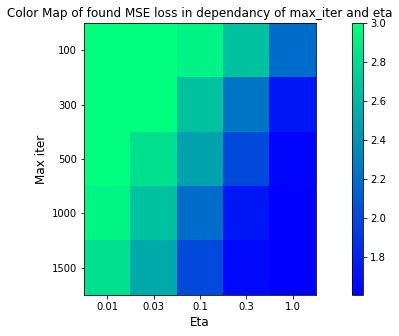

In [61]:
plot_color_map(found_MSE_list_full, eta_list, max_iter_list, vmax = 3)

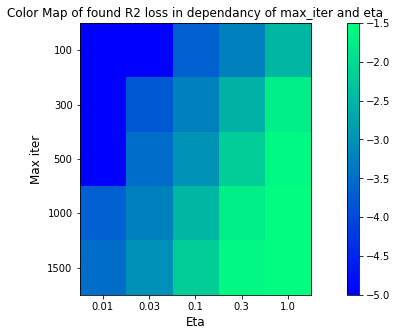

In [62]:
plot_color_map(found_R2_list_full, eta_list, max_iter_list, vmax = -1.5, loss_type="R2", vmin=-5)

# Stochastic

**Ответ**: тут немного другая ситуация, можно заметить, что после 0.1 градиент уже начнет не уменьшать функцию лосса а увеличивать, то есть мы начнем двигаться в обратно направлении и не придем ни к чему хорошему...

In [30]:
found_MSE_list_stoh = []
found_R2_list_stoh = []

i = -1
for max_it in max_iter_list:
    i += 1
    found_MSE_list_stoh.append([])
    found_R2_list_stoh.append([])
    
    for eta in eta_list:
        lin_reg_stoh = LinearReg(gd_type='stochastic', tolerance=1e-6, max_iter=max_it, w0=None, alpha=1e-3, eta=eta)
        lin_reg_stoh.fit(X_train, y_train)
        
        predictionVecStoh = lin_reg_stoh.predict(X_test)
        
        found_MSE_list_stoh[i].append(countMSE(np.array(predictionVecStoh), lin_reg_stoh.w))
        found_R2_list_stoh[i].append(countR2(np.array(predictionVecStoh), lin_reg_stoh.w))

100%|██████████| 1500/1500 [00:30<00:00, 49.97it/s]


In [31]:
max_iter_list

[100, 300, 500, 1000, 1500]

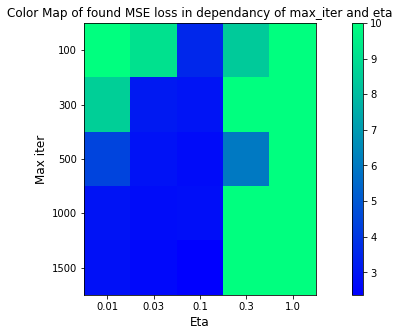

In [63]:
plot_color_map(found_MSE_list_stoh, eta_list, max_iter_list, vmax = 10)

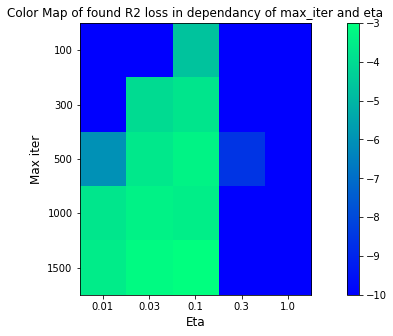

In [75]:
plot_color_map(found_R2_list_stoh, eta_list, max_iter_list, vmax = -3, loss_type="R2", vmin=-10)

# Momentum Grad

**Ответ**: Аналогичная ситуация, что и с фулл градиентом, однако эта модель чуть-чуть хуже на плохих параметрах и чуть чуть лучше (по сравнению с фулл град), как мне показалосб

In [34]:
found_MSE_list_mom = []
found_R2_list_mom = []

i = -1
for max_it in tqdm.tqdm(max_iter_list):
    i += 1
    found_MSE_list_mom.append([])
    found_R2_list_mom.append([])
    
    for eta in tqdm.tqdm(eta_list):
        lin_reg_mom = LinearReg(gd_type='momentum', tolerance=1e-6, max_iter=max_it, w0=None, alpha=1e-3, eta=eta)
        lin_reg_mom.fit(X_train, y_train)
        
        predictionVecMom = lin_reg_mom.predict(X_test)
        
        found_MSE_list_mom[i].append(countMSE(np.array(predictionVecMom), lin_reg_mom.w))
        found_R2_list_mom[i].append(countR2(np.array(predictionVecMom), lin_reg_mom.w))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

  4%|▍         | 4/100 [00:00<00:05, 16.57it/s]

  6%|▌         | 6/100 [00:00<00:05, 16.54it/s]

  8%|▊         | 8/100 [00:00<00:05, 16.68it/s]

 10%|█         | 10/100 [00:00<00:05, 16.80it/s]

 12%|█▏        | 12/100 [00:00<00:05, 16.86it/s]

 14%|█▍        | 14/100 [00:00<00:05, 16.93it/s]

 16%|█▌        | 16/100 [00:00<00:04, 17.01it/s]

 18%|█▊        | 18/100 [00:01<00:04, 16.85it/s]

 20%|██        | 20/100 [00:01<00:04, 16.84it/s]

 22%|██▏       | 22/100 [00:01<00:04, 16.88it/s]

 24%|██▍       | 24/100 [00:01<00:04, 16.87it/s]

 26%|██▌       | 26/100 [00:01<00:04, 16.85it/s]

 28%|██▊       | 28/100 [00:01<00:04, 16.44it/s]

 30%|███       | 30/100 [00:01<00:04, 16.03it/s]

 32%|███▏      | 32/100 [00:01<00:04, 16.23it/s]

 34%|███▍      | 34/100 [00:02<00:04, 16.40it/s]

 36%|███▌      | 36/100 [00:02<00:03, 16.63it/s]

 38%|███▊      | 38/100 

 82%|████████▏ | 82/100 [00:05<00:01, 16.96it/s]

 84%|████████▍ | 84/100 [00:05<00:00, 17.01it/s]

 86%|████████▌ | 86/100 [00:05<00:00, 16.90it/s]

 88%|████████▊ | 88/100 [00:05<00:00, 16.95it/s]

 90%|█████████ | 90/100 [00:05<00:00, 16.98it/s]

 92%|█████████▏| 92/100 [00:05<00:00, 16.52it/s]

 94%|█████████▍| 94/100 [00:05<00:00, 16.52it/s]

 96%|█████████▌| 96/100 [00:06<00:00, 16.34it/s]

 98%|█████████▊| 98/100 [00:06<00:00, 16.51it/s]

100%|██████████| 100/100 [00:06<00:00, 15.72it/s]

 60%|██████    | 3/5 [00:21<00:13,  7.00s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:05, 17.61it/s]

  4%|▍         | 4/100 [00:00<00:05, 17.46it/s]

  6%|▌         | 6/100 [00:00<00:05, 17.35it/s]

  8%|▊         | 8/100 [00:00<00:05, 17.26it/s]

 10%|█         | 10/100 [00:00<00:05, 17.26it/s]

 12%|█▏        | 12/100 [00:00<00:05, 17.15it/s]

 14%|█▍        | 14/100 [00:00<00:04, 17.23it/s]

 16%|█▌        | 16/100 [00:00<00:04, 17.16it/s]

 18%|█▊        

 20%|██        | 60/300 [00:03<00:14, 16.77it/s]

 21%|██        | 62/300 [00:03<00:14, 16.73it/s]

 21%|██▏       | 64/300 [00:03<00:14, 16.37it/s]

 22%|██▏       | 66/300 [00:03<00:14, 16.38it/s]

 23%|██▎       | 68/300 [00:04<00:14, 16.53it/s]

 23%|██▎       | 70/300 [00:04<00:13, 16.68it/s]

 24%|██▍       | 72/300 [00:04<00:13, 16.63it/s]

 25%|██▍       | 74/300 [00:04<00:13, 16.78it/s]

 25%|██▌       | 76/300 [00:04<00:13, 16.77it/s]

 26%|██▌       | 78/300 [00:04<00:13, 16.85it/s]

 27%|██▋       | 80/300 [00:04<00:13, 16.92it/s]

 27%|██▋       | 82/300 [00:04<00:12, 16.97it/s]

 28%|██▊       | 84/300 [00:05<00:12, 16.91it/s]

 29%|██▊       | 86/300 [00:05<00:12, 16.97it/s]

 29%|██▉       | 88/300 [00:05<00:12, 17.02it/s]

 30%|███       | 90/300 [00:05<00:12, 17.06it/s]

 31%|███       | 92/300 [00:05<00:12, 16.95it/s]

 31%|███▏      | 94/300 [00:05<00:12, 16.57it/s]

 32%|███▏      | 96/300 [00:05<00:12, 16.10it/s]

 33%|███▎      | 98/300 [00:05<00:12, 16.38it/s]



 15%|█▍        | 44/300 [00:02<00:15, 16.88it/s]

 15%|█▌        | 46/300 [00:02<00:15, 16.86it/s]

 16%|█▌        | 48/300 [00:02<00:15, 16.72it/s]

 17%|█▋        | 50/300 [00:02<00:15, 16.50it/s]

 17%|█▋        | 52/300 [00:03<00:15, 16.41it/s]

 18%|█▊        | 54/300 [00:03<00:15, 16.35it/s]

 19%|█▊        | 56/300 [00:03<00:14, 16.53it/s]

 19%|█▉        | 58/300 [00:03<00:14, 16.72it/s]

 20%|██        | 60/300 [00:03<00:14, 16.78it/s]

 21%|██        | 62/300 [00:03<00:14, 16.79it/s]

 21%|██▏       | 64/300 [00:03<00:14, 16.78it/s]

 22%|██▏       | 66/300 [00:03<00:13, 16.91it/s]

 23%|██▎       | 68/300 [00:04<00:13, 16.93it/s]

 23%|██▎       | 70/300 [00:04<00:13, 17.02it/s]

 24%|██▍       | 72/300 [00:04<00:13, 16.96it/s]

 25%|██▍       | 74/300 [00:04<00:13, 17.03it/s]

 25%|██▌       | 76/300 [00:04<00:13, 17.06it/s]

 26%|██▌       | 78/300 [00:04<00:12, 17.09it/s]

 27%|██▋       | 80/300 [00:04<00:13, 16.86it/s]

 27%|██▋       | 82/300 [00:04<00:13, 16.67it/s]



  9%|▉         | 28/300 [00:02<00:21, 12.37it/s]

 10%|█         | 30/300 [00:02<00:23, 11.45it/s]

 11%|█         | 32/300 [00:02<00:21, 12.35it/s]

 11%|█▏        | 34/300 [00:02<00:20, 13.21it/s]

 12%|█▏        | 36/300 [00:02<00:19, 13.63it/s]

 13%|█▎        | 38/300 [00:02<00:18, 14.43it/s]

 13%|█▎        | 40/300 [00:02<00:18, 14.10it/s]

 14%|█▍        | 42/300 [00:03<00:18, 13.77it/s]

 15%|█▍        | 44/300 [00:03<00:17, 14.24it/s]

 15%|█▌        | 46/300 [00:03<00:17, 14.65it/s]

 16%|█▌        | 48/300 [00:03<00:16, 14.99it/s]

 17%|█▋        | 50/300 [00:03<00:16, 15.01it/s]

 17%|█▋        | 52/300 [00:03<00:17, 14.54it/s]

 18%|█▊        | 54/300 [00:03<00:16, 15.01it/s]

 19%|█▊        | 56/300 [00:04<00:16, 15.18it/s]

 19%|█▉        | 58/300 [00:04<00:16, 14.69it/s]

 20%|██        | 60/300 [00:04<00:16, 14.96it/s]

 21%|██        | 62/300 [00:04<00:18, 12.86it/s]

 21%|██▏       | 64/300 [00:04<00:19, 11.88it/s]

 22%|██▏       | 66/300 [00:04<00:20, 11.29it/s]



  4%|▍         | 12/300 [00:00<00:17, 16.64it/s]

  5%|▍         | 14/300 [00:00<00:17, 16.65it/s]

  5%|▌         | 16/300 [00:00<00:17, 16.59it/s]

  6%|▌         | 18/300 [00:01<00:16, 16.67it/s]

  7%|▋         | 20/300 [00:01<00:16, 16.79it/s]

  7%|▋         | 22/300 [00:01<00:16, 16.83it/s]

  8%|▊         | 24/300 [00:01<00:16, 16.90it/s]

  9%|▊         | 26/300 [00:01<00:16, 16.97it/s]

  9%|▉         | 28/300 [00:01<00:16, 16.94it/s]

 10%|█         | 30/300 [00:01<00:15, 17.00it/s]

 11%|█         | 32/300 [00:01<00:15, 16.97it/s]

 11%|█▏        | 34/300 [00:02<00:15, 17.04it/s]

 12%|█▏        | 36/300 [00:02<00:15, 16.98it/s]

 13%|█▎        | 38/300 [00:02<00:15, 16.95it/s]

 13%|█▎        | 40/300 [00:02<00:15, 16.99it/s]

 14%|█▍        | 42/300 [00:02<00:15, 16.77it/s]

 15%|█▍        | 44/300 [00:02<00:15, 16.49it/s]

 15%|█▌        | 46/300 [00:02<00:15, 16.57it/s]

 16%|█▌        | 48/300 [00:02<00:15, 16.68it/s]

 17%|█▋        | 50/300 [00:02<00:14, 16.78it/s]



100%|██████████| 300/300 [00:17<00:00, 16.70it/s]

 80%|████████  | 4/5 [01:17<00:19, 19.36s/it]

  0%|          | 0/300 [00:00<?, ?it/s]

  1%|          | 2/300 [00:00<00:16, 17.55it/s]

  1%|▏         | 4/300 [00:00<00:17, 17.34it/s]

  2%|▏         | 6/300 [00:00<00:17, 17.14it/s]

  3%|▎         | 8/300 [00:00<00:17, 17.01it/s]

  3%|▎         | 10/300 [00:00<00:17, 17.02it/s]

  4%|▍         | 12/300 [00:00<00:17, 16.92it/s]

  5%|▍         | 14/300 [00:00<00:16, 16.88it/s]

  5%|▌         | 16/300 [00:00<00:16, 16.89it/s]

  6%|▌         | 18/300 [00:01<00:16, 16.80it/s]

  7%|▋         | 20/300 [00:01<00:16, 16.83it/s]

  7%|▋         | 22/300 [00:01<00:16, 16.83it/s]

  8%|▊         | 24/300 [00:01<00:16, 16.83it/s]

  9%|▊         | 26/300 [00:01<00:16, 16.79it/s]

  9%|▉         | 28/300 [00:01<00:16, 16.78it/s]

 10%|█         | 30/300 [00:01<00:16, 16.61it/s]

 11%|█         | 32/300 [00:01<00:16, 16.47it/s]

 11%|█▏        | 34/300 [00:02<00:16, 16.33it/s]

 12%|█▏        

 95%|█████████▍| 284/300 [00:16<00:00, 17.01it/s]

 95%|█████████▌| 286/300 [00:17<00:00, 16.97it/s]

 96%|█████████▌| 288/300 [00:17<00:00, 17.01it/s]

 97%|█████████▋| 290/300 [00:17<00:00, 16.96it/s]

 97%|█████████▋| 292/300 [00:17<00:00, 16.72it/s]

 98%|█████████▊| 294/300 [00:17<00:00, 16.18it/s]

 99%|█████████▊| 296/300 [00:17<00:00, 16.41it/s]

 99%|█████████▉| 298/300 [00:17<00:00, 16.35it/s]

100%|██████████| 300/300 [00:17<00:00, 16.77it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 2/500 [00:00<00:28, 17.45it/s]

  1%|          | 4/500 [00:00<00:28, 17.37it/s]

  1%|          | 6/500 [00:00<00:28, 17.29it/s]

  2%|▏         | 8/500 [00:00<00:28, 17.25it/s]

  2%|▏         | 10/500 [00:00<00:28, 17.20it/s]

  2%|▏         | 12/500 [00:00<00:28, 17.12it/s]

  3%|▎         | 14/500 [00:00<00:28, 17.00it/s]

  3%|▎         | 16/500 [00:00<00:28, 16.76it/s]

  4%|▎         | 18/500 [00:01<00:29, 16.61it/s]

  4%|▍         

 53%|█████▎    | 266/500 [00:15<00:13, 16.89it/s]

 54%|█████▎    | 268/500 [00:16<00:13, 16.92it/s]

 54%|█████▍    | 270/500 [00:16<00:13, 16.93it/s]

 54%|█████▍    | 272/500 [00:16<00:13, 17.05it/s]

 55%|█████▍    | 274/500 [00:16<00:13, 17.03it/s]

 55%|█████▌    | 276/500 [00:16<00:13, 17.10it/s]

 56%|█████▌    | 278/500 [00:16<00:13, 16.89it/s]

 56%|█████▌    | 280/500 [00:16<00:13, 16.64it/s]

 56%|█████▋    | 282/500 [00:16<00:13, 16.17it/s]

 57%|█████▋    | 284/500 [00:16<00:13, 16.47it/s]

 57%|█████▋    | 286/500 [00:17<00:13, 15.89it/s]

 58%|█████▊    | 288/500 [00:17<00:13, 16.21it/s]

 58%|█████▊    | 290/500 [00:17<00:12, 16.32it/s]

 58%|█████▊    | 292/500 [00:17<00:12, 16.58it/s]

 59%|█████▉    | 294/500 [00:17<00:12, 16.67it/s]

 59%|█████▉    | 296/500 [00:17<00:12, 16.83it/s]

 60%|█████▉    | 298/500 [00:17<00:11, 16.85it/s]

 60%|██████    | 300/500 [00:17<00:11, 16.94it/s]

 60%|██████    | 302/500 [00:18<00:11, 16.98it/s]

 61%|██████    | 304/500 [00:18

 10%|█         | 50/500 [00:03<00:35, 12.74it/s]

 10%|█         | 52/500 [00:04<00:33, 13.18it/s]

 11%|█         | 54/500 [00:04<00:32, 13.89it/s]

 11%|█         | 56/500 [00:04<00:30, 14.56it/s]

 12%|█▏        | 58/500 [00:04<00:31, 13.88it/s]

 12%|█▏        | 60/500 [00:04<00:32, 13.50it/s]

 12%|█▏        | 62/500 [00:04<00:31, 13.74it/s]

 13%|█▎        | 64/500 [00:04<00:30, 14.13it/s]

 13%|█▎        | 66/500 [00:05<00:30, 14.42it/s]

 14%|█▎        | 68/500 [00:05<00:29, 14.76it/s]

 14%|█▍        | 70/500 [00:05<00:28, 15.18it/s]

 14%|█▍        | 72/500 [00:05<00:27, 15.45it/s]

 15%|█▍        | 74/500 [00:05<00:28, 15.09it/s]

 15%|█▌        | 76/500 [00:05<00:33, 12.54it/s]

 16%|█▌        | 78/500 [00:06<00:40, 10.44it/s]

 16%|█▌        | 80/500 [00:06<00:36, 11.45it/s]

 16%|█▋        | 82/500 [00:06<00:33, 12.49it/s]

 17%|█▋        | 84/500 [00:06<00:30, 13.47it/s]

 17%|█▋        | 86/500 [00:06<00:29, 13.84it/s]

 18%|█▊        | 88/500 [00:06<00:28, 14.53it/s]



 68%|██████▊   | 338/500 [00:22<00:09, 16.57it/s]

 68%|██████▊   | 340/500 [00:22<00:09, 16.69it/s]

 68%|██████▊   | 342/500 [00:22<00:09, 16.71it/s]

 69%|██████▉   | 344/500 [00:22<00:09, 16.70it/s]

 69%|██████▉   | 346/500 [00:23<00:09, 16.56it/s]

 70%|██████▉   | 348/500 [00:23<00:09, 15.49it/s]

 70%|███████   | 350/500 [00:23<00:09, 15.11it/s]

 70%|███████   | 352/500 [00:23<00:09, 15.63it/s]

 71%|███████   | 354/500 [00:23<00:09, 15.71it/s]

 71%|███████   | 356/500 [00:23<00:08, 16.16it/s]

 72%|███████▏  | 358/500 [00:23<00:08, 16.36it/s]

 72%|███████▏  | 360/500 [00:24<00:08, 16.63it/s]

 72%|███████▏  | 362/500 [00:24<00:08, 16.48it/s]

 73%|███████▎  | 364/500 [00:24<00:08, 16.52it/s]

 73%|███████▎  | 366/500 [00:24<00:08, 16.69it/s]

 74%|███████▎  | 368/500 [00:24<00:07, 16.81it/s]

 74%|███████▍  | 370/500 [00:24<00:07, 16.85it/s]

 74%|███████▍  | 372/500 [00:24<00:07, 16.94it/s]

 75%|███████▍  | 374/500 [00:24<00:07, 16.90it/s]

 75%|███████▌  | 376/500 [00:24

 24%|██▍       | 122/500 [00:07<00:22, 16.70it/s]

 25%|██▍       | 124/500 [00:07<00:22, 16.80it/s]

 25%|██▌       | 126/500 [00:07<00:22, 16.78it/s]

 26%|██▌       | 128/500 [00:07<00:22, 16.81it/s]

 26%|██▌       | 130/500 [00:07<00:22, 16.42it/s]

 26%|██▋       | 132/500 [00:07<00:22, 16.58it/s]

 27%|██▋       | 134/500 [00:08<00:22, 16.45it/s]

 27%|██▋       | 136/500 [00:08<00:22, 16.30it/s]

 28%|██▊       | 138/500 [00:08<00:22, 16.44it/s]

 28%|██▊       | 140/500 [00:08<00:21, 16.63it/s]

 28%|██▊       | 142/500 [00:08<00:21, 16.70it/s]

 29%|██▉       | 144/500 [00:08<00:21, 16.69it/s]

 29%|██▉       | 146/500 [00:08<00:21, 16.67it/s]

 30%|██▉       | 148/500 [00:08<00:20, 16.77it/s]

 30%|███       | 150/500 [00:09<00:20, 16.84it/s]

 30%|███       | 152/500 [00:09<00:20, 16.83it/s]

 31%|███       | 154/500 [00:09<00:20, 16.91it/s]

 31%|███       | 156/500 [00:09<00:20, 16.92it/s]

 32%|███▏      | 158/500 [00:09<00:20, 16.96it/s]

 32%|███▏      | 160/500 [00:09

 82%|████████▏ | 408/500 [00:24<00:05, 16.46it/s]

 82%|████████▏ | 410/500 [00:24<00:05, 16.51it/s]

 82%|████████▏ | 412/500 [00:24<00:05, 16.45it/s]

 83%|████████▎ | 414/500 [00:25<00:05, 16.50it/s]

 83%|████████▎ | 416/500 [00:25<00:05, 16.56it/s]

 84%|████████▎ | 418/500 [00:25<00:04, 16.67it/s]

 84%|████████▍ | 420/500 [00:25<00:04, 16.75it/s]

 84%|████████▍ | 422/500 [00:25<00:04, 16.83it/s]

 85%|████████▍ | 424/500 [00:25<00:04, 16.77it/s]

 85%|████████▌ | 426/500 [00:25<00:04, 16.86it/s]

 86%|████████▌ | 428/500 [00:25<00:04, 16.86it/s]

 86%|████████▌ | 430/500 [00:26<00:04, 16.94it/s]

 86%|████████▋ | 432/500 [00:26<00:04, 16.62it/s]

 87%|████████▋ | 434/500 [00:26<00:04, 16.41it/s]

 87%|████████▋ | 436/500 [00:26<00:03, 16.14it/s]

 88%|████████▊ | 438/500 [00:26<00:03, 16.29it/s]

 88%|████████▊ | 440/500 [00:26<00:03, 16.35it/s]

 88%|████████▊ | 442/500 [00:26<00:03, 16.47it/s]

 89%|████████▉ | 444/500 [00:26<00:03, 16.49it/s]

 89%|████████▉ | 446/500 [00:27

 38%|███▊      | 192/500 [00:11<00:20, 14.84it/s]

 39%|███▉      | 194/500 [00:11<00:21, 14.50it/s]

 39%|███▉      | 196/500 [00:11<00:21, 14.32it/s]

 40%|███▉      | 198/500 [00:12<00:20, 14.86it/s]

 40%|████      | 200/500 [00:12<00:19, 15.35it/s]

 40%|████      | 202/500 [00:12<00:19, 15.62it/s]

 41%|████      | 204/500 [00:12<00:18, 15.84it/s]

 41%|████      | 206/500 [00:12<00:18, 16.18it/s]

 42%|████▏     | 208/500 [00:12<00:17, 16.37it/s]

 42%|████▏     | 210/500 [00:12<00:17, 16.49it/s]

 42%|████▏     | 212/500 [00:12<00:17, 16.45it/s]

 43%|████▎     | 214/500 [00:13<00:17, 16.50it/s]

 43%|████▎     | 216/500 [00:13<00:19, 14.65it/s]

 44%|████▎     | 218/500 [00:13<00:19, 14.24it/s]

 44%|████▍     | 220/500 [00:13<00:20, 13.40it/s]

 44%|████▍     | 222/500 [00:13<00:20, 13.70it/s]

 45%|████▍     | 224/500 [00:13<00:19, 14.52it/s]

 45%|████▌     | 226/500 [00:13<00:18, 15.15it/s]

 46%|████▌     | 228/500 [00:14<00:17, 15.68it/s]

 46%|████▌     | 230/500 [00:14

 96%|█████████▌| 478/500 [00:31<00:01, 16.09it/s]

 96%|█████████▌| 480/500 [00:31<00:01, 16.08it/s]

 96%|█████████▋| 482/500 [00:31<00:01, 16.17it/s]

 97%|█████████▋| 484/500 [00:31<00:00, 16.03it/s]

 97%|█████████▋| 486/500 [00:31<00:00, 16.02it/s]

 98%|█████████▊| 488/500 [00:31<00:00, 15.96it/s]

 98%|█████████▊| 490/500 [00:31<00:00, 16.06it/s]

 98%|█████████▊| 492/500 [00:31<00:00, 16.19it/s]

 99%|█████████▉| 494/500 [00:32<00:00, 16.09it/s]

 99%|█████████▉| 496/500 [00:32<00:00, 15.93it/s]

100%|█████████▉| 498/500 [00:32<00:00, 15.87it/s]

100%|██████████| 500/500 [00:32<00:00, 15.38it/s]

 80%|████████  | 4/5 [02:09<00:32, 32.24s/it]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 2/500 [00:00<00:33, 14.67it/s]

  1%|          | 4/500 [00:00<00:33, 14.71it/s]

  1%|          | 6/500 [00:00<00:33, 14.54it/s]

  2%|▏         | 8/500 [00:00<00:34, 14.42it/s]

  2%|▏         | 10/500 [00:00<00:33, 14.41it/s]

  2%|▏         | 12/500 [00:00<00:33, 14.71it/s]

  3%

 52%|█████▏    | 262/500 [00:16<00:14, 16.65it/s]

 53%|█████▎    | 264/500 [00:16<00:14, 16.68it/s]

 53%|█████▎    | 266/500 [00:16<00:14, 16.68it/s]

 54%|█████▎    | 268/500 [00:16<00:13, 16.77it/s]

 54%|█████▍    | 270/500 [00:16<00:13, 16.81it/s]

 54%|█████▍    | 272/500 [00:16<00:13, 16.86it/s]

 55%|█████▍    | 274/500 [00:16<00:13, 16.80it/s]

 55%|█████▌    | 276/500 [00:16<00:13, 16.86it/s]

 56%|█████▌    | 278/500 [00:17<00:13, 16.91it/s]

 56%|█████▌    | 280/500 [00:17<00:12, 16.97it/s]

 56%|█████▋    | 282/500 [00:17<00:12, 17.02it/s]

 57%|█████▋    | 284/500 [00:17<00:12, 17.02it/s]

 57%|█████▋    | 286/500 [00:17<00:12, 17.11it/s]

 58%|█████▊    | 288/500 [00:17<00:12, 17.07it/s]

 58%|█████▊    | 290/500 [00:17<00:12, 17.10it/s]

 58%|█████▊    | 292/500 [00:17<00:12, 17.00it/s]

 59%|█████▉    | 294/500 [00:17<00:12, 16.69it/s]

 59%|█████▉    | 296/500 [00:18<00:12, 16.64it/s]

 60%|█████▉    | 298/500 [00:18<00:12, 16.75it/s]

 60%|██████    | 300/500 [00:18

  4%|▍         | 42/1000 [00:02<00:56, 16.97it/s]

  4%|▍         | 44/1000 [00:02<00:56, 17.01it/s]

  5%|▍         | 46/1000 [00:02<00:55, 17.09it/s]

  5%|▍         | 48/1000 [00:02<00:56, 16.75it/s]

  5%|▌         | 50/1000 [00:02<00:57, 16.54it/s]

  5%|▌         | 52/1000 [00:03<00:57, 16.56it/s]

  5%|▌         | 54/1000 [00:03<00:56, 16.73it/s]

  6%|▌         | 56/1000 [00:03<00:56, 16.74it/s]

  6%|▌         | 58/1000 [00:03<00:56, 16.76it/s]

  6%|▌         | 60/1000 [00:03<00:56, 16.71it/s]

  6%|▌         | 62/1000 [00:03<00:55, 16.77it/s]

  6%|▋         | 64/1000 [00:03<00:55, 16.79it/s]

  7%|▋         | 66/1000 [00:03<00:55, 16.87it/s]

  7%|▋         | 68/1000 [00:04<00:55, 16.86it/s]

  7%|▋         | 70/1000 [00:04<00:54, 16.96it/s]

  7%|▋         | 72/1000 [00:04<00:54, 16.97it/s]

  7%|▋         | 74/1000 [00:04<00:54, 17.03it/s]

  8%|▊         | 76/1000 [00:04<00:54, 17.03it/s]

  8%|▊         | 78/1000 [00:04<00:54, 16.82it/s]

  8%|▊         | 80/1000 [00:04

 32%|███▏      | 324/1000 [00:19<00:41, 16.17it/s]

 33%|███▎      | 326/1000 [00:19<00:41, 16.40it/s]

 33%|███▎      | 328/1000 [00:19<00:40, 16.59it/s]

 33%|███▎      | 330/1000 [00:19<00:40, 16.65it/s]

 33%|███▎      | 332/1000 [00:19<00:40, 16.51it/s]

 33%|███▎      | 334/1000 [00:20<00:40, 16.64it/s]

 34%|███▎      | 336/1000 [00:20<00:39, 16.72it/s]

 34%|███▍      | 338/1000 [00:20<00:39, 16.77it/s]

 34%|███▍      | 340/1000 [00:20<00:39, 16.66it/s]

 34%|███▍      | 342/1000 [00:20<00:39, 16.72it/s]

 34%|███▍      | 344/1000 [00:20<00:39, 16.70it/s]

 35%|███▍      | 346/1000 [00:20<00:38, 16.77it/s]

 35%|███▍      | 348/1000 [00:20<00:39, 16.37it/s]

 35%|███▌      | 350/1000 [00:21<00:40, 16.16it/s]

 35%|███▌      | 352/1000 [00:21<00:39, 16.23it/s]

 35%|███▌      | 354/1000 [00:21<00:39, 16.43it/s]

 36%|███▌      | 356/1000 [00:21<00:38, 16.60it/s]

 36%|███▌      | 358/1000 [00:21<00:38, 16.76it/s]

 36%|███▌      | 360/1000 [00:21<00:38, 16.80it/s]

 36%|███▌   

 61%|██████    | 606/1000 [00:36<00:23, 16.59it/s]

 61%|██████    | 608/1000 [00:36<00:23, 16.66it/s]

 61%|██████    | 610/1000 [00:36<00:23, 16.33it/s]

 61%|██████    | 612/1000 [00:36<00:23, 16.51it/s]

 61%|██████▏   | 614/1000 [00:37<00:23, 16.31it/s]

 62%|██████▏   | 616/1000 [00:37<00:24, 15.97it/s]

 62%|██████▏   | 618/1000 [00:37<00:23, 16.22it/s]

 62%|██████▏   | 620/1000 [00:37<00:23, 16.21it/s]

 62%|██████▏   | 622/1000 [00:37<00:23, 16.42it/s]

 62%|██████▏   | 624/1000 [00:37<00:22, 16.58it/s]

 63%|██████▎   | 626/1000 [00:37<00:22, 16.67it/s]

 63%|██████▎   | 628/1000 [00:37<00:22, 16.72it/s]

 63%|██████▎   | 630/1000 [00:38<00:22, 16.80it/s]

 63%|██████▎   | 632/1000 [00:38<00:21, 16.90it/s]

 63%|██████▎   | 634/1000 [00:38<00:21, 16.93it/s]

 64%|██████▎   | 636/1000 [00:38<00:21, 16.91it/s]

 64%|██████▍   | 638/1000 [00:38<00:21, 16.96it/s]

 64%|██████▍   | 640/1000 [00:38<00:21, 17.00it/s]

 64%|██████▍   | 642/1000 [00:38<00:21, 16.75it/s]

 64%|██████▍

 89%|████████▉ | 888/1000 [00:53<00:06, 16.85it/s]

 89%|████████▉ | 890/1000 [00:53<00:06, 16.79it/s]

 89%|████████▉ | 892/1000 [00:53<00:06, 16.96it/s]

 89%|████████▉ | 894/1000 [00:54<00:06, 16.94it/s]

 90%|████████▉ | 896/1000 [00:54<00:06, 17.04it/s]

 90%|████████▉ | 898/1000 [00:54<00:06, 16.92it/s]

 90%|█████████ | 900/1000 [00:54<00:05, 16.86it/s]

 90%|█████████ | 902/1000 [00:54<00:05, 16.92it/s]

 90%|█████████ | 904/1000 [00:54<00:05, 16.99it/s]

 91%|█████████ | 906/1000 [00:54<00:05, 16.97it/s]

 91%|█████████ | 908/1000 [00:54<00:05, 17.02it/s]

 91%|█████████ | 910/1000 [00:55<00:05, 16.55it/s]

 91%|█████████ | 912/1000 [00:55<00:05, 16.20it/s]

 91%|█████████▏| 914/1000 [00:55<00:05, 16.37it/s]

 92%|█████████▏| 916/1000 [00:55<00:05, 16.55it/s]

 92%|█████████▏| 918/1000 [00:55<00:04, 16.57it/s]

 92%|█████████▏| 920/1000 [00:55<00:04, 16.57it/s]

 92%|█████████▏| 922/1000 [00:55<00:04, 16.69it/s]

 92%|█████████▏| 924/1000 [00:55<00:04, 16.80it/s]

 93%|███████

 17%|█▋        | 168/1000 [00:10<00:49, 16.69it/s]

 17%|█▋        | 170/1000 [00:10<00:49, 16.81it/s]

 17%|█▋        | 172/1000 [00:10<00:49, 16.57it/s]

 17%|█▋        | 174/1000 [00:10<00:49, 16.68it/s]

 18%|█▊        | 176/1000 [00:10<00:48, 16.88it/s]

 18%|█▊        | 178/1000 [00:10<00:48, 16.79it/s]

 18%|█▊        | 180/1000 [00:10<00:48, 16.89it/s]

 18%|█▊        | 182/1000 [00:10<00:48, 16.96it/s]

 18%|█▊        | 184/1000 [00:10<00:47, 17.01it/s]

 19%|█▊        | 186/1000 [00:11<00:47, 17.03it/s]

 19%|█▉        | 188/1000 [00:11<00:47, 17.07it/s]

 19%|█▉        | 190/1000 [00:11<00:47, 16.97it/s]

 19%|█▉        | 192/1000 [00:11<00:48, 16.71it/s]

 19%|█▉        | 194/1000 [00:11<00:49, 16.43it/s]

 20%|█▉        | 196/1000 [00:11<00:48, 16.57it/s]

 20%|█▉        | 198/1000 [00:11<00:48, 16.69it/s]

 20%|██        | 200/1000 [00:11<00:47, 16.86it/s]

 20%|██        | 202/1000 [00:12<00:47, 16.84it/s]

 20%|██        | 204/1000 [00:12<00:47, 16.92it/s]

 21%|██     

 45%|████▌     | 450/1000 [00:26<00:32, 16.68it/s]

 45%|████▌     | 452/1000 [00:26<00:32, 16.83it/s]

 45%|████▌     | 454/1000 [00:27<00:32, 16.86it/s]

 46%|████▌     | 456/1000 [00:27<00:31, 17.00it/s]

 46%|████▌     | 458/1000 [00:27<00:31, 17.04it/s]

 46%|████▌     | 460/1000 [00:27<00:31, 17.02it/s]

 46%|████▌     | 462/1000 [00:27<00:32, 16.77it/s]

 46%|████▋     | 464/1000 [00:27<00:32, 16.47it/s]

 47%|████▋     | 466/1000 [00:27<00:32, 16.54it/s]

 47%|████▋     | 468/1000 [00:27<00:32, 16.42it/s]

 47%|████▋     | 470/1000 [00:28<00:32, 16.38it/s]

 47%|████▋     | 472/1000 [00:28<00:31, 16.52it/s]

 47%|████▋     | 474/1000 [00:28<00:32, 16.34it/s]

 48%|████▊     | 476/1000 [00:28<00:31, 16.44it/s]

 48%|████▊     | 478/1000 [00:28<00:31, 16.53it/s]

 48%|████▊     | 480/1000 [00:28<00:31, 16.47it/s]

 48%|████▊     | 482/1000 [00:28<00:31, 16.53it/s]

 48%|████▊     | 484/1000 [00:28<00:31, 16.52it/s]

 49%|████▊     | 486/1000 [00:28<00:31, 16.45it/s]

 49%|████▉  

 73%|███████▎  | 732/1000 [00:43<00:16, 16.23it/s]

 73%|███████▎  | 734/1000 [00:43<00:16, 16.08it/s]

 74%|███████▎  | 736/1000 [00:43<00:16, 16.41it/s]

 74%|███████▍  | 738/1000 [00:44<00:15, 16.42it/s]

 74%|███████▍  | 740/1000 [00:44<00:15, 16.58it/s]

 74%|███████▍  | 742/1000 [00:44<00:15, 16.63it/s]

 74%|███████▍  | 744/1000 [00:44<00:16, 15.81it/s]

 75%|███████▍  | 746/1000 [00:44<00:16, 15.22it/s]

 75%|███████▍  | 748/1000 [00:44<00:16, 15.23it/s]

 75%|███████▌  | 750/1000 [00:44<00:16, 15.11it/s]

 75%|███████▌  | 752/1000 [00:45<00:16, 15.40it/s]

 75%|███████▌  | 754/1000 [00:45<00:16, 15.28it/s]

 76%|███████▌  | 756/1000 [00:45<00:15, 15.43it/s]

 76%|███████▌  | 758/1000 [00:45<00:15, 15.14it/s]

 76%|███████▌  | 760/1000 [00:45<00:15, 15.06it/s]

 76%|███████▌  | 762/1000 [00:45<00:15, 15.33it/s]

 76%|███████▋  | 764/1000 [00:45<00:15, 15.70it/s]

 77%|███████▋  | 766/1000 [00:45<00:14, 16.06it/s]

 77%|███████▋  | 768/1000 [00:46<00:14, 16.23it/s]

 77%|███████

  1%|          | 10/1000 [00:00<00:58, 16.92it/s]

  1%|          | 12/1000 [00:00<00:58, 16.96it/s]

  1%|▏         | 14/1000 [00:00<00:58, 16.76it/s]

  2%|▏         | 16/1000 [00:00<00:59, 16.62it/s]

  2%|▏         | 18/1000 [00:01<00:59, 16.52it/s]

  2%|▏         | 20/1000 [00:01<00:58, 16.65it/s]

  2%|▏         | 22/1000 [00:01<00:58, 16.79it/s]

  2%|▏         | 24/1000 [00:01<00:57, 16.87it/s]

  3%|▎         | 26/1000 [00:01<00:58, 16.72it/s]

  3%|▎         | 28/1000 [00:01<00:57, 16.85it/s]

  3%|▎         | 30/1000 [00:01<00:57, 16.89it/s]

  3%|▎         | 32/1000 [00:01<00:57, 16.86it/s]

  3%|▎         | 34/1000 [00:02<01:02, 15.38it/s]

  4%|▎         | 36/1000 [00:02<01:03, 15.17it/s]

  4%|▍         | 38/1000 [00:02<01:02, 15.48it/s]

  4%|▍         | 40/1000 [00:02<01:01, 15.71it/s]

  4%|▍         | 42/1000 [00:02<01:01, 15.50it/s]

  4%|▍         | 44/1000 [00:02<01:03, 15.03it/s]

  5%|▍         | 46/1000 [00:02<01:04, 14.78it/s]

  5%|▍         | 48/1000 [00:02

 29%|██▉       | 294/1000 [00:17<00:42, 16.65it/s]

 30%|██▉       | 296/1000 [00:17<00:41, 16.78it/s]

 30%|██▉       | 298/1000 [00:17<00:41, 16.81it/s]

 30%|███       | 300/1000 [00:18<00:41, 16.94it/s]

 30%|███       | 302/1000 [00:18<00:41, 16.99it/s]

 30%|███       | 304/1000 [00:18<00:40, 17.02it/s]

 31%|███       | 306/1000 [00:18<00:40, 17.05it/s]

 31%|███       | 308/1000 [00:18<00:40, 17.08it/s]

 31%|███       | 310/1000 [00:18<00:40, 17.14it/s]

 31%|███       | 312/1000 [00:18<00:40, 17.12it/s]

 31%|███▏      | 314/1000 [00:18<00:40, 16.90it/s]

 32%|███▏      | 316/1000 [00:19<00:41, 16.61it/s]

 32%|███▏      | 318/1000 [00:19<00:41, 16.60it/s]

 32%|███▏      | 320/1000 [00:19<00:40, 16.69it/s]

 32%|███▏      | 322/1000 [00:19<00:40, 16.71it/s]

 32%|███▏      | 324/1000 [00:19<00:40, 16.78it/s]

 33%|███▎      | 326/1000 [00:19<00:39, 16.88it/s]

 33%|███▎      | 328/1000 [00:19<00:39, 16.93it/s]

 33%|███▎      | 330/1000 [00:19<00:39, 17.02it/s]

 33%|███▎   

 58%|█████▊    | 576/1000 [00:34<00:25, 16.62it/s]

 58%|█████▊    | 578/1000 [00:34<00:26, 16.16it/s]

 58%|█████▊    | 580/1000 [00:34<00:26, 16.05it/s]

 58%|█████▊    | 582/1000 [00:34<00:26, 16.01it/s]

 58%|█████▊    | 584/1000 [00:35<00:25, 16.10it/s]

 59%|█████▊    | 586/1000 [00:35<00:25, 16.34it/s]

 59%|█████▉    | 588/1000 [00:35<00:25, 16.46it/s]

 59%|█████▉    | 590/1000 [00:35<00:24, 16.56it/s]

 59%|█████▉    | 592/1000 [00:35<00:24, 16.63it/s]

 59%|█████▉    | 594/1000 [00:35<00:24, 16.72it/s]

 60%|█████▉    | 596/1000 [00:35<00:23, 16.84it/s]

 60%|█████▉    | 598/1000 [00:35<00:23, 16.86it/s]

 60%|██████    | 600/1000 [00:36<00:23, 16.92it/s]

 60%|██████    | 602/1000 [00:36<00:23, 16.99it/s]

 60%|██████    | 604/1000 [00:36<00:23, 17.03it/s]

 61%|██████    | 606/1000 [00:36<00:23, 17.03it/s]

 61%|██████    | 608/1000 [00:36<00:23, 16.92it/s]

 61%|██████    | 610/1000 [00:36<00:22, 16.96it/s]

 61%|██████    | 612/1000 [00:36<00:22, 16.90it/s]

 61%|██████▏

 86%|████████▌ | 858/1000 [00:51<00:08, 16.79it/s]

 86%|████████▌ | 860/1000 [00:51<00:08, 16.88it/s]

 86%|████████▌ | 862/1000 [00:51<00:08, 16.91it/s]

 86%|████████▋ | 864/1000 [00:51<00:08, 16.95it/s]

 87%|████████▋ | 866/1000 [00:52<00:07, 16.93it/s]

 87%|████████▋ | 868/1000 [00:52<00:07, 17.01it/s]

 87%|████████▋ | 870/1000 [00:52<00:07, 16.81it/s]

 87%|████████▋ | 872/1000 [00:52<00:07, 16.76it/s]

 87%|████████▋ | 874/1000 [00:52<00:07, 16.71it/s]

 88%|████████▊ | 876/1000 [00:52<00:07, 16.78it/s]

 88%|████████▊ | 878/1000 [00:52<00:07, 16.46it/s]

 88%|████████▊ | 880/1000 [00:52<00:07, 16.22it/s]

 88%|████████▊ | 882/1000 [00:53<00:07, 16.19it/s]

 88%|████████▊ | 884/1000 [00:53<00:07, 16.46it/s]

 89%|████████▊ | 886/1000 [00:53<00:06, 16.54it/s]

 89%|████████▉ | 888/1000 [00:53<00:06, 16.54it/s]

 89%|████████▉ | 890/1000 [00:53<00:06, 16.63it/s]

 89%|████████▉ | 892/1000 [00:53<00:06, 16.75it/s]

 89%|████████▉ | 894/1000 [00:53<00:06, 16.66it/s]

 90%|███████

 14%|█▍        | 138/1000 [00:08<00:52, 16.55it/s]

 14%|█▍        | 140/1000 [00:08<00:51, 16.72it/s]

 14%|█▍        | 142/1000 [00:08<00:51, 16.75it/s]

 14%|█▍        | 144/1000 [00:08<00:50, 16.85it/s]

 15%|█▍        | 146/1000 [00:08<00:50, 16.92it/s]

 15%|█▍        | 148/1000 [00:08<00:50, 17.01it/s]

 15%|█▌        | 150/1000 [00:08<00:49, 17.00it/s]

 15%|█▌        | 152/1000 [00:09<00:49, 17.04it/s]

 15%|█▌        | 154/1000 [00:09<00:49, 16.94it/s]

 16%|█▌        | 156/1000 [00:09<00:49, 16.99it/s]

 16%|█▌        | 158/1000 [00:09<00:49, 16.89it/s]

 16%|█▌        | 160/1000 [00:09<00:49, 16.89it/s]

 16%|█▌        | 162/1000 [00:09<00:50, 16.73it/s]

 16%|█▋        | 164/1000 [00:09<00:49, 16.77it/s]

 17%|█▋        | 166/1000 [00:09<00:49, 16.78it/s]

 17%|█▋        | 168/1000 [00:10<00:49, 16.76it/s]

 17%|█▋        | 170/1000 [00:10<00:50, 16.31it/s]

 17%|█▋        | 172/1000 [00:10<00:50, 16.28it/s]

 17%|█▋        | 174/1000 [00:10<00:50, 16.42it/s]

 18%|█▊     

 42%|████▏     | 420/1000 [00:25<00:32, 18.11it/s]

 42%|████▏     | 422/1000 [00:25<00:31, 18.10it/s]

 42%|████▏     | 424/1000 [00:25<00:31, 18.13it/s]

 43%|████▎     | 426/1000 [00:25<00:31, 18.15it/s]

 43%|████▎     | 428/1000 [00:25<00:31, 18.25it/s]

 43%|████▎     | 430/1000 [00:25<00:31, 18.30it/s]

 43%|████▎     | 432/1000 [00:25<00:30, 18.37it/s]

 43%|████▎     | 434/1000 [00:26<00:30, 18.39it/s]

 44%|████▎     | 436/1000 [00:26<00:30, 18.28it/s]

 44%|████▍     | 438/1000 [00:26<00:30, 18.14it/s]

 44%|████▍     | 440/1000 [00:26<00:31, 17.97it/s]

 44%|████▍     | 442/1000 [00:26<00:31, 17.95it/s]

 44%|████▍     | 444/1000 [00:26<00:30, 17.98it/s]

 45%|████▍     | 446/1000 [00:26<00:31, 17.81it/s]

 45%|████▍     | 448/1000 [00:26<00:30, 17.87it/s]

 45%|████▌     | 450/1000 [00:26<00:30, 17.95it/s]

 45%|████▌     | 452/1000 [00:27<00:30, 17.90it/s]

 45%|████▌     | 454/1000 [00:27<00:30, 18.04it/s]

 46%|████▌     | 456/1000 [00:27<00:30, 18.11it/s]

 46%|████▌  

 70%|███████   | 702/1000 [00:41<00:17, 16.73it/s]

 70%|███████   | 704/1000 [00:41<00:17, 16.78it/s]

 71%|███████   | 706/1000 [00:42<00:17, 16.93it/s]

 71%|███████   | 708/1000 [00:42<00:17, 16.97it/s]

 71%|███████   | 710/1000 [00:42<00:17, 16.76it/s]

 71%|███████   | 712/1000 [00:42<00:17, 16.47it/s]

 71%|███████▏  | 714/1000 [00:42<00:17, 16.38it/s]

 72%|███████▏  | 716/1000 [00:42<00:17, 16.42it/s]

 72%|███████▏  | 718/1000 [00:42<00:16, 16.62it/s]

 72%|███████▏  | 720/1000 [00:42<00:16, 16.72it/s]

 72%|███████▏  | 722/1000 [00:43<00:16, 16.77it/s]

 72%|███████▏  | 724/1000 [00:43<00:16, 16.76it/s]

 73%|███████▎  | 726/1000 [00:43<00:16, 16.87it/s]

 73%|███████▎  | 728/1000 [00:43<00:16, 16.97it/s]

 73%|███████▎  | 730/1000 [00:43<00:15, 17.02it/s]

 73%|███████▎  | 732/1000 [00:43<00:15, 16.96it/s]

 73%|███████▎  | 734/1000 [00:43<00:15, 17.03it/s]

 74%|███████▎  | 736/1000 [00:43<00:15, 17.00it/s]

 74%|███████▍  | 738/1000 [00:43<00:15, 16.98it/s]

 74%|███████

 98%|█████████▊| 984/1000 [00:58<00:00, 16.56it/s]

 99%|█████████▊| 986/1000 [00:58<00:00, 16.55it/s]

 99%|█████████▉| 988/1000 [00:58<00:00, 16.57it/s]

 99%|█████████▉| 990/1000 [00:59<00:00, 16.73it/s]

 99%|█████████▉| 992/1000 [00:59<00:00, 16.72it/s]

 99%|█████████▉| 994/1000 [00:59<00:00, 16.85it/s]

100%|█████████▉| 996/1000 [00:59<00:00, 16.89it/s]

100%|█████████▉| 998/1000 [00:59<00:00, 16.93it/s]

100%|██████████| 1000/1000 [00:59<00:00, 16.78it/s]

 80%|████████  | 4/5 [04:05<01:01, 61.14s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<01:00, 16.41it/s]

  0%|          | 4/1000 [00:00<01:00, 16.38it/s]

  1%|          | 6/1000 [00:00<01:00, 16.46it/s]

  1%|          | 8/1000 [00:00<00:59, 16.65it/s]

  1%|          | 10/1000 [00:00<00:59, 16.72it/s]

  1%|          | 12/1000 [00:00<00:58, 16.85it/s]

  1%|▏         | 14/1000 [00:00<00:58, 16.93it/s]

  2%|▏         | 16/1000 [00:00<00:57, 16.99it/s]

  2%|▏         | 18/1000 [00:01<00:57,

 26%|██▋       | 264/1000 [00:15<00:43, 17.11it/s]

 27%|██▋       | 266/1000 [00:15<00:42, 17.14it/s]

 27%|██▋       | 268/1000 [00:15<00:43, 16.94it/s]

 27%|██▋       | 270/1000 [00:16<00:44, 16.54it/s]

 27%|██▋       | 272/1000 [00:16<00:44, 16.19it/s]

 27%|██▋       | 274/1000 [00:16<00:44, 16.49it/s]

 28%|██▊       | 276/1000 [00:16<00:43, 16.53it/s]

 28%|██▊       | 278/1000 [00:16<00:43, 16.57it/s]

 28%|██▊       | 280/1000 [00:16<00:43, 16.62it/s]

 28%|██▊       | 282/1000 [00:16<00:42, 16.77it/s]

 28%|██▊       | 284/1000 [00:16<00:42, 16.82it/s]

 29%|██▊       | 286/1000 [00:17<00:42, 16.92it/s]

 29%|██▉       | 288/1000 [00:17<00:41, 17.01it/s]

 29%|██▉       | 290/1000 [00:17<00:41, 17.07it/s]

 29%|██▉       | 292/1000 [00:17<00:41, 17.08it/s]

 29%|██▉       | 294/1000 [00:17<00:41, 17.11it/s]

 30%|██▉       | 296/1000 [00:17<00:40, 17.18it/s]

 30%|██▉       | 298/1000 [00:17<00:41, 17.04it/s]

 30%|███       | 300/1000 [00:17<00:41, 16.87it/s]

 30%|███    

 55%|█████▍    | 546/1000 [00:32<00:27, 16.70it/s]

 55%|█████▍    | 548/1000 [00:32<00:26, 16.74it/s]

 55%|█████▌    | 550/1000 [00:32<00:26, 16.87it/s]

 55%|█████▌    | 552/1000 [00:32<00:26, 16.92it/s]

 55%|█████▌    | 554/1000 [00:33<00:26, 17.05it/s]

 56%|█████▌    | 556/1000 [00:33<00:25, 17.08it/s]

 56%|█████▌    | 558/1000 [00:33<00:25, 17.15it/s]

 56%|█████▌    | 560/1000 [00:33<00:25, 17.12it/s]

 56%|█████▌    | 562/1000 [00:33<00:26, 16.76it/s]

 56%|█████▋    | 564/1000 [00:33<00:26, 16.42it/s]

 57%|█████▋    | 566/1000 [00:33<00:26, 16.33it/s]

 57%|█████▋    | 568/1000 [00:33<00:26, 16.36it/s]

 57%|█████▋    | 570/1000 [00:34<00:26, 16.53it/s]

 57%|█████▋    | 572/1000 [00:34<00:25, 16.63it/s]

 57%|█████▋    | 574/1000 [00:34<00:25, 16.73it/s]

 58%|█████▊    | 576/1000 [00:34<00:25, 16.81it/s]

 58%|█████▊    | 578/1000 [00:34<00:25, 16.86it/s]

 58%|█████▊    | 580/1000 [00:34<00:24, 16.96it/s]

 58%|█████▊    | 582/1000 [00:34<00:24, 16.90it/s]

 58%|█████▊ 

 83%|████████▎ | 828/1000 [00:49<00:11, 15.01it/s]

 83%|████████▎ | 830/1000 [00:49<00:10, 15.53it/s]

 83%|████████▎ | 832/1000 [00:50<00:10, 15.71it/s]

 83%|████████▎ | 834/1000 [00:50<00:10, 15.77it/s]

 84%|████████▎ | 836/1000 [00:50<00:10, 16.00it/s]

 84%|████████▍ | 838/1000 [00:50<00:09, 16.30it/s]

 84%|████████▍ | 840/1000 [00:50<00:09, 16.48it/s]

 84%|████████▍ | 842/1000 [00:50<00:09, 16.43it/s]

 84%|████████▍ | 844/1000 [00:50<00:09, 16.57it/s]

 85%|████████▍ | 846/1000 [00:50<00:09, 16.69it/s]

 85%|████████▍ | 848/1000 [00:51<00:09, 16.79it/s]

 85%|████████▌ | 850/1000 [00:51<00:08, 16.96it/s]

 85%|████████▌ | 852/1000 [00:51<00:08, 16.83it/s]

 85%|████████▌ | 854/1000 [00:51<00:08, 16.90it/s]

 86%|████████▌ | 856/1000 [00:51<00:08, 16.79it/s]

 86%|████████▌ | 858/1000 [00:51<00:08, 16.87it/s]

 86%|████████▌ | 860/1000 [00:51<00:08, 16.78it/s]

 86%|████████▌ | 862/1000 [00:51<00:08, 16.42it/s]

 86%|████████▋ | 864/1000 [00:51<00:08, 15.98it/s]

 87%|███████

  7%|▋         | 104/1500 [00:06<01:21, 17.11it/s]

  7%|▋         | 106/1500 [00:06<01:21, 17.03it/s]

  7%|▋         | 108/1500 [00:06<01:21, 17.05it/s]

  7%|▋         | 110/1500 [00:06<01:21, 17.00it/s]

  7%|▋         | 112/1500 [00:06<01:22, 16.78it/s]

  8%|▊         | 114/1500 [00:06<01:23, 16.55it/s]

  8%|▊         | 116/1500 [00:06<01:24, 16.40it/s]

  8%|▊         | 118/1500 [00:07<01:24, 16.31it/s]

  8%|▊         | 120/1500 [00:07<01:23, 16.52it/s]

  8%|▊         | 122/1500 [00:07<01:23, 16.54it/s]

  8%|▊         | 124/1500 [00:07<01:22, 16.73it/s]

  8%|▊         | 126/1500 [00:07<01:21, 16.80it/s]

  9%|▊         | 128/1500 [00:07<01:21, 16.86it/s]

  9%|▊         | 130/1500 [00:07<01:21, 16.88it/s]

  9%|▉         | 132/1500 [00:07<01:20, 16.98it/s]

  9%|▉         | 134/1500 [00:08<01:20, 16.99it/s]

  9%|▉         | 136/1500 [00:08<01:20, 17.05it/s]

  9%|▉         | 138/1500 [00:08<01:20, 17.02it/s]

  9%|▉         | 140/1500 [00:08<01:19, 17.06it/s]

  9%|▉      

 26%|██▌       | 386/1500 [00:23<01:09, 16.07it/s]

 26%|██▌       | 388/1500 [00:23<01:08, 16.27it/s]

 26%|██▌       | 390/1500 [00:23<01:07, 16.45it/s]

 26%|██▌       | 392/1500 [00:23<01:06, 16.55it/s]

 26%|██▋       | 394/1500 [00:23<01:06, 16.64it/s]

 26%|██▋       | 396/1500 [00:23<01:06, 16.63it/s]

 27%|██▋       | 398/1500 [00:23<01:05, 16.73it/s]

 27%|██▋       | 400/1500 [00:24<01:05, 16.76it/s]

 27%|██▋       | 402/1500 [00:24<01:04, 16.92it/s]

 27%|██▋       | 404/1500 [00:24<01:05, 16.81it/s]

 27%|██▋       | 406/1500 [00:24<01:04, 16.88it/s]

 27%|██▋       | 408/1500 [00:24<01:04, 16.86it/s]

 27%|██▋       | 410/1500 [00:24<01:04, 16.79it/s]

 27%|██▋       | 412/1500 [00:24<01:06, 16.32it/s]

 28%|██▊       | 414/1500 [00:24<01:06, 16.26it/s]

 28%|██▊       | 416/1500 [00:25<01:07, 16.04it/s]

 28%|██▊       | 418/1500 [00:25<01:06, 16.27it/s]

 28%|██▊       | 420/1500 [00:25<01:06, 16.22it/s]

 28%|██▊       | 422/1500 [00:25<01:05, 16.55it/s]

 28%|██▊    

 45%|████▍     | 668/1500 [00:40<00:48, 17.02it/s]

 45%|████▍     | 670/1500 [00:40<00:48, 17.06it/s]

 45%|████▍     | 672/1500 [00:40<00:48, 17.08it/s]

 45%|████▍     | 674/1500 [00:40<00:48, 17.01it/s]

 45%|████▌     | 676/1500 [00:40<00:48, 17.06it/s]

 45%|████▌     | 678/1500 [00:40<00:49, 16.66it/s]

 45%|████▌     | 680/1500 [00:40<00:50, 16.15it/s]

 45%|████▌     | 682/1500 [00:40<00:51, 15.87it/s]

 46%|████▌     | 684/1500 [00:41<00:50, 16.11it/s]

 46%|████▌     | 686/1500 [00:41<00:50, 16.25it/s]

 46%|████▌     | 688/1500 [00:41<00:49, 16.51it/s]

 46%|████▌     | 690/1500 [00:41<00:48, 16.62it/s]

 46%|████▌     | 692/1500 [00:41<00:48, 16.71it/s]

 46%|████▋     | 694/1500 [00:41<00:48, 16.70it/s]

 46%|████▋     | 696/1500 [00:41<00:47, 16.77it/s]

 47%|████▋     | 698/1500 [00:41<00:47, 16.82it/s]

 47%|████▋     | 700/1500 [00:42<00:47, 16.84it/s]

 47%|████▋     | 702/1500 [00:42<00:47, 16.88it/s]

 47%|████▋     | 704/1500 [00:42<00:47, 16.87it/s]

 47%|████▋  

 63%|██████▎   | 950/1500 [00:56<00:33, 16.40it/s]

 63%|██████▎   | 952/1500 [00:57<00:33, 16.57it/s]

 64%|██████▎   | 954/1500 [00:57<00:32, 16.76it/s]

 64%|██████▎   | 956/1500 [00:57<00:32, 16.86it/s]

 64%|██████▍   | 958/1500 [00:57<00:32, 16.83it/s]

 64%|██████▍   | 960/1500 [00:57<00:31, 16.91it/s]

 64%|██████▍   | 962/1500 [00:57<00:31, 16.90it/s]

 64%|██████▍   | 964/1500 [00:57<00:31, 17.01it/s]

 64%|██████▍   | 966/1500 [00:57<00:31, 17.00it/s]

 65%|██████▍   | 968/1500 [00:58<00:31, 17.02it/s]

 65%|██████▍   | 970/1500 [00:58<00:31, 17.02it/s]

 65%|██████▍   | 972/1500 [00:58<00:31, 16.98it/s]

 65%|██████▍   | 974/1500 [00:58<00:30, 17.03it/s]

 65%|██████▌   | 976/1500 [00:58<00:30, 17.01it/s]

 65%|██████▌   | 978/1500 [00:58<00:30, 17.09it/s]

 65%|██████▌   | 980/1500 [00:58<00:30, 17.06it/s]

 65%|██████▌   | 982/1500 [00:58<00:30, 17.03it/s]

 66%|██████▌   | 984/1500 [00:58<00:30, 16.76it/s]

 66%|██████▌   | 986/1500 [00:59<00:31, 16.56it/s]

 66%|██████▌

 82%|████████▏ | 1228/1500 [01:13<00:16, 16.83it/s]

 82%|████████▏ | 1230/1500 [01:13<00:15, 16.89it/s]

 82%|████████▏ | 1232/1500 [01:13<00:15, 16.89it/s]

 82%|████████▏ | 1234/1500 [01:13<00:15, 16.92it/s]

 82%|████████▏ | 1236/1500 [01:14<00:15, 16.76it/s]

 83%|████████▎ | 1238/1500 [01:14<00:15, 16.85it/s]

 83%|████████▎ | 1240/1500 [01:14<00:15, 16.80it/s]

 83%|████████▎ | 1242/1500 [01:14<00:15, 16.87it/s]

 83%|████████▎ | 1244/1500 [01:14<00:15, 16.85it/s]

 83%|████████▎ | 1246/1500 [01:14<00:15, 16.92it/s]

 83%|████████▎ | 1248/1500 [01:14<00:14, 16.82it/s]

 83%|████████▎ | 1250/1500 [01:14<00:14, 16.92it/s]

 83%|████████▎ | 1252/1500 [01:15<00:14, 16.54it/s]

 84%|████████▎ | 1254/1500 [01:15<00:15, 16.27it/s]

 84%|████████▎ | 1256/1500 [01:15<00:15, 16.14it/s]

 84%|████████▍ | 1258/1500 [01:15<00:14, 16.46it/s]

 84%|████████▍ | 1260/1500 [01:15<00:14, 16.50it/s]

 84%|████████▍ | 1262/1500 [01:15<00:14, 16.61it/s]

 84%|████████▍ | 1264/1500 [01:15<00:14, 16.70

  0%|          | 2/1500 [00:00<01:31, 16.40it/s]

  0%|          | 4/1500 [00:00<01:30, 16.59it/s]

  0%|          | 6/1500 [00:00<01:29, 16.78it/s]

  1%|          | 8/1500 [00:00<01:28, 16.85it/s]

  1%|          | 10/1500 [00:00<01:28, 16.84it/s]

  1%|          | 12/1500 [00:00<01:27, 16.95it/s]

  1%|          | 14/1500 [00:00<01:27, 17.01it/s]

  1%|          | 16/1500 [00:00<01:27, 17.05it/s]

  1%|          | 18/1500 [00:01<01:27, 17.03it/s]

  1%|▏         | 20/1500 [00:01<01:26, 17.07it/s]

  1%|▏         | 22/1500 [00:01<01:26, 17.06it/s]

  2%|▏         | 24/1500 [00:01<01:26, 17.13it/s]

  2%|▏         | 26/1500 [00:01<01:26, 17.10it/s]

  2%|▏         | 28/1500 [00:01<01:25, 17.12it/s]

  2%|▏         | 30/1500 [00:01<01:25, 17.11it/s]

  2%|▏         | 32/1500 [00:01<01:25, 17.10it/s]

  2%|▏         | 34/1500 [00:01<01:25, 17.13it/s]

  2%|▏         | 36/1500 [00:02<01:25, 17.06it/s]

  3%|▎         | 38/1500 [00:02<01:27, 16.63it/s]

  3%|▎         | 40/1500 [00:02<01:

 19%|█▉        | 286/1500 [00:17<01:11, 17.05it/s]

 19%|█▉        | 288/1500 [00:17<01:10, 17.07it/s]

 19%|█▉        | 290/1500 [00:17<01:10, 17.04it/s]

 19%|█▉        | 292/1500 [00:17<01:10, 17.02it/s]

 20%|█▉        | 294/1500 [00:17<01:11, 16.97it/s]

 20%|█▉        | 296/1500 [00:17<01:10, 17.00it/s]

 20%|█▉        | 298/1500 [00:17<01:10, 17.04it/s]

 20%|██        | 300/1500 [00:17<01:11, 16.73it/s]

 20%|██        | 302/1500 [00:18<01:12, 16.52it/s]

 20%|██        | 304/1500 [00:18<01:12, 16.48it/s]

 20%|██        | 306/1500 [00:18<01:11, 16.66it/s]

 21%|██        | 308/1500 [00:18<01:10, 16.83it/s]

 21%|██        | 310/1500 [00:18<01:11, 16.70it/s]

 21%|██        | 312/1500 [00:18<01:11, 16.68it/s]

 21%|██        | 314/1500 [00:18<01:10, 16.75it/s]

 21%|██        | 316/1500 [00:18<01:10, 16.85it/s]

 21%|██        | 318/1500 [00:19<01:09, 16.90it/s]

 21%|██▏       | 320/1500 [00:19<01:09, 16.97it/s]

 21%|██▏       | 322/1500 [00:19<01:09, 16.98it/s]

 22%|██▏    

 38%|███▊      | 568/1500 [00:35<01:26, 10.79it/s]

 38%|███▊      | 570/1500 [00:35<01:21, 11.38it/s]

 38%|███▊      | 572/1500 [00:36<01:24, 11.02it/s]

 38%|███▊      | 574/1500 [00:36<01:19, 11.69it/s]

 38%|███▊      | 576/1500 [00:36<01:12, 12.81it/s]

 39%|███▊      | 578/1500 [00:36<01:07, 13.70it/s]

 39%|███▊      | 580/1500 [00:36<01:05, 14.01it/s]

 39%|███▉      | 582/1500 [00:36<01:03, 14.43it/s]

 39%|███▉      | 584/1500 [00:36<01:02, 14.56it/s]

 39%|███▉      | 586/1500 [00:37<01:02, 14.62it/s]

 39%|███▉      | 588/1500 [00:37<01:02, 14.67it/s]

 39%|███▉      | 590/1500 [00:37<01:03, 14.34it/s]

 39%|███▉      | 592/1500 [00:37<01:03, 14.34it/s]

 40%|███▉      | 594/1500 [00:37<01:01, 14.77it/s]

 40%|███▉      | 596/1500 [00:37<00:59, 15.28it/s]

 40%|███▉      | 598/1500 [00:37<01:02, 14.44it/s]

 40%|████      | 600/1500 [00:37<01:01, 14.72it/s]

 40%|████      | 602/1500 [00:38<01:00, 14.72it/s]

 40%|████      | 604/1500 [00:38<01:00, 14.93it/s]

 40%|████   

 57%|█████▋    | 850/1500 [00:53<00:38, 16.98it/s]

 57%|█████▋    | 852/1500 [00:53<00:38, 16.95it/s]

 57%|█████▋    | 854/1500 [00:53<00:38, 16.92it/s]

 57%|█████▋    | 856/1500 [00:53<00:38, 16.92it/s]

 57%|█████▋    | 858/1500 [00:53<00:37, 16.91it/s]

 57%|█████▋    | 860/1500 [00:53<00:37, 16.93it/s]

 57%|█████▋    | 862/1500 [00:53<00:37, 16.90it/s]

 58%|█████▊    | 864/1500 [00:53<00:37, 16.94it/s]

 58%|█████▊    | 866/1500 [00:53<00:37, 17.02it/s]

 58%|█████▊    | 868/1500 [00:54<00:37, 16.95it/s]

 58%|█████▊    | 870/1500 [00:54<00:37, 16.95it/s]

 58%|█████▊    | 872/1500 [00:54<00:37, 16.60it/s]

 58%|█████▊    | 874/1500 [00:54<00:38, 16.45it/s]

 58%|█████▊    | 876/1500 [00:54<00:37, 16.58it/s]

 59%|█████▊    | 878/1500 [00:54<00:37, 16.66it/s]

 59%|█████▊    | 880/1500 [00:54<00:36, 16.78it/s]

 59%|█████▉    | 882/1500 [00:54<00:36, 16.90it/s]

 59%|█████▉    | 884/1500 [00:55<00:36, 16.93it/s]

 59%|█████▉    | 886/1500 [00:55<00:36, 17.01it/s]

 59%|█████▉ 

 75%|███████▌  | 1130/1500 [01:09<00:22, 16.39it/s]

 75%|███████▌  | 1132/1500 [01:09<00:22, 16.20it/s]

 76%|███████▌  | 1134/1500 [01:10<00:22, 16.28it/s]

 76%|███████▌  | 1136/1500 [01:10<00:22, 16.48it/s]

 76%|███████▌  | 1138/1500 [01:10<00:21, 16.61it/s]

 76%|███████▌  | 1140/1500 [01:10<00:21, 16.82it/s]

 76%|███████▌  | 1142/1500 [01:10<00:21, 16.81it/s]

 76%|███████▋  | 1144/1500 [01:10<00:21, 16.93it/s]

 76%|███████▋  | 1146/1500 [01:10<00:20, 16.91it/s]

 77%|███████▋  | 1148/1500 [01:10<00:20, 17.00it/s]

 77%|███████▋  | 1150/1500 [01:11<00:20, 16.98it/s]

 77%|███████▋  | 1152/1500 [01:11<00:20, 17.06it/s]

 77%|███████▋  | 1154/1500 [01:11<00:20, 17.04it/s]

 77%|███████▋  | 1156/1500 [01:11<00:20, 17.09it/s]

 77%|███████▋  | 1158/1500 [01:11<00:20, 17.04it/s]

 77%|███████▋  | 1160/1500 [01:11<00:19, 17.02it/s]

 77%|███████▋  | 1162/1500 [01:11<00:19, 16.94it/s]

 78%|███████▊  | 1164/1500 [01:11<00:19, 16.91it/s]

 78%|███████▊  | 1166/1500 [01:11<00:19, 16.93

 94%|█████████▎| 1406/1500 [01:26<00:05, 15.79it/s]

 94%|█████████▍| 1408/1500 [01:26<00:05, 16.02it/s]

 94%|█████████▍| 1410/1500 [01:26<00:05, 16.28it/s]

 94%|█████████▍| 1412/1500 [01:26<00:05, 16.28it/s]

 94%|█████████▍| 1414/1500 [01:26<00:05, 16.45it/s]

 94%|█████████▍| 1416/1500 [01:27<00:05, 16.58it/s]

 95%|█████████▍| 1418/1500 [01:27<00:04, 16.76it/s]

 95%|█████████▍| 1420/1500 [01:27<00:04, 16.82it/s]

 95%|█████████▍| 1422/1500 [01:27<00:04, 16.92it/s]

 95%|█████████▍| 1424/1500 [01:27<00:04, 16.82it/s]

 95%|█████████▌| 1426/1500 [01:27<00:04, 16.90it/s]

 95%|█████████▌| 1428/1500 [01:27<00:04, 16.85it/s]

 95%|█████████▌| 1430/1500 [01:27<00:04, 16.89it/s]

 95%|█████████▌| 1432/1500 [01:28<00:04, 16.36it/s]

 96%|█████████▌| 1434/1500 [01:28<00:04, 16.06it/s]

 96%|█████████▌| 1436/1500 [01:28<00:04, 15.82it/s]

 96%|█████████▌| 1438/1500 [01:28<00:03, 16.15it/s]

 96%|█████████▌| 1440/1500 [01:28<00:03, 16.38it/s]

 96%|█████████▌| 1442/1500 [01:28<00:03, 16.47

 12%|█▏        | 184/1500 [00:12<01:31, 14.45it/s]

 12%|█▏        | 186/1500 [00:13<01:28, 14.87it/s]

 13%|█▎        | 188/1500 [00:13<01:27, 15.06it/s]

 13%|█▎        | 190/1500 [00:13<01:29, 14.67it/s]

 13%|█▎        | 192/1500 [00:13<01:29, 14.58it/s]

 13%|█▎        | 194/1500 [00:13<01:29, 14.52it/s]

 13%|█▎        | 196/1500 [00:13<01:30, 14.48it/s]

 13%|█▎        | 198/1500 [00:13<01:30, 14.46it/s]

 13%|█▎        | 200/1500 [00:13<01:28, 14.74it/s]

 13%|█▎        | 202/1500 [00:14<01:26, 15.06it/s]

 14%|█▎        | 204/1500 [00:14<01:25, 15.19it/s]

 14%|█▎        | 206/1500 [00:14<01:24, 15.39it/s]

 14%|█▍        | 208/1500 [00:14<01:27, 14.80it/s]

 14%|█▍        | 210/1500 [00:14<01:30, 14.20it/s]

 14%|█▍        | 212/1500 [00:14<01:27, 14.68it/s]

 14%|█▍        | 214/1500 [00:14<01:25, 14.98it/s]

 14%|█▍        | 216/1500 [00:15<01:24, 15.12it/s]

 15%|█▍        | 218/1500 [00:15<01:26, 14.79it/s]

 15%|█▍        | 220/1500 [00:15<01:25, 14.97it/s]

 15%|█▍     

 31%|███       | 466/1500 [00:30<01:10, 14.65it/s]

 31%|███       | 468/1500 [00:30<01:08, 15.05it/s]

 31%|███▏      | 470/1500 [00:30<01:07, 15.34it/s]

 31%|███▏      | 472/1500 [00:30<01:05, 15.78it/s]

 32%|███▏      | 474/1500 [00:30<01:03, 16.08it/s]

 32%|███▏      | 476/1500 [00:31<01:02, 16.40it/s]

 32%|███▏      | 478/1500 [00:31<01:02, 16.46it/s]

 32%|███▏      | 480/1500 [00:31<01:02, 16.43it/s]

 32%|███▏      | 482/1500 [00:31<01:02, 16.35it/s]

 32%|███▏      | 484/1500 [00:31<01:01, 16.39it/s]

 32%|███▏      | 486/1500 [00:31<01:02, 16.30it/s]

 33%|███▎      | 488/1500 [00:31<01:03, 15.87it/s]

 33%|███▎      | 490/1500 [00:31<01:04, 15.72it/s]

 33%|███▎      | 492/1500 [00:32<01:03, 15.95it/s]

 33%|███▎      | 494/1500 [00:32<01:01, 16.28it/s]

 33%|███▎      | 496/1500 [00:32<01:00, 16.48it/s]

 33%|███▎      | 498/1500 [00:32<01:00, 16.50it/s]

 33%|███▎      | 500/1500 [00:32<01:01, 16.37it/s]

 33%|███▎      | 502/1500 [00:32<01:01, 16.35it/s]

 34%|███▎   

 50%|████▉     | 748/1500 [00:48<01:08, 11.03it/s]

 50%|█████     | 750/1500 [00:48<01:07, 11.05it/s]

 50%|█████     | 752/1500 [00:48<01:05, 11.39it/s]

 50%|█████     | 754/1500 [00:48<01:01, 12.05it/s]

 50%|█████     | 756/1500 [00:48<00:57, 13.00it/s]

 51%|█████     | 758/1500 [00:48<00:54, 13.58it/s]

 51%|█████     | 760/1500 [00:48<00:56, 13.01it/s]

 51%|█████     | 762/1500 [00:49<00:56, 12.95it/s]

 51%|█████     | 764/1500 [00:49<00:56, 13.12it/s]

 51%|█████     | 766/1500 [00:49<00:53, 13.73it/s]

 51%|█████     | 768/1500 [00:49<00:50, 14.55it/s]

 51%|█████▏    | 770/1500 [00:49<00:51, 14.16it/s]

 51%|█████▏    | 772/1500 [00:49<00:53, 13.61it/s]

 52%|█████▏    | 774/1500 [00:49<00:53, 13.58it/s]

 52%|█████▏    | 776/1500 [00:50<00:51, 14.15it/s]

 52%|█████▏    | 778/1500 [00:50<00:49, 14.45it/s]

 52%|█████▏    | 780/1500 [00:50<00:49, 14.58it/s]

 52%|█████▏    | 782/1500 [00:50<00:53, 13.52it/s]

 52%|█████▏    | 784/1500 [00:50<00:51, 13.88it/s]

 52%|█████▏ 

 69%|██████▊   | 1030/1500 [01:07<00:27, 16.82it/s]

 69%|██████▉   | 1032/1500 [01:07<00:27, 16.87it/s]

 69%|██████▉   | 1034/1500 [01:07<00:27, 16.90it/s]

 69%|██████▉   | 1036/1500 [01:07<00:27, 16.83it/s]

 69%|██████▉   | 1038/1500 [01:07<00:27, 16.81it/s]

 69%|██████▉   | 1040/1500 [01:07<00:27, 16.65it/s]

 69%|██████▉   | 1042/1500 [01:07<00:28, 16.31it/s]

 70%|██████▉   | 1044/1500 [01:08<00:28, 16.10it/s]

 70%|██████▉   | 1046/1500 [01:08<00:27, 16.26it/s]

 70%|██████▉   | 1048/1500 [01:08<00:27, 16.50it/s]

 70%|███████   | 1050/1500 [01:08<00:27, 16.62it/s]

 70%|███████   | 1052/1500 [01:08<00:26, 16.64it/s]

 70%|███████   | 1054/1500 [01:08<00:27, 16.34it/s]

 70%|███████   | 1056/1500 [01:08<00:26, 16.57it/s]

 71%|███████   | 1058/1500 [01:08<00:26, 16.66it/s]

 71%|███████   | 1060/1500 [01:09<00:26, 16.80it/s]

 71%|███████   | 1062/1500 [01:09<00:26, 16.73it/s]

 71%|███████   | 1064/1500 [01:09<00:26, 16.77it/s]

 71%|███████   | 1066/1500 [01:09<00:25, 16.77

 87%|████████▋ | 1306/1500 [01:24<00:12, 15.75it/s]

 87%|████████▋ | 1308/1500 [01:24<00:12, 15.87it/s]

 87%|████████▋ | 1310/1500 [01:24<00:11, 16.22it/s]

 87%|████████▋ | 1312/1500 [01:24<00:11, 16.45it/s]

 88%|████████▊ | 1314/1500 [01:24<00:11, 16.65it/s]

 88%|████████▊ | 1316/1500 [01:24<00:10, 16.77it/s]

 88%|████████▊ | 1318/1500 [01:24<00:10, 16.80it/s]

 88%|████████▊ | 1320/1500 [01:25<00:10, 16.93it/s]

 88%|████████▊ | 1322/1500 [01:25<00:10, 16.96it/s]

 88%|████████▊ | 1324/1500 [01:25<00:10, 17.01it/s]

 88%|████████▊ | 1326/1500 [01:25<00:10, 17.02it/s]

 89%|████████▊ | 1328/1500 [01:25<00:10, 16.92it/s]

 89%|████████▊ | 1330/1500 [01:25<00:10, 16.49it/s]

 89%|████████▉ | 1332/1500 [01:25<00:10, 16.32it/s]

 89%|████████▉ | 1334/1500 [01:25<00:10, 16.44it/s]

 89%|████████▉ | 1336/1500 [01:26<00:09, 16.59it/s]

 89%|████████▉ | 1338/1500 [01:26<00:09, 16.66it/s]

 89%|████████▉ | 1340/1500 [01:26<00:09, 16.78it/s]

 89%|████████▉ | 1342/1500 [01:26<00:09, 16.71

  5%|▌         | 82/1500 [00:04<01:24, 16.72it/s]

  6%|▌         | 84/1500 [00:05<01:27, 16.17it/s]

  6%|▌         | 86/1500 [00:05<01:27, 16.15it/s]

  6%|▌         | 88/1500 [00:05<01:28, 16.02it/s]

  6%|▌         | 90/1500 [00:05<01:26, 16.28it/s]

  6%|▌         | 92/1500 [00:05<01:26, 16.36it/s]

  6%|▋         | 94/1500 [00:05<01:24, 16.57it/s]

  6%|▋         | 96/1500 [00:05<01:24, 16.60it/s]

  7%|▋         | 98/1500 [00:05<01:23, 16.73it/s]

  7%|▋         | 100/1500 [00:06<01:23, 16.82it/s]

  7%|▋         | 102/1500 [00:06<01:22, 16.88it/s]

  7%|▋         | 104/1500 [00:06<01:22, 16.89it/s]

  7%|▋         | 106/1500 [00:06<01:22, 16.90it/s]

  7%|▋         | 108/1500 [00:06<01:22, 16.90it/s]

  7%|▋         | 110/1500 [00:06<01:22, 16.89it/s]

  7%|▋         | 112/1500 [00:06<01:21, 16.98it/s]

  8%|▊         | 114/1500 [00:06<01:23, 16.51it/s]

  8%|▊         | 116/1500 [00:07<01:25, 16.27it/s]

  8%|▊         | 118/1500 [00:07<01:24, 16.26it/s]

  8%|▊         | 120/

 24%|██▍       | 364/1500 [00:21<01:07, 16.90it/s]

 24%|██▍       | 366/1500 [00:21<01:06, 16.97it/s]

 25%|██▍       | 368/1500 [00:22<01:06, 16.92it/s]

 25%|██▍       | 370/1500 [00:22<01:06, 16.93it/s]

 25%|██▍       | 372/1500 [00:22<01:06, 16.89it/s]

 25%|██▍       | 374/1500 [00:22<01:06, 16.84it/s]

 25%|██▌       | 376/1500 [00:22<01:06, 16.86it/s]

 25%|██▌       | 378/1500 [00:22<01:06, 16.86it/s]

 25%|██▌       | 380/1500 [00:22<01:07, 16.63it/s]

 25%|██▌       | 382/1500 [00:22<01:08, 16.42it/s]

 26%|██▌       | 384/1500 [00:23<01:07, 16.63it/s]

 26%|██▌       | 386/1500 [00:23<01:06, 16.76it/s]

 26%|██▌       | 388/1500 [00:23<01:06, 16.80it/s]

 26%|██▌       | 390/1500 [00:23<01:05, 16.90it/s]

 26%|██▌       | 392/1500 [00:23<01:05, 16.95it/s]

 26%|██▋       | 394/1500 [00:23<01:05, 16.97it/s]

 26%|██▋       | 396/1500 [00:23<01:04, 17.01it/s]

 27%|██▋       | 398/1500 [00:23<01:04, 17.05it/s]

 27%|██▋       | 400/1500 [00:23<01:04, 17.08it/s]

 27%|██▋    

 43%|████▎     | 646/1500 [00:39<01:07, 12.56it/s]

 43%|████▎     | 648/1500 [00:39<01:13, 11.62it/s]

 43%|████▎     | 650/1500 [00:40<01:13, 11.57it/s]

 43%|████▎     | 652/1500 [00:40<01:15, 11.25it/s]

 44%|████▎     | 654/1500 [00:40<01:14, 11.38it/s]

 44%|████▎     | 656/1500 [00:40<01:12, 11.71it/s]

 44%|████▍     | 658/1500 [00:40<01:10, 12.03it/s]

 44%|████▍     | 660/1500 [00:40<01:10, 11.91it/s]

 44%|████▍     | 662/1500 [00:41<01:13, 11.36it/s]

 44%|████▍     | 664/1500 [00:41<01:14, 11.18it/s]

 44%|████▍     | 666/1500 [00:41<01:08, 12.25it/s]

 45%|████▍     | 668/1500 [00:41<01:03, 13.04it/s]

 45%|████▍     | 670/1500 [00:41<01:00, 13.80it/s]

 45%|████▍     | 672/1500 [00:41<01:00, 13.70it/s]

 45%|████▍     | 674/1500 [00:42<00:59, 13.78it/s]

 45%|████▌     | 676/1500 [00:42<00:58, 14.02it/s]

 45%|████▌     | 678/1500 [00:42<00:57, 14.40it/s]

 45%|████▌     | 680/1500 [00:42<00:55, 14.76it/s]

 45%|████▌     | 682/1500 [00:42<00:54, 15.04it/s]

 46%|████▌  

 62%|██████▏   | 928/1500 [01:00<00:35, 16.28it/s]

 62%|██████▏   | 930/1500 [01:00<00:35, 16.18it/s]

 62%|██████▏   | 932/1500 [01:00<00:35, 16.02it/s]

 62%|██████▏   | 934/1500 [01:00<00:36, 15.67it/s]

 62%|██████▏   | 936/1500 [01:00<00:36, 15.44it/s]

 63%|██████▎   | 938/1500 [01:00<00:36, 15.26it/s]

 63%|██████▎   | 940/1500 [01:01<00:36, 15.43it/s]

 63%|██████▎   | 942/1500 [01:01<00:36, 15.34it/s]

 63%|██████▎   | 944/1500 [01:01<00:36, 15.38it/s]

 63%|██████▎   | 946/1500 [01:01<00:35, 15.80it/s]

 63%|██████▎   | 948/1500 [01:01<00:34, 16.02it/s]

 63%|██████▎   | 950/1500 [01:01<00:34, 16.11it/s]

 63%|██████▎   | 952/1500 [01:01<00:33, 16.41it/s]

 64%|██████▎   | 954/1500 [01:01<00:32, 16.56it/s]

 64%|██████▎   | 956/1500 [01:01<00:32, 16.70it/s]

 64%|██████▍   | 958/1500 [01:02<00:32, 16.78it/s]

 64%|██████▍   | 960/1500 [01:02<00:32, 16.74it/s]

 64%|██████▍   | 962/1500 [01:02<00:32, 16.75it/s]

 64%|██████▍   | 964/1500 [01:02<00:31, 16.83it/s]

 64%|██████▍

 80%|████████  | 1206/1500 [01:16<00:17, 16.94it/s]

 81%|████████  | 1208/1500 [01:17<00:17, 16.76it/s]

 81%|████████  | 1210/1500 [01:17<00:17, 16.48it/s]

 81%|████████  | 1212/1500 [01:17<00:17, 16.29it/s]

 81%|████████  | 1214/1500 [01:17<00:17, 16.36it/s]

 81%|████████  | 1216/1500 [01:17<00:17, 16.55it/s]

 81%|████████  | 1218/1500 [01:17<00:16, 16.64it/s]

 81%|████████▏ | 1220/1500 [01:17<00:17, 16.27it/s]

 81%|████████▏ | 1222/1500 [01:17<00:16, 16.50it/s]

 82%|████████▏ | 1224/1500 [01:17<00:16, 16.69it/s]

 82%|████████▏ | 1226/1500 [01:18<00:16, 16.79it/s]

 82%|████████▏ | 1228/1500 [01:18<00:16, 16.86it/s]

 82%|████████▏ | 1230/1500 [01:18<00:16, 16.87it/s]

 82%|████████▏ | 1232/1500 [01:18<00:15, 16.84it/s]

 82%|████████▏ | 1234/1500 [01:18<00:15, 17.00it/s]

 82%|████████▏ | 1236/1500 [01:18<00:15, 17.01it/s]

 83%|████████▎ | 1238/1500 [01:18<00:15, 16.85it/s]

 83%|████████▎ | 1240/1500 [01:18<00:15, 16.46it/s]

 83%|████████▎ | 1242/1500 [01:19<00:15, 16.64

 99%|█████████▉| 1482/1500 [01:33<00:01, 16.56it/s]

 99%|█████████▉| 1484/1500 [01:33<00:00, 16.68it/s]

 99%|█████████▉| 1486/1500 [01:33<00:00, 16.77it/s]

 99%|█████████▉| 1488/1500 [01:33<00:00, 16.78it/s]

 99%|█████████▉| 1490/1500 [01:33<00:00, 16.86it/s]

 99%|█████████▉| 1492/1500 [01:33<00:00, 16.93it/s]

100%|█████████▉| 1494/1500 [01:34<00:00, 16.99it/s]

100%|█████████▉| 1496/1500 [01:34<00:00, 17.07it/s]

100%|█████████▉| 1498/1500 [01:34<00:00, 17.03it/s]

100%|██████████| 1500/1500 [01:34<00:00, 15.88it/s]

 80%|████████  | 4/5 [06:18<01:34, 94.19s/it]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 2/1500 [00:00<01:24, 17.65it/s]

  0%|          | 4/1500 [00:00<01:25, 17.46it/s]

  0%|          | 6/1500 [00:00<01:26, 17.33it/s]

  1%|          | 8/1500 [00:00<01:26, 17.25it/s]

  1%|          | 10/1500 [00:00<01:26, 17.17it/s]

  1%|          | 12/1500 [00:00<01:26, 17.18it/s]

  1%|          | 14/1500 [00:00<01:26, 17.13it/s]

  1%|          | 16/1500 [00

 17%|█▋        | 262/1500 [00:15<01:16, 16.28it/s]

 18%|█▊        | 264/1500 [00:15<01:15, 16.35it/s]

 18%|█▊        | 266/1500 [00:15<01:14, 16.47it/s]

 18%|█▊        | 268/1500 [00:16<01:15, 16.23it/s]

 18%|█▊        | 270/1500 [00:16<01:15, 16.19it/s]

 18%|█▊        | 272/1500 [00:16<01:15, 16.36it/s]

 18%|█▊        | 274/1500 [00:16<01:14, 16.45it/s]

 18%|█▊        | 276/1500 [00:16<01:15, 16.11it/s]

 19%|█▊        | 278/1500 [00:16<01:14, 16.33it/s]

 19%|█▊        | 280/1500 [00:16<01:14, 16.42it/s]

 19%|█▉        | 282/1500 [00:16<01:13, 16.51it/s]

 19%|█▉        | 284/1500 [00:17<01:13, 16.64it/s]

 19%|█▉        | 286/1500 [00:17<01:12, 16.66it/s]

 19%|█▉        | 288/1500 [00:17<01:13, 16.40it/s]

 19%|█▉        | 290/1500 [00:17<01:15, 16.08it/s]

 19%|█▉        | 292/1500 [00:17<01:15, 16.09it/s]

 20%|█▉        | 294/1500 [00:17<01:14, 16.29it/s]

 20%|█▉        | 296/1500 [00:17<01:14, 16.17it/s]

 20%|█▉        | 298/1500 [00:17<01:13, 16.32it/s]

 20%|██     

 36%|███▋      | 544/1500 [00:33<00:56, 16.97it/s]

 36%|███▋      | 546/1500 [00:33<00:56, 17.01it/s]

 37%|███▋      | 548/1500 [00:33<00:56, 16.98it/s]

 37%|███▋      | 550/1500 [00:33<00:56, 16.91it/s]

 37%|███▋      | 552/1500 [00:33<00:56, 16.87it/s]

 37%|███▋      | 554/1500 [00:33<00:56, 16.80it/s]

 37%|███▋      | 556/1500 [00:33<00:56, 16.68it/s]

 37%|███▋      | 558/1500 [00:33<00:57, 16.39it/s]

 37%|███▋      | 560/1500 [00:34<00:58, 16.07it/s]

 37%|███▋      | 562/1500 [00:34<00:58, 15.93it/s]

 38%|███▊      | 564/1500 [00:34<00:57, 16.20it/s]

 38%|███▊      | 566/1500 [00:34<00:57, 16.19it/s]

 38%|███▊      | 568/1500 [00:34<00:56, 16.38it/s]

 38%|███▊      | 570/1500 [00:34<00:56, 16.40it/s]

 38%|███▊      | 572/1500 [00:34<00:55, 16.60it/s]

 38%|███▊      | 574/1500 [00:34<00:55, 16.72it/s]

 38%|███▊      | 576/1500 [00:35<00:54, 16.82it/s]

 39%|███▊      | 578/1500 [00:35<00:54, 16.82it/s]

 39%|███▊      | 580/1500 [00:35<00:54, 16.93it/s]

 39%|███▉   

 55%|█████▌    | 826/1500 [00:49<00:41, 16.34it/s]

 55%|█████▌    | 828/1500 [00:50<00:40, 16.46it/s]

 55%|█████▌    | 830/1500 [00:50<00:40, 16.64it/s]

 55%|█████▌    | 832/1500 [00:50<00:39, 16.72it/s]

 56%|█████▌    | 834/1500 [00:50<00:39, 16.82it/s]

 56%|█████▌    | 836/1500 [00:50<00:39, 16.91it/s]

 56%|█████▌    | 838/1500 [00:50<00:39, 16.89it/s]

 56%|█████▌    | 840/1500 [00:50<00:38, 16.95it/s]

 56%|█████▌    | 842/1500 [00:50<00:38, 16.88it/s]

 56%|█████▋    | 844/1500 [00:51<00:38, 16.94it/s]

 56%|█████▋    | 846/1500 [00:51<00:38, 16.85it/s]

 57%|█████▋    | 848/1500 [00:51<00:38, 16.85it/s]

 57%|█████▋    | 850/1500 [00:51<00:38, 16.82it/s]

 57%|█████▋    | 852/1500 [00:51<00:38, 16.79it/s]

 57%|█████▋    | 854/1500 [00:51<00:39, 16.31it/s]

 57%|█████▋    | 856/1500 [00:51<00:39, 16.32it/s]

 57%|█████▋    | 858/1500 [00:51<00:40, 15.92it/s]

 57%|█████▋    | 860/1500 [00:52<00:40, 15.82it/s]

 57%|█████▋    | 862/1500 [00:52<00:39, 16.15it/s]

 58%|█████▊ 

 74%|███████▎  | 1106/1500 [01:06<00:23, 16.76it/s]

 74%|███████▍  | 1108/1500 [01:06<00:23, 16.87it/s]

 74%|███████▍  | 1110/1500 [01:06<00:23, 16.88it/s]

 74%|███████▍  | 1112/1500 [01:07<00:22, 16.93it/s]

 74%|███████▍  | 1114/1500 [01:07<00:22, 16.90it/s]

 74%|███████▍  | 1116/1500 [01:07<00:22, 16.95it/s]

 75%|███████▍  | 1118/1500 [01:07<00:22, 17.01it/s]

 75%|███████▍  | 1120/1500 [01:07<00:22, 17.02it/s]

 75%|███████▍  | 1122/1500 [01:07<00:22, 16.68it/s]

 75%|███████▍  | 1124/1500 [01:07<00:22, 16.45it/s]

 75%|███████▌  | 1126/1500 [01:07<00:22, 16.45it/s]

 75%|███████▌  | 1128/1500 [01:08<00:22, 16.63it/s]

 75%|███████▌  | 1130/1500 [01:08<00:22, 16.76it/s]

 75%|███████▌  | 1132/1500 [01:08<00:21, 16.91it/s]

 76%|███████▌  | 1134/1500 [01:08<00:21, 16.88it/s]

 76%|███████▌  | 1136/1500 [01:08<00:21, 16.96it/s]

 76%|███████▌  | 1138/1500 [01:08<00:23, 15.40it/s]

 76%|███████▌  | 1140/1500 [01:08<00:22, 15.79it/s]

 76%|███████▌  | 1142/1500 [01:08<00:22, 16.11

 92%|█████████▏| 1382/1500 [01:24<00:08, 14.27it/s]

 92%|█████████▏| 1384/1500 [01:24<00:08, 14.44it/s]

 92%|█████████▏| 1386/1500 [01:24<00:07, 14.72it/s]

 93%|█████████▎| 1388/1500 [01:24<00:07, 14.53it/s]

 93%|█████████▎| 1390/1500 [01:24<00:07, 14.87it/s]

 93%|█████████▎| 1392/1500 [01:24<00:07, 15.11it/s]

 93%|█████████▎| 1394/1500 [01:24<00:06, 15.30it/s]

 93%|█████████▎| 1396/1500 [01:25<00:06, 15.30it/s]

 93%|█████████▎| 1398/1500 [01:25<00:06, 15.19it/s]

 93%|█████████▎| 1400/1500 [01:25<00:06, 15.12it/s]

 93%|█████████▎| 1402/1500 [01:25<00:06, 14.93it/s]

 94%|█████████▎| 1404/1500 [01:25<00:06, 15.07it/s]

 94%|█████████▎| 1406/1500 [01:25<00:06, 15.29it/s]

 94%|█████████▍| 1408/1500 [01:25<00:05, 15.92it/s]

 94%|█████████▍| 1410/1500 [01:25<00:05, 16.37it/s]

 94%|█████████▍| 1412/1500 [01:26<00:05, 16.75it/s]

 94%|█████████▍| 1414/1500 [01:26<00:05, 16.86it/s]

 94%|█████████▍| 1416/1500 [01:26<00:04, 17.02it/s]

 95%|█████████▍| 1418/1500 [01:26<00:04, 17.16

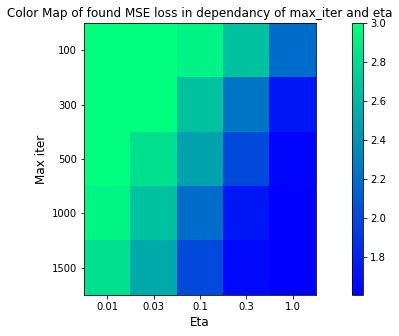

In [76]:
plot_color_map(found_MSE_list_mom, eta_list, max_iter_list, vmax = 3)

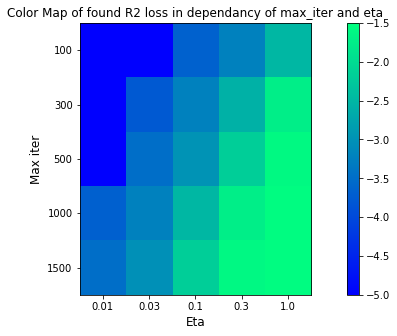

In [77]:
plot_color_map(found_R2_list_mom, eta_list, max_iter_list, vmax = -1.5, loss_type="R2", vmin=-5)

### Бонус 

** Задание 7 (2 балла)**. Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью метода
[Adam](https://arxiv.org/pdf/1412.6980.pdf) - добавьте при необходимости параметры в класс модели, повторите пункты 5 и 6 и сравните результаты. 

** Задание 8 (2 балла)**. Реализуйте линейную регрессию с функцией потерь
$$ L(\hat{y}, y) = log(cosh(\hat{y} - y)),$$

обучаемую с помощью градиентного спуска.

** Задание 9 (0.01 балла)**.  Вставьте картинку с вашим любимым мемом в этот Jupyter Notebook

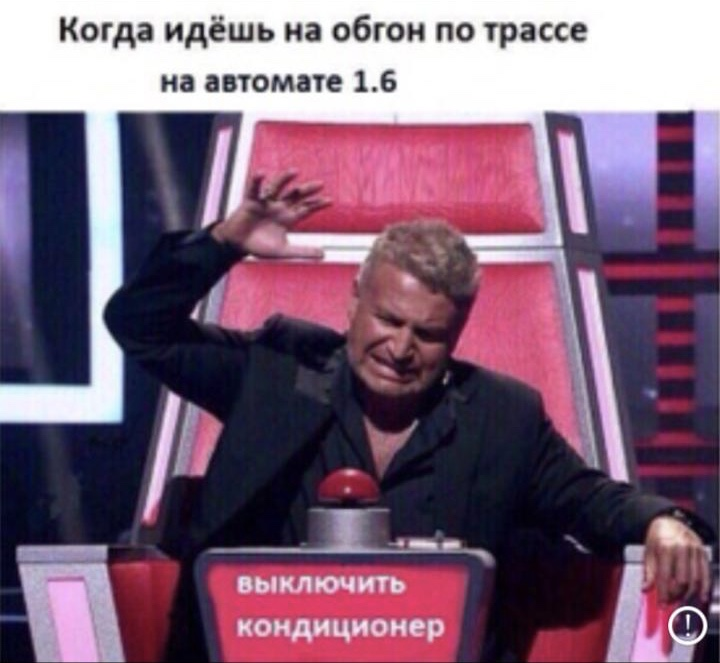

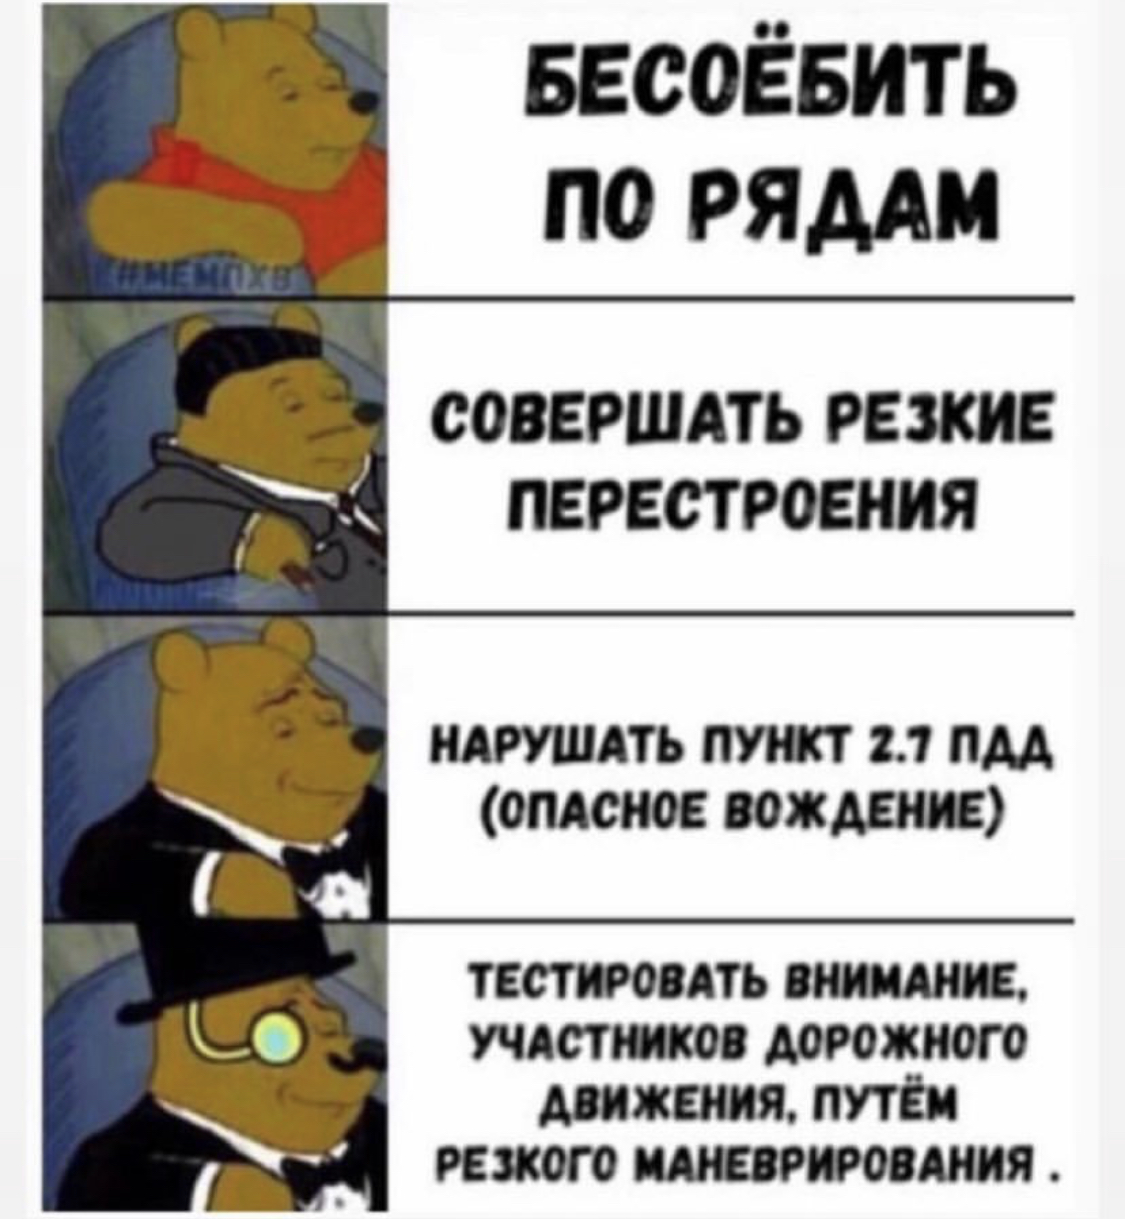